In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [ ]:
filename = "/home/viherbos/DATA_daq/calibration_tpulse_allch_cold_nocompressor_merged_repeated.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

# DATA SELECTION

channel = 0
tac     = 2
tpulse  = 30
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['delay']==tpulse]

  # GAUSSIAN FITTING FOR SELECTED TFINE DATA

#for i in np.arange(0,360,10):
#    data_n = data[data['delay']==i]
#    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_n['tfine'],'sqrt',False)
#    print(i,chisq_r,coeff[1],coeff_err[1])
fig = plt.figure()
axis = fig.add_subplot(111)
coeff,coeff_err,chisq_r=TPcal.gauss_fit(data['tfine'],'stone',True,axis,'Gauss Fit','','',[0.5,0.5,"left"])

# GAUSSIAN FITTING FOR ALL TFINE DATA

In [ ]:
channels = [1,17,21,22,38,39,44,47] #range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit['tfine'],'stone',False)
                print(i,tc,ch,coeff[1],coeff_err[1])
            
                if coeff_err[1]>1:
                    print("Fit failure")
                else:
                    res.append([ch,tc,i,coeff[1],np.abs(coeff[2])])

df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma'])
        

In [ ]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/tfine_fitted_merged_repeated.h5','w',complib="zlib",complevel=4)
storage.put('tfine',df_tfine,index=False,format='table',data_columns=True)
storage.close()

# TDC CALIBRATION (Sawtooth procedure)

In [ ]:
channels = [1,17,21,22,38,39,44,47]
tacs = range(0,4)
res=[]
data = pd.read_hdf('/home/viherbos/DATA_daq/tfine_fitted_merged_repeated.h5',key='tfine')
for ch in channels:
    for tc in tacs:
        gb,coeff = TPcal.TDC_fit(data,ch,tc, plot=False)
        res.append([ch,tc,coeff[0],coeff[1],coeff[2]])
        print(coeff)


In [ ]:
channel = 47
tac     = 0
data = pd.read_hdf('/home/viherbos/DATA_daq/tfine_fitted_merged_repeated.h5',key='tfine')
gb,coeff = TPcal.TDC_fit(data,channel,tac,guess=[0,0,0], plot=True)
#res[channel*4+tac] = [ch,tc,coeff[0],coeff[1],coeff[2]]
#print(res[channel*4+tac])

In [ ]:
df_tfine_cal = pd.DataFrame(res,columns=['channel_id','tac_id','amplitude','shift','offset'])
storage = pd.HDFStore('/home/viherbos/DATA_daq/tfine_cal_merge.h5','w',complib="zlib",complevel=4)
storage.put('tfine_cal',df_tfine_cal,index=False,format='table',data_columns=True)
storage.close()

# QDC CALIBRATION

In [2]:
filename = '/home/viherbos/DATA_daq/qdc_tpulse_no_compressor_allch.h5'

<IPython.core.display.Javascript object>


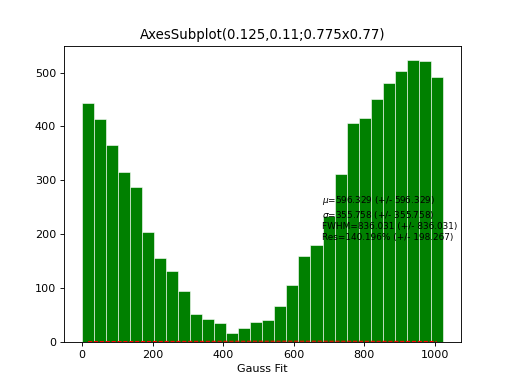

Fitting Problems
2 596.329159451179
Fitting Problems
3 596.329159451179
Fitting Problems
4 596.329159451179
Fitting Problems
5 596.329159451179
Fitting Problems
6 596.329159451179
Fitting Problems
7 596.329159451179
Fitting Problems
8 596.329159451179
Fitting Problems
9 596.329159451179
Fitting Problems
10 596.329159451179
Fitting Problems
11 596.329159451179


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
12 596.329159451179
Fitting Problems
13 596.329159451179
Fitting Problems
14 596.329159451179
Fitting Problems
15 596.329159451179
Fitting Problems
16 596.329159451179
Fitting Problems
17 596.329159451179
Fitting Problems
18 596.329159451179
Fitting Problems
19 596.329159451179
Fitting Problems
20 596.329159451179
Fitting Problems
21 596.329159451179
Fitting Problems
22 596.329159451179
Fitting Problems
23 596.329159451179
Fitting Problems
24 596.329159451179
Fitting Problems
25 596.329159451179
Fitting Problems
26 596.329159451179
Fitting Problems
27 596.329159451179
Fitting Problems
28 596.329159451179
Fitting Problems
29 596.329159451179
Fitting Problems
30 596.329159451179
56 2 290 596.329159451179 596.329159451179
[  1.         596.32915945 355.75767501]


In [23]:
channel = 56
tac     = 2
phase   = 290

data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['tpulse']==phase]
data = np.mod(data['efine'] + 1024 + 14, 1024)
fig = plt.figure()
axis = fig.add_subplot(111)

coeff_err = [1000,1000,1000]
#if (np.std(data) < 0.8):
#    coeff = [1000,np.mean(data),np.std(data)]
#else:
chisq_r = 10000
bins = 1
while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
    axis.cla()
    bins = bins + 1 
    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,bins,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
    print(bins,coeff_err[1])

print(channel,tac,phase,coeff[1],coeff_err[1]) 
print(coeff)

# GAUSSIAN FITTING FOR EFINE DATA

In [22]:
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,300,10):
            data_fit = data_tc[data_tc['tpulse']==i]
            data_fit = np.mod(data_fit['efine'] + 1024 + 14, 1024)
            # PETSYS Magic 
            
            coeff_err = [1000,1000,1000]
            bins = 1
            while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
                bins = bins + 1 
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit,bins,False) #True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
                #print(ch,tc,i,bins,chisq_r)
                
            print(ch,tc,i,coeff[1],coeff_err[1])

            res.append([ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['channel_id','tac_id','tpulse','mu','sigma'])

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

Fitting Problems
0 0 0 0.0 0.0
Fitting Problems
0 0 10 0.0 0.0
Fitting Problems
0 0 20 0.0 0.0
Fitting Problems
0 0 30 0.0 0.0
Fitting Problems
0 0 40 13.279895899225492 0.0007532994736542152
Fitting Problems
0 0 50 62.41960879525806 0.008191260616689355
Fitting Problems
0 0 60 152.559027035298 0.0013072861260698808
Fitting Problems
0 0 70 220.672152142487 0.027939823517017445
Fitting Problems
0 0 80 281.2880168832888 0.009562304021947673
Fitting Problems
0 0 90 341.0167712721028 0.313493991067941
Fitting Problems
0 0 100 399.3877196421378 0.09917408342629921
Fitting Problems
0 0 110 457.79823302312116 0.025134373758241225
Fitting Problems
0 0 120 514.4740649847589 0.06263919206455616
Fitting Problems
0 0 130 565.7531511687216 0.0029915976322686783
Fitting Problems
0 0 140 612.7767799296315 0.12173840086058195
Fitting Problems
0 0 150 649.8619701958974 0.026185166096576375
Fitting Problems
0 0 160 671.8620926843428 0.022536981634955065
Fitting Problems
0 0 170 681.4662173697782 0.00526

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 1 40 13.020374898125509 13.020374898125509
Fitting Problems
0 1 50 61.6019468998123 0.006155088250025141
Fitting Problems
0 1 60 151.65651626904076 0.01542047003178676
Fitting Problems
0 1 70 220.70909898912967 0.01136239544410747
Fitting Problems
0 1 80 280.6914622485971 0.09564863640172103
Fitting Problems
0 1 90 339.6918447253267 0.002681941103900256
Fitting Problems
0 1 100 398.6674123479985 0.049032268693013026
Fitting Problems
0 1 110 456.60152308851997 0.01030082063885881
Fitting Problems
0 1 120 513.4467058651679 0.03759031594575631
Fitting Problems
0 1 130 565.3893275545389 0.007257323525183072
Fitting Problems
0 1 140 612.053168049823 0.15257378748004516
Fitting Problems
0 1 150 648.7371317090902 0.09476946646691752
Fitting Problems
0 1 160

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
0 1 260 685.5417156258508 0.0016151453540264398
Fitting Problems
0 1 270 685.575753326716 0.0015080475614141883
Fitting Problems
0 1 280 685.4775787892147 0.001168677726037254
Fitting Problems
0 1 290 685.3685113500046 0.0021085424294216095
Fitting Problems
0 2 0 0.0 0.0
Fitting Problems
0 2 10 0.0 0.0
Fitting Problems
0 2 20 0.0 0.0
Fitting Problems
0 2 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 2 40 12.9549096835529 12.9549096835529
Fitting Problems
0 2 50 61.1380860076863 0.009943742597240096
Fitting Problems
0 2 60 151.12960468287673 0.03874735115786232
Fitting Problems
0 2 70 219.65565577405854 0.012933690431863404
Fitting Problems
0 2 80 280.12564151869196 0.010853700311132121
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 2 110 456.42630482272597 0.010687703212281801
Fitting Problems
0 2 120 513.0806265497704 0.016596978958850234
Fitting Problems
0 2 130 564.539512917475 0.08722232136507568
Fitting Problems
0 2 140 611.4509490610911 0.2099588126576478
Fitting Problems
0 2 150 648.6986794516482 0.045240401452430634
Fitting Problems
0 2 160 671.397113332108 0.09413770564835813
Fitting Problems
0 2 170 681.5615677627751 8.78032277096355e-05
Fitting Problems
0 2 180 684.4898881903476 0.0036158806676394044
Fitting Problems
0 2 190 685.5420007927419 0.0002499425089524726
Fitting Problems
0 2 200 685.7050955924118 0.0007544314730452796
Fitting Problems
0 2 210 685.7991021634114 0.0010742944197626493
Fitting Problems
0 2 220 685.6317179469174 0.0010526990686708067
Fitting Problems
0 2 230 685.7838083518152 0.00014511154551618115
Fitting Problems
0 2 240 685.750007052757 0.0010692180647193896
Fitting Problems
0 2 250 685.1732474508306 0.008882434264348114
Fitting Problems
0 2 260 685.5837111992249 0.0006348018

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
1 0 0 0.0 0.0
Fitting Problems
1 0 10 0.0 0.0
Fitting Problems
1 0 20 0.0 0.0
Fitting Problems
1 0 30 0.0 0.0
Fitting Problems
1 0 40 0.0 0.0
Fitting Problems
1 0 50 20.456785777231282 0.000697660904423508
Fitting Problems
1 0 60 80.85358527350394 0.029279167262010804
Fitting Problems
1 0 70 168.15472333414692 0.057924911635822286
Fitting Problems
1 0 80 232.0925227127868 0.01969429439612138
Fitting Problems
1 0 90 289.04477254653716 0.12029702629085137
Fitting Problems
1 0 100 344.7561793048055 0.08737285318650305
Fitting Problems
1 0 110 400.35691570603933 0.07659044165696492
Fitting Problems
1 0 120 454.54801636881325 0.06421623026453617
Fitting Problems
1 0 130 507.6605682176475 0.011583638103501822
Fitting Problems
1 0 140 558.331647110048 0.004468973003077662
Fitting Problems
1 0 150 605.5442113057553 0.21976984009589273
Fitting Problems
1 0 160 645.6326748989826 0.13404303415033955
Fitting Problems
1 0 170 678.2292944354324 0.006042293374248078
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 1 100 344.84322282256585 0.015831292478304407
Fitting Problems
Fitting Problems
1 1 110 399.8223593464189 0.03458412646825665
Fitting Problems
1 1 120 455.65361850540984 0.09828454108065153
Fitting Problems
1 1 130 508.5130667873429 0.0017432511911301082
Fitting Problems
1 1 140 558.5655579391293 0.020423531579184258
Fitting Problems
1 1 150 605.7607789581732 0.12230228756686524
Fitting Problems
1 1 160 645.8651823363408 0.0619310879933064
Fitting Problems
1 1 170 677.7712196185773 0.010171600063360256
Fitting Problems
1 1 180 696.9359280155459 0.12360587944201727
Fitting Problems
1 1 190 705.6590624204764 0.00158122895225325
Fitting Problems
1 1 200 708.7407450034144 0.0005472278541863911
Fitting Problems
1 1 210 710.0993915156274 0.01132813865019941
Fitting Problems
1 1 220 709.5756986508551 0.0653893375600809
Fitting Problems
1 1 230 709.7172551898636 0.029867661875160694
Fitting Problems
1 1 240 710.2920911141027 0.04960032501165676
Fitting Problems
1 1 250 709.612138148171 0.096

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 2 150 603.6024175142811 0.010662281499862909
Fitting Problems
1 2 160 644.3381006195164 0.1644664936998914
Fitting Problems
1 2 170 676.9482234429182 0.0446557449831682
Fitting Problems
1 2 180 696.2507607982109 0.09190088668822458
Fitting Problems
1 2 190 705.4177097457409 0.0072989801365867185
Fitting Problems
1 2 200 708.5676334940676 0.0012131820050592845
Fitting Problems
1 2 210 709.8665546292076 0.014436770194408555
Fitting Problems
1 2 220 710.0338193080698 0.01095047239024653
Fitting Problems
1 2 230 709.6637362237655 0.048208421400497636
Fitting Problems
1 2 240 711.1235029895054 0.06316383364887451
Fitting Problems
1 2 250 709.5942441958646 0.08984834931869193
Fitting Problems
1 2 260 709.6147718781651 0.07500195494574163
Fitting Problems
1 2 270 710.4701952072953 0.002903284919506873
Fitting Problems
1 2 280 709.744984971685 0.014710179900920068
Fitting Problems
1 2 290 709.6310846180115 0.07970976930132233
Fitting Problems
1 3 0 0.0 0.0
Fitting Problems
1 3 10 0.0 0.0
Fit

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 3 200 708.5894501715895 0.001408155716038771
Fitting Problems
1 3 210 709.5650852377548 0.06549337113856384
Fitting Problems
1 3 220 709.5910896905315 0.07316676096367859
Fitting Problems
1 3 230 710.3620489606881 0.014663512372218041
Fitting Problems
1 3 240 709.7614724646176 0.017576761808666155
Fitting Problems
1 3 250 709.6461305806979 0.03500234355847856
Fitting Problems
1 3 260 709.7104207463436 0.025635563739105905
Fitting Problems
1 3 270 709.7056737043612 0.021093065232807497
Fitting Problems
Fitting Problems
1 3 280 709.8656583377896 0.004374353710089805
Fitting Problems
1 3 290 709.7389009101383 0.019161379402546856
Fitting Problems
2 0 0 0.0 0.0
Fitting Problems
2 0 10 0.0 0.0
Fitting Problems
2 0 20 0.0 0.0
Fitting Problems
2 0 30 0.0 0.0
Fitting Problems
2 0 40 0.0 0.0
Fitting Problems
2 0 50 35.07123854045892 0.0010017437445868484
Fitting Problems
2 0 60 109.94500238034729 0.04779533422749229
Fitting Problems
2 0 70 194.83111899702686 0.016367602015337296
Fitting Probl

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
2 0 210 743.6337452331469 0.02405650234469865
Fitting Problems
2 0 220 744.4624217631333 0.0035826560851928008
Fitting Problems
2 0 230 743.5823895764181 0.03479503364933326
Fitting Problems
2 0 240 744.4180691894921 0.00548292681095037
Fitting Problems
2 0 250 743.9529938593535 0.019838692548040285
Fitting Problems
2 0 260 743.8106095688536 0.025952470292731043
Fitting Problems
2 0 270 743.5775190184045 0.0390944078246403
Fitting Problems
2 0 280 743.586831257892 0.03502129451676338
Fitting Problems
2 0 290 743.8278881095558 0.027518740352807755
Fitting Problems
2 1 0 0.0 0.0
Fitting Problems
2 1 10 0.0 0.0
Fitting Problems
2 1 20 0.0 0.0
Fitting Problems
2 1 30 0.0 0.0
Fitting Problems
2 1 40 0.0 0.0
Fitting Problems
2 1 50 35.09880615247025 1.300811427402059e-05
Fitting Problems
2 1 60 110.34058112771694 0.14654399568715648
Fitting Problems
2 1 70 194.41266952255418 0.015331944387730539
Fitting Problems
2 1 80 259.68989663869456 0.02169554683609778
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 1 280 743.4681214571874 0.04187490129685906
Fitting Problems
2 1 290 743.6012950097268 0.05275920984552753
Fitting Problems
2 2 0 0.0 0.0
Fitting Problems
2 2 10 0.0 0.0
Fitting Problems
2 2 20 0.0 0.0
Fitting Problems
2 2 30 0.0 0.0
Fitting Problems
2 2 40 0.0 0.0
Fitting Problems
2 2 50 34.80088411197093 0.0011006056056060197
Fitting Problems
Fitting Problems
2 2 60 109.05638016540297 0.007984380122620958
Fitting Problems
2 2 70 193.90758451962117 0.06185416787318618
Fitting Problems
2 2 80 258.7175369552222 0.043125652933485255
Fitting Problems
2 2 90 318.63103468788825 0.10825195031108129
Fitting Problems
2 2 100 379.25061347520017 0.0025373223639425855
Fitting Problems
2 2 110 438.2345778563453 0.18850830587265976
Fitting Problems
Fitting Problems
2 2 120 495.91841556649024 0.0025701922421285626
Fitting Problems
2 2 130 551.9395273944297 0.0011810301962861427
Fitting Problems
2 2 140 604.9223981915401 0.09790689646521018
Fitting Problems
2 2 150 654.1641600950829 0.0138413292441

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: 

2 3 60 105.03616707890127 0.03166761458771418
Fitting Problems
2 3 70 190.56895321994858 0.05906893684344299
Fitting Problems
2 3 80 255.59465865605696 0.0007002353748803824
Fitting Problems
2 3 90 314.81336958557273 0.031131683736852756
Fitting Problems
2 3 100 374.9368707956147 0.014839507786091348
Fitting Problems
2 3 110 433.35446248019156 0.026767169510034026
Fitting Problems
2 3 120 491.4974688261056 0.016589789923043354
Fitting Problems
2 3 130 546.6637522408716 0.001653793961752459
Fitting Problems
2 3 140 600.3688776672606 0.16928632984157416
Fitting Problems
2 3 150 649.0680003773367 0.029937528549804936
Fitting Problems
2 3 160 690.9198732019024 0.0009281877286852186
Fitting Problems
2 3 170 720.5787341666569 0.03598301117954672
Fitting Problems
2 3 180 735.3310410485328 0.06444190814518455
Fitting Problems
2 3 190 741.3768546981782 0.046150660107649705
Fitting Problems
2 3 200 743.314342205296 0.023080779192433
Fitting Problems
2 3 210 744.0151768860798 0.001285589937851700

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 0 50 25.30920173035109 0.010822497181589789
Fitting Problems
3 0 60 79.14035407855397 0.0773581038147446
Fitting Problems
3 0 70 169.2986808266563 0.0940537833416286
Fitting Problems
3 0 80 241.3341846410567 0.1030211774827514
Fitting Problems
3 0 90 300.12606050470146 0.02774260849759846
Fitting Problems
3 0 100 356.5128285064732 0.03712075910884959
Fitting Problems
3 0 110 412.9937290025336 0.04377496151242751
Fitting Problems
3 0 120 468.1335558743197 0.07137296042477563
Fitting Problems
3 0 130 523.1924776452738 0.012641365524063652
Fitting Problems
3 0 140 575.5157876455088 0.0880063729037978
Fitting Problems
3 0 150 624.8813370691289 0.05507410195253326
Fitting Problems
3 0 160 669.0474075586218 0.10951472639545962
Fitting Problems
3 0 170 706.5563139738107 0.001413627288252406
Fitting Problems
3 0 180 731.7272472125596 0.014002007020249204
Fitting Problems
3 0 190 743.883324135434 0.018589205480359902
Fitting Problems
3 0 200 748.6179771051409 0.002732663844636302
Fitting Prob

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 1 100 355.6187040932385 0.03768334558051294
Fitting Problems
3 1 110 412.2693198438623 0.052405073326294675
Fitting Problems
3 1 120 468.1511732984136 0.04085064295680335
Fitting Problems
3 1 130 523.5435972026406 0.121125514783565
Fitting Problems
3 1 140 575.2665882546438 0.06567360711499948
Fitting Problems
3 1 150 625.1212689600547 0.0725678091399664
Fitting Problems
3 1 160 669.0775602276144 0.0509219283031169
Fitting Problems
3 1 170 706.7999758729973 0.3503868938212791
Fitting Problems
3 1 180 731.5515709184845 0.01568414990846694
Fitting Problems
3 1 190 744.3129979995466 0.05714377984817338
Fitting Problems
3 1 200 749.213017987036 0.021500822249056153
Fitting Problems
3 1 210 750.347679065722 0.02995032390842094
Fitting Problems
3 1 220 751.2162179288241 0.023852275786021684
Fitting Problems
3 1 230 750.5087558679721 0.036781781947372805
Fitting Problems
3 1 240 751.777833895496 0.030074219001529262
Fitting Problems
3 1 250 751.2324304435737 0.035422543205185585
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 2 140 574.1406966777191 0.020933281319689932
Fitting Problems
3 2 150 623.6889590170267 0.031496386274987596
Fitting Problems
3 2 160 668.1866699110897 0.03717797854665144
Fitting Problems
3 2 170 705.4838892935086 0.02164203830440065
Fitting Problems
3 2 180 731.3300286666137 0.025823993542824063
Fitting Problems
3 2 190 743.8258086460977 0.010372782643109304
Fitting Problems
3 2 200 748.821454268065 0.0057104926294048895
Fitting Problems
3 2 210 750.7327997673386 0.022271103587674545
Fitting Problems
3 2 220 751.0103096902296 0.005863169484306505
Fitting Problems
3 2 230 751.3811539105252 0.029443446638896063
Fitting Problems
3 2 240 752.2477760131152 0.09386026024635569
Fitting Problems
3 2 250 751.5890961230294 0.013118019303891755
Fitting Problems
3 2 260 751.6401773393845 0.008396188053637017
Fitting Problems
3 2 270 751.2179213782582 0.030793234195555876
Fitting Problems
3 2 280 751.6244352461014 0.013192520281988165
Fitting Problems
Fitting Problems
3 2 290 751.5000450224675 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 3 200 748.6171290268442 0.035329155989894286
Fitting Problems
3 3 210 751.0840863943448 0.03209885705894254
Fitting Problems
3 3 220 751.5700804560096 0.010187973513347923
Fitting Problems
3 3 230 751.409748286986 0.022615335470453038
Fitting Problems
3 3 240 752.269439978658 0.10628292427589997
Fitting Problems
3 3 250 751.6925679335205 0.011647464981296927
Fitting Problems
3 3 260 751.6998699886608 0.006320770044187288
Fitting Problems
3 3 270 751.2477655068054 0.025104164811166764
Fitting Problems
3 3 280 751.5846631291379 0.006063696527179507
Fitting Problems
3 3 290 751.6034805161837 0.012448196865590646
Fitting Problems
4 0 0 0.0 0.0
Fitting Problems
4 0 10 0.0 0.0
Fitting Problems
4 0 20 0.0 0.0
Fitting Problems
4 0 30 0.0 0.0
Fitting Problems
4 0 40 0.14063788836953534 0.14063788836953534
Fitting Problems
4 0 50 38.84865755815095 0.09498005011086655
Fitting Problems
4 0 60 117.00530725297443 0.04620826577174555
Fitting Problems
4 0 70 190.59254812669494 0.027282716024666885
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 0 210 771.8006873210726 0.0009234348605291382
Fitting Problems
4 0 220 771.5949575341803 0.008543939659408879
Fitting Problems
4 0 230 771.9382409430748 0.0002828734726736138
Fitting Problems
4 0 240 771.6315126558244 0.02949095055187057
Fitting Problems
4 0 250 771.8667124136175 0.00031901346054677405
Fitting Problems
4 0 260 771.8863446736306 0.00012711828788304651
Fitting Problems
4 0 270 771.6689579948625 0.029564495629844485
Fitting Problems
4 0 280 771.6822744395155 0.02258518634658125
Fitting Problems
4 0 290 772.2692509503343 0.0005510564994688996
Fitting Problems
4 1 0 0.0 0.0
Fitting Problems
4 1 10 0.0 0.0
Fitting Problems
4 1 20 0.0 0.0
Fitting Problems
4 1 30 0.0 0.0
Fitting Problems
4 1 40 0.14448721473742096 0.14448721473742096
Fitting Problems
4 1 50 38.187364656442405 0.007972130325525085
Fitting Problems
4 1 60 116.42930731137777 0.03776101321075672
Fitting Problems
4 1 70 190.4785227252034 0.03343662494850482
Fitting Problems
4 1 80 253.97799897569163 0.02712671186

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 1 270 771.6858198279792 0.03487337120101784
Fitting Problems
4 1 280 772.2163693846813 0.004799377803325765
Fitting Problems
4 1 290 771.6743068019508 0.013020305674563892
Fitting Problems
4 2 0 0.0 0.0
Fitting Problems
4 2 10 0.0 0.0
Fitting Problems
4 2 20 0.0 0.0
Fitting Problems
4 2 30 0.0 0.0
Fitting Problems
4 2 40 0.014572449821281275 0.014572449821281275
Fitting Problems
4 2 50 37.44471830018556 0.006764679273923663
Fitting Problems
4 2 60 115.46726922587303 0.042903951890132075
Fitting Problems
4 2 70 189.45253466315665 0.014572392576554035
Fitting Problems
4 2 80 252.76152706669237 0.014668207581947586
Fitting Problems
4 2 90 314.9644652674395 0.005902284972375155
Fitting Problems
4 2 100 375.3827952903295 0.09116398584948963
Fitting Problems
4 2 110 435.78438030813857 0.014764771783135946
Fitting Problems
4 2 120 495.79558225246313 0.006591387390230674
Fitting Problems
4 2 130 554.6426596727899 0.09829862806822527
Fitting Problems
4 2 140 609.2735224956659 0.03160040481744

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 3 80 249.45086806791093 0.03536222023030312
Fitting Problems
4 3 90 311.50919680369736 0.06046515161158298
Fitting Problems
4 3 100 371.2977775510181 0.06108879122123119
Fitting Problems
4 3 110 431.2661078210974 0.08315820408799857
Fitting Problems
4 3 120 491.2017567323387 0.004808457532907119
Fitting Problems
4 3 130 549.2132494531548 0.018258192108422926
Fitting Problems
4 3 140 604.5158536433601 0.0869682319005696
Fitting Problems
4 3 150 656.3518068043452 0.015323166437564909
Fitting Problems
4 3 160 702.4847714738182 0.15110656474381917
Fitting Problems
4 3 170 737.9482259006372 0.005617646248230426
Fitting Problems
4 3 180 759.2925842119486 0.08399881460688002
Fitting Problems
4 3 190 767.7608531128478 0.011708385648791397
Fitting Problems
4 3 200 771.1259988353466 0.006195980103051198
Fitting Problems
4 3 210 771.9417950172447 6.049119486534373e-05
Fitting Problems
4 3 220 771.8673902460858 0.0008750697778638904
Fitting Problems
4 3 230 772.0965269274498 0.000238528425643436

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

5 0 80 233.19434009923128 0.022414002850405564
Fitting Problems
5 0 90 290.5050834542144 0.0007285983761473147
Fitting Problems
5 0 100 345.6805422000104 0.06431875379550034
Fitting Problems
5 0 110 401.6727150466676 0.09031870028147176
Fitting Problems
5 0 120 456.7816736223548 0.10834676064287581
Fitting Problems
5 0 130 509.8222363250405 0.016217593232172808
Fitting Problems
5 0 140 561.2015969227981 0.010778119012416569
Fitting Problems
5 0 150 609.3893195134908 0.00206840144761444
Fitting Problems
5 0 160 653.56192489281 0.08559575079247984
Fitting Problems
5 0 170 688.804364701651 0.03622222271247252
Fitting Problems
5 0 180 713.434553500928 0.048533297426725415
Fitting Problems
5 0 190 726.170952844736 0.00019088330804135247
Fitting Problems
5 0 200 729.1840725544401 0.024359420616625393
Fitting Problems
5 0 210 731.4261982739981 0.0010490274946217439
Fitting Problems
5 0 220 731.739772852664 0.00024641447332442493
Fitting Problems
5 0 230 731.9616750371349 0.01022734992584714
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

5 1 130 510.067467023947 0.00227985977411405
Fitting Problems
5 1 140 560.9220352014981 0.012028673905364265
Fitting Problems
5 1 150 609.4371371860323 0.10071182605688149
Fitting Problems
5 1 160 653.4989508188593 0.055758309325969285
Fitting Problems
5 1 170 689.1121798821805 0.003959153288298471
Fitting Problems
5 1 180 713.1908584097674 0.0002832710621741246
Fitting Problems
5 1 190 725.3066890421003 0.03336063669093214
Fitting Problems
5 1 200 728.9561290087325 0.01840033617353994
Fitting Problems
5 1 210 730.701009548326 0.007775889236746951
Fitting Problems
5 1 220 731.5162328027745 0.0033201093887866933
Fitting Problems
5 1 230 731.8338636951785 4.703701259261337e-05
Fitting Problems
5 1 240 731.4103027228159 0.0012474033889915525
Fitting Problems
5 1 250 731.2974867710496 0.011791166542364562
Fitting Problems
5 1 260 730.7087502376877 0.010436166851960823
Fitting Problems
5 1 270 731.6239382113241 0.00283742179185177
Fitting Problems
5 1 280 730.8087807071145 0.005490517041957

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
5 2 190 725.4250911233254 0.0018573450282169221
Fitting Problems
5 2 200 728.7005138135028 0.0007110839667934807
Fitting Problems
5 2 210 731.1292638811459 3.356765091253265e-05
Fitting Problems
5 2 220 731.3716547837512 0.0032928438736110773
Fitting Problems
5 2 230 731.6381411791147 3.073175351356129e-05
Fitting Problems
5 2 240 730.6617984593199 0.005298283103289027
Fitting Problems
5 2 250 730.6039595287133 0.02387436376048876
Fitting Problems
5 2 260 731.1506205757731 0.022148357536233763
Fitting Problems
5 2 270 731.4461808897695 0.007336432407640251
Fitting Problems
5 2 280 731.0973426387917 0.021662600616274442
Fitting Problems
5 2 290 731.0072956779986 0.00102178617221209
Fitting Problems
5 3 0 0.0 0.0
Fitting Problems
5 3 10 0.0 0.0
Fitting Problems
5 3 20 0.0 0.0
Fitting Problems
5 3 30 0.0 0.0
Fitting Problems
5 3 40 0.08997252747252747 0.08997252747252747
Fitting Problems
5 3 50 22.489184850367064 0.0002581110694060153
Fitting Problems
5 3 60 75.5062112860

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
5 3 270 731.6759120170362 0.0014582937314127093
Fitting Problems
5 3 280 731.2781147127848 0.005398665352149565
Fitting Problems
5 3 290 730.7196092935912 0.025426200462007123
Fitting Problems
6 0 0 0.0 0.0
Fitting Problems
6 0 10 0.0 0.0
Fitting Problems
6 0 20 0.0 0.0
Fitting Problems
6 0 30 0.0 0.0
Fitting Problems
6 0 40 0.0 0.0
Fitting Problems
6 0 50 21.385950098274705 0.0012934282460366376
Fitting Problems
6 0 60 79.12081580521598 0.010181918887706287
Fitting Problems
6 0 70 162.8151138433868 0.03225233296382176
Fitting Problems
6 0 80 226.30461736743763 0.018099962220310496
Fitting Problems
6 0 90 281.7968170875328 0.0257949071588884
Fitting Problems
6 0 100 336.2452571835481 0.022490002518591016
Fitting Problems
6 0 110 390.40730351881706 0.024605875502564604
Fitting Problems
6 0 120 443.7987430119183 0.004296365436524843
Fitting Problems
6 0 130 496.98415858133825 0.06096394615840147
Fitting Problems
6 0 140 547.0922163986763 0.0679997775645245
Fitting Proble

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

Fitting Problems
6 0 260 699.6151840619946 0.007049795066395906
Fitting Problems
6 0 270 699.695009377752 0.0007763177966584745
Fitting Problems
6 0 280 699.2169401771575 0.012165605287029185
Fitting Problems
6 0 290 700.1423931566079 0.0001308393663273549
Fitting Problems
6 1 0 0.0 0.0
Fitting Problems
6 1 10 0.0 0.0
Fitting Problems
6 1 20 0.0 0.0
Fitting Problems
6 1 30 0.0 0.0
Fitting Problems
6 1 40 0.0 0.0
Fitting Problems
6 1 50 20.960269951172876 0.0002539080227677697
Fitting Problems
6 1 60 78.70155485308345 0.02324303539430135
Fitting Problems
6 1 70 161.45777440511682 0.01941730342574235
Fitting Problems
6 1 80 225.34380324217906 0.014507362302131224
Fitting Problems
6 1 90 281.6030902000418 0.0012631028563942182
Fitting Problems
6 1 100 335.696929378116 0.02105068713244625
Fitting Problems
6 1 110 390.27254979597785 0.04881640088144015
Fitting Problems
6 1 120 442.73567816753143 0.0015429004312743743
Fitting Problems
6 1 130 496.3881936110417 0.10297329324265736
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 2 60 77.85422257322254 0.0463236347974583
Fitting Problems
6 2 70 161.52583848793552 0.03274599201563746
Fitting Problems
6 2 80 225.16393956864752 0.03249308852672639
Fitting Problems
6 2 90 281.0781114022843 0.0016553769215275583
Fitting Problems
Fitting Problems
6 2 100 335.57515348151895 0.023586208424311774
Fitting Problems
6 2 110 389.55015718362324 0.00955384162785775
Fitting Problems
6 2 120 442.39466318628996 0.037119388487394704
Fitting Problems
6 2 130 495.5468866589624 0.12492556241469129
Fitting Problems
6 2 140 545.6217122240259 0.11099949370879426
Fitting Problems
6 2 150 591.2875878191533 0.18196269616572375
Fitting Problems
6 2 160 631.0791352910293 0.011371939592523334
Fitting Problems
6 2 170 664.9199321945738 0.014864878379070318
Fitting Problems
6 2 180 685.5087642161728 0.016066396219714552
Fitting Problems
6 2 190 695.4724394275041 0.0005047257157700145
Fitting Problems
6 2 200 697.0708278796992 0.011150602984703566
Fitting Problems
6 2 210 700.1235979784946 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 3 130 491.24533102376756 0.09440272227753892
Fitting Problems
6 3 140 541.2959919757286 0.11219335920358452
Fitting Problems
6 3 150 586.311183148839 0.004612689261879665
Fitting Problems
6 3 160 627.5544754540546 0.036379171076968836
Fitting Problems
6 3 170 662.4121041684812 0.01894415628193283
Fitting Problems
6 3 180 683.9834198960352 0.0656697327237009
Fitting Problems
6 3 190 694.9788272444746 0.00032790957377534894
Fitting Problems
6 3 200 697.6173926159573 0.0001704378261493276
Fitting Problems
6 3 210 699.6155077060464 0.0070337745223560625
Fitting Problems
6 3 220 700.3154105937689 0.004099207734778643
Fitting Problems
6 3 230 700.029532958673 0.00033158088049352623
Fitting Problems
6 3 240 699.0775858749261 0.009719440516339129
Fitting Problems
6 3 250 700.2852475820448 0.000974699780191557
Fitting Problems
6 3 260 700.2311581802538 0.0047425841749201975
Fitting Problems
6 3 270 699.8475765111309 0.0003273663820571356
Fitting Problems
6 3 280 699.2548599773548 0.0156589892

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
7 0 130 498.2765488081772 0.1318066372281369
Fitting Problems
7 0 140 547.373544275457 0.11517986416990678
Fitting Problems
7 0 150 593.5398986949095 0.08519322857926302
Fitting Problems
7 0 160 634.0305600789305 0.042314922917021755
Fitting Problems
7 0 170 666.5772969499062 0.03804078946855185
Fitting Problems
7 0 180 687.3355372005396 0.05197454127946064
Fitting Problems
Fitting Problems
7 0 190 696.5035601981349 0.0023929128965616982
Fitting Problems
7 0 200 699.7459991846974 1.9266624984900738e-05
Fitting Problems
7 0 210 700.4534349259727 0.003178764696004663
Fitting Problems
7 0 220 700.6390081474144 0.0020740960310787686
Fitting Problems
7 0 230 701.2393304578633 0.001029477542423492
Fitting Problems
7 0 240 701.2189619310368 0.002724425825065149
Fitting Problems
7 0 250 701.5084114089364 0.00018280138909804414
Fitting Problems
7 0 260 701.3435733435429 0.006594337550147264
Fitting Problems
7 0 270 701.4021681363675 0.015415882397194235
Fitting Problems
7 0 280

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

7 1 180 686.5651892219965 0.09639231605894899
Fitting Problems
7 1 190 696.2668734782043 0.0007390184104238293
Fitting Problems
7 1 200 699.4443013501063 0.0019083103202421272
Fitting Problems
7 1 210 700.7849540925592 0.00014332875808985139
Fitting Problems
7 1 220 700.9379671749264 4.0530809259070834e-05
Fitting Problems
7 1 230 700.5837426395952 0.0006582322056999303
Fitting Problems
7 1 240 700.5263204768903 0.00012166118146919575
Fitting Problems
7 1 250 701.336223068619 0.0020509348993029636
Fitting Problems
7 1 260 701.5206219617119 0.0002888563827494634
Fitting Problems
7 1 270 701.6818518266966 9.575152134061658e-06
Fitting Problems
7 1 280 701.5196681420118 0.0005323243585050482
Fitting Problems
7 1 290 701.6532173395312 0.0003908128107524643
Fitting Problems
7 2 0 0.0 0.0
Fitting Problems
7 2 10 0.0 0.0
Fitting Problems
7 2 20 0.0 0.0
Fitting Problems
7 2 30 0.0 0.0
Fitting Problems
7 2 40 0.0 0.0
Fitting Problems
7 2 50 28.50972409169812 0.0032273270803240112
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: Runtime

7 2 240 701.0840763308719 0.0005658441532668707
Fitting Problems
7 2 250 701.3752324738413 0.0017684300560691908
Fitting Problems
7 2 260 701.6364861982989 0.00022919075320133485
Fitting Problems
7 2 270 701.7297963829562 3.54630791010079e-05
Fitting Problems
7 2 280 701.4891761315075 0.0007943007731648339
Fitting Problems
7 2 290 701.7022655542977 3.250982483321928e-05
Fitting Problems
7 3 0 0.0 0.0
Fitting Problems
7 3 10 0.0 0.0
Fitting Problems
7 3 20 0.0 0.0
Fitting Problems
7 3 30 0.0 0.0
Fitting Problems
7 3 40 0.0 0.0
Fitting Problems
7 3 50 27.581894820475434 0.0032649213507126235
Fitting Problems
7 3 60 88.33457585153069 0.00612766438524844
Fitting Problems
7 3 70 167.72461862202965 0.018138776854263582
Fitting Problems
7 3 80 227.6957890061339 0.0015316323656768432
Fitting Problems
7 3 90 282.37087496740554 0.005537037447067093
Fitting Problems
7 3 100 335.33951047222627 0.0157435243564203
Fitting Problems
7 3 110 388.7489290876085 0.034269083907215836
Fitting Problems
7 3 1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
8 0 0 0.0 0.0
Fitting Problems
8 0 10 0.0 0.0
Fitting Problems
8 0 20 0.0 0.0
Fitting Problems
8 0 30 0.0 0.0
Fitting Problems
8 0 40 13.59248503665868 0.001968710754851154
Fitting Problems
8 0 50 70.27913925525155 0.016906241981298774
Fitting Problems
8 0 60 169.0540852844174 0.01436304214723942
Fitting Problems
8 0 70 241.26408700390263 0.0019310759056261591
Fitting Problems
8 0 80 304.4108768958817 0.004964006205376097
Fitting Problems
8 0 90 365.26630135277503 0.06642413822524519
Fitting Problems
8 0 100 426.50602676259535 0.0017435214344228552
Fitting Problems
8 0 110 486.2791626608075 0.0774194371124992
Fitting Problems
8 0 120 542.3708265963003 0.18719246536290027
Fitting Problems
8 0 130 593.3201723258862 0.06982986170089016
Fitting Problems
8 0 140 635.9881955096014 0.0070335367734998
Fitting Problems
8 0 150 666.6127560655445 0.04097618387475783
Fitting Problems
8 0 160 680.4331435042983 0.00307515635053873
Fitting Problems
8 0 170 684.9789005893274 9.7250512

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 1 80 303.9816994549706 0.01071387807195734
Fitting Problems
8 1 90 364.51684381349986 0.05179356589903084
Fitting Problems
8 1 100 426.3878906783561 0.09521008337878997
Fitting Problems
8 1 110 485.4812544908478 0.11733629388673071
Fitting Problems
8 1 120 542.308321501167 0.12390650180251415
Fitting Problems
8 1 130 593.4282039083442 0.16972577219555582
Fitting Problems
8 1 140 636.403962428807 0.040434455964822084
Fitting Problems
8 1 150 666.3749580520306 0.11556786419499793
Fitting Problems
8 1 160 680.1061616922286 0.0017050367931256086
Fitting Problems
8 1 170 684.3079825292107 0.001791641406786881
Fitting Problems
8 1 180 685.9332612303228 0.02590420345529694
Fitting Problems
8 1 190 686.025629272439 0.032145829869386605
Fitting Problems
8 1 200 686.2809928874431 0.02514486947145969
Fitting Problems
8 1 210 686.2476895799332 0.015787196252063474
Fitting Problems
8 1 220 686.0106440592964 0.025660708983103575
Fitting Problems
8 1 230 686.2700045303148 0.013769210362054972
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 2 120 540.7839876572456 0.036433807198687454
Fitting Problems
8 2 130 591.958885600114 0.1030142652076371
Fitting Problems
8 2 140 634.9964044310543 0.017808310677287047
Fitting Problems
8 2 150 665.7937431549702 0.020419787292752685
Fitting Problems
8 2 160 679.5419432228439 0.001129540717044151
Fitting Problems
8 2 170 684.7127184461839 0.0003348824164331286
Fitting Problems
8 2 180 685.4278199961259 0.01775179540652037
Fitting Problems
8 2 190 686.0650211308255 0.026943657922287857
Fitting Problems
8 2 200 686.3148026251322 0.019665571871426417
Fitting Problems
8 2 210 686.2999387873376 0.024053768748201258
Fitting Problems
8 2 220 685.5725284680663 0.01776228688898137
Fitting Problems
8 2 230 686.3003521150299 0.024032107744692662
Fitting Problems
8 2 240 686.387156098307 0.013252071355432033
Fitting Problems
8 2 250 686.8132188305461 0.0016448614523678078
Fitting Problems
8 2 260 686.5891167357391 0.004223507194350364
Fitting Problems
8 2 270 686.3420459476945 0.0116265538097429

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 3 190 686.2355126129067 0.02313913163562711
Fitting Problems
8 3 200 686.5022715319006 0.009498766544976587
Fitting Problems
8 3 210 686.5137865251004 0.008364221299935356
Fitting Problems
8 3 220 686.255340687357 0.02226614629582179
Fitting Problems
8 3 230 686.487030253809 0.008748617388435414
Fitting Problems
8 3 240 686.6407950528953 0.002799128345470202
Fitting Problems
8 3 250 687.0575912810762 0.0004174192210784062
Fitting Problems
8 3 260 686.7460208041487 0.002292846934729787
Fitting Problems
8 3 270 686.5337182839357 0.005633818388351474
Fitting Problems
8 3 280 686.5721704891123 0.008880722475860534
Fitting Problems
8 3 290 686.264120646448 0.012955083893386087
Fitting Problems
9 0 0 0.0 0.0
Fitting Problems
9 0 10 0.0 0.0
Fitting Problems
9 0 20 0.0 0.0
Fitting Problems
9 0 30 0.0 0.0
Fitting Problems
9 0 40 0.9975975127190503 0.9975975127190503
Fitting Problems
9 0 50 59.01852028376342 0.013832217542084588
Fitting Problems
9 0 60 140.2854849711622 0.013858687542061794
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

9 0 180 756.8720988555255 0.01793260579241653
Fitting Problems
9 0 190 760.6217064298677 0.04422975220004934
Fitting Problems
9 0 200 761.6039697993617 0.022237366043837973
Fitting Problems
9 0 210 762.1419681324015 0.011184988524695011
Fitting Problems
9 0 220 762.7206641395636 0.0010710777809068133
Fitting Problems
9 0 230 762.3874226378332 0.019392392785582677
Fitting Problems
9 0 240 762.7915310003042 0.0014000092204237548
Fitting Problems
9 0 250 763.0028253312679 0.005160726319001694
Fitting Problems
9 0 260 762.6872932636325 0.0007327396332164147
Fitting Problems
9 0 270 762.8240389824998 0.0012478962821479596
Fitting Problems
9 0 280 763.0223677505313 0.0024945632697560885
Fitting Problems
9 0 290 763.4088529928174 0.0026115415275191883
Fitting Problems
9 1 0 0.0 0.0
Fitting Problems
9 1 10 0.0 0.0
Fitting Problems
9 1 20 0.0 0.0
Fitting Problems
9 1 30 0.0 0.0
Fitting Problems
9 1 40 0.9992933860938383 0.9992933860938383
Fitting Problems
9 1 50 59.25543367636624 0.153702992786

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
9 1 220 762.0819841233763 0.005600840590558101
Fitting Problems
9 1 230 762.7557250115956 0.001906487974612053
Fitting Problems
9 1 240 762.70943452082 0.002820253171369341
Fitting Problems
9 1 250 762.3998405510116 0.021998202462553913
Fitting Problems
9 1 260 762.5208671351418 0.01029763785943388
Fitting Problems
9 1 270 763.3125499301332 0.006635462985836728
Fitting Problems
9 1 280 763.2300147882 0.00034832686667728526
Fitting Problems
9 1 290 763.255108162919 0.0008964266451371177
Fitting Problems
9 2 0 0.0 0.0
Fitting Problems
9 2 10 0.0 0.0
Fitting Problems
9 2 20 0.0 0.0
Fitting Problems
9 2 30 0.0 0.0
Fitting Problems
9 2 40 0.9122385528547202 0.9122385528547202
Fitting Problems
9 2 50 57.421952853405685 0.0007418659102505763
Fitting Problems
9 2 60 138.6077240027189 0.029173495802921893
Fitting Problems
9 2 70 211.01969767018534 0.03234948258433117
Fitting Problems
9 2 80 274.1737916360255 0.09357397694345311
Fitting Problems
9 2 90 335.9266050832292 0.000301

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

9 2 280 762.7098225874826 0.002971678682569952
Fitting Problems
9 2 290 763.1799243077432 0.001591366279667028
Fitting Problems
9 3 0 0.0 0.0
Fitting Problems
9 3 10 0.0 0.0
Fitting Problems
9 3 20 0.0 0.0
Fitting Problems
9 3 30 0.0 0.0
Fitting Problems
9 3 40 0.3177834322872491 0.3177834322872491
Fitting Problems
9 3 50 55.9882494081277 0.3624502728336593
Fitting Problems
9 3 60 136.0245560649102 0.020160050698472435
Fitting Problems
9 3 70 208.72916547375544 0.021782814940816526
Fitting Problems
9 3 80 271.4694545027565 0.0004134424005788946
Fitting Problems
9 3 90 332.62942863921427 0.007428367099285717
Fitting Problems
9 3 100 394.08092458460317 0.08954648271929505
Fitting Problems
9 3 110 454.1433913105621 0.04457080334554118
Fitting Problems
9 3 120 513.2957998204888 0.013745379838398762
Fitting Problems
9 3 130 571.017137906695 0.022388446202859798
Fitting Problems
9 3 140 624.8654746240757 0.06180655926423449
Fitting Problems
9 3 150 673.724298156902 0.061241299531128966
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
10 0 0 0.0 0.0
Fitting Problems
10 0 10 0.0 0.0
Fitting Problems
10 0 20 0.0 0.0
Fitting Problems
10 0 30 0.0 0.0
Fitting Problems
10 0 40 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 0 50 11.712904982303295 11.712904982303295
Fitting Problems
10 0 60 64.79068952729939 0.01711675245268986
Fitting Problems
10 0 70 151.83921221290126 0.014177140342086956
Fitting Problems
10 0 80 220.63609277998268 0.024447382318028794
Fitting Problems
10 0 90 279.55514799929824 0.00841930784129743
Fitting Problems
10 0 100 336.69783278996704 0.00221025239318413
Fitting Problems
10 0 110 392.82520763875914 0.0012358227283026657
Fitting Problems
10 0 120 449.16622144248254 0.0013925233084577046
Fitting Problems
10 0 130 504.33529948662715 0.002693717129136387
Fitting Probl

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarn

10 0 160 653.7968358152531 0.0200480897422451
Fitting Problems
10 0 170 693.6660469247508 0.05726996580831489
Fitting Problems
10 0 180 723.7435002809272 0.02275504038118789
Fitting Problems
10 0 190 741.2586531170539 0.2078613790603162
Fitting Problems
10 0 200 747.3793522708556 0.0033070756664613813
Fitting Problems
10 0 210 749.6262284682564 0.021831849913304602
Fitting Problems
10 0 220 750.293205659437 1.8326981191095794e-05
Fitting Problems
10 0 230 750.5707760864682 0.004527895478522081
Fitting Problems
10 0 240 750.0142316048333 0.00029063056321709547
Fitting Problems
10 0 250 750.556582853048 0.017895794777807564
Fitting Problems
10 0 260 750.1762827617719 0.022621485193732593
Fitting Problems
10 0 270 750.4770890755744 0.0020227843356702504
Fitting Problems
10 0 280 750.1250280813607 0.03647508153385469
Fitting Problems
10 0 290 750.722769460092 0.0035878188409205953
Fitting Problems
10 1 0 0.0 0.0
Fitting Problems
10 1 10 0.0 0.0
Fitting Problems
10 1 20 0.0 0.0
Fitting Prob

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 1 220 749.9073911081282 0.002838739593892487
Fitting Problems
10 1 230 750.0602227196545 0.024893330033373212
Fitting Problems
10 1 240 750.2574539286991 0.007536089789334543
Fitting Problems
10 1 250 750.0255646187467 0.013219074259875589
Fitting Problems
10 1 260 750.8851677773888 0.002708906809679304
Fitting Problems
10 1 270 750.5363298714962 0.023672579026619022
Fitting Problems
10 1 280 750.3396955040276 0.018567099014651405
Fitting Problems
10 1 290 750.2335459866459 0.01958471299590096
Fitting Problems
10 2 0 0.0 0.0
Fitting Problems
10 2 10 0.0 0.0
Fitting Problems
10 2 20 0.0 0.0
Fitting Problems
10 2 30 0.0 0.0
Fitting Problems
10 2 40 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 2 50 12.066568884672288 260199.7820546234
Fitting Problems
10 2 60 63.808258001693716 0.03219

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: Runtime

10 2 100 335.8760611424841 0.04689404073439974
Fitting Problems
10 2 110 391.8754097162744 0.012147924686795352
Fitting Problems
10 2 120 448.5589681028423 0.009991546770537561
Fitting Problems
10 2 130 503.6201916679971 0.07568336168255395
Fitting Problems
10 2 140 556.6241114041021 0.006710625960179337
Fitting Problems
10 2 150 606.961591910778 0.0020319554674727174
Fitting Problems
10 2 160 653.2203281981037 0.11068958323055962
Fitting Problems
10 2 170 692.6618006932284 0.08954501838785368
Fitting Problems
10 2 180 723.0545996793719 0.007807151111666284
Fitting Problems
10 2 190 740.5515797473939 0.052871473746044596
Fitting Problems
10 2 200 746.5588573615067 0.0023608839443607353
Fitting Problems
10 2 210 749.3181865323976 0.04297304824028844
Fitting Problems
10 2 220 749.5486205061007 0.026495131697187944
Fitting Problems
10 2 230 749.8344196136387 0.015004931771054709
Fitting Problems
10 2 240 750.376850245485 0.010996859566197965
Fitting Problems
10 2 250 750.2641844260904 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
10 3 170 688.093185055542 0.005069381259950181
Fitting Problems
10 3 180 720.632517595975 0.0015637791475311689
Fitting Problems
10 3 190 739.2031802872989 0.13165723803709417
Fitting Problems
10 3 200 746.6110296557048 0.003646211427815752
Fitting Problems
10 3 210 749.1195766864287 0.051936391296272214
Fitting Problems
10 3 220 749.4182959721496 0.040720238450825993
Fitting Problems
10 3 230 750.2784350612201 0.011006258466934992
Fitting Problems
10 3 240 750.4638379242949 0.008925392766458356
Fitting Problems
10 3 250 750.2698742834312 0.019225346919214462
Fitting Problems
10 3 260 750.5298464137778 0.006972171242317533
Fitting Problems
10 3 270 750.157360108303 0.01858519032078058
Fitting Problems
10 3 280 750.5531518643511 0.011096722999864767
Fitting Problems
10 3 290 750.3068245341656 0.10483297195454147
Fitting Problems
11 0 0 0.0 0.0
Fitting Problems
11 0 10 0.0 0.0
Fitting Problems
11 0 20 0.0 0.0
Fitting Problems
11 0 30 0.0 0.0
Fitting Problems
11 0 40 10.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 0 70 209.2356723456304 0.17195033360220294
Fitting Problems
11 0 80 271.27702833381164 0.02822207131397369
Fitting Problems
11 0 90 331.6246881016364 0.0176744866346341
Fitting Problems
11 0 100 389.99432722906016 0.0494742886626819
Fitting Problems
11 0 110 449.4226367625643 0.1995403847618748
Fitting Problems
11 0 120 507.628871598886 0.030621865791717075
Fitting Problems
11 0 130 562.6568747071099 0.02079933617756832
Fitting Problems
11 0 140 613.7772406358636 0.030487367997950928
Fitting Problems
11 0 150 660.4334489176201 0.16385073757967214
Fitting Problems
11 0 160 695.657311897433 0.002242367753304903
Fitting Problems
11 0 170 716.6208618396957 0.11543738925935004
Fitting Problems
11 0 180 725.2670290828692 0.03695687195046368
Fitting Problems
11 0 190 727.4114888876996 0.01556367772889144
Fitting Problems
11 0 200 728.5451404506622 0.01073798226315594
Fitting Problems
11 0 210 728.681162104758 0.0007823544872323543
Fitting Problems
11 0 220 728.4081353166744 0.0222275176764

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 1 40 10.037503498460678 10.037503498460678
Fitting Problems
11 1 50 52.252447651323145 0.1628605819658516
Fitting Problems
11 1 60 136.5030097738724 0.003332708827449238
Fitting Problems
11 1 70 208.77311418139075 0.005016884796114277
Fitting Problems
11 1 80 271.3051679635719 0.024986690701477646
Fitting Problems
11 1 90 331.1432533268855 0.02780127385577411
Fitting Problems
11 1 100 389.63460746416024 0.03093454274350538
Fitting Problems
11 1 110 448.7263514804008 0.08089208862968449
Fitting Problems
11 1 120 506.71529895883793 0.056090841657112304
Fitting Problems
11 1 130 561.9579645285884 0.026846509125915748
Fitting Problems
11 1 140 613.7453253526513 0.055629807684593205
Fitting Problems
11 1 150 659.5211145036889 0.15412594729200738
Fitting Problems
Fitting Problems
11 1 160 695.6617253448835 0.011670626804553018
Fitting Problems
11 1 170 716.616460899144 0.00374678353689100

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB

Fitting Problems
11 2 0 0.0 0.0
Fitting Problems
11 2 10 0.0 0.0
Fitting Problems
11 2 20 0.0 0.0
Fitting Problems
11 2 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 2 40 10.03342595884916 4.18206219279276
Fitting Problems
11 2 50 51.433711191659846 0.02020346803976793
Fitting Problems
11 2 60 135.64215278177312 0.017985128936600283
Fitting Problems
11 2 70 207.60260087317593 0.002676371670773905
Fitting Problems
11 2 80 270.0993726464634 0.010241262172442474
Fitting Problems
11 2 90 330.55638288075704 0.023965984631507335
Fitting Problems
11 2 100 388.36381580714857 0.03630766797933218
Fitting Problems
11 2 110 447.69386998237957 0.023223010308973342
Fitting Problems
11 2 120 505.57167533212083 0.043974912063365366
Fitting Problems
11 2 130 560.5316148094229 0.006543626916502884
Fit

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: Runtim

11 2 190 727.5408183675625 0.007858225811988969
Fitting Problems
11 2 200 727.9008404760672 0.036468187769696236
Fitting Problems
11 2 210 728.4598780996723 0.003188929261502765
Fitting Problems
11 2 220 728.6917536521881 0.0013177688217205288
Fitting Problems
11 2 230 728.3199051014323 0.012138512810570393
Fitting Problems
11 2 240 728.9217550027788 0.0001578226305192879
Fitting Problems
11 2 250 728.5700919333684 0.0028468555356665586
Fitting Problems
11 2 260 729.0148281144978 0.0002508326468918322
Fitting Problems
11 2 270 728.66666683817 0.0014667111726090495
Fitting Problems
11 2 280 728.5755885522516 0.0013958572621187507
Fitting Problems
11 2 290 728.8869491896755 0.0002397797964912342
Fitting Problems
11 3 0 0.0 0.0
Fitting Problems
11 3 10 0.0 0.0
Fitting Problems
11 3 20 0.0 0.0
Fitting Problems
11 3 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 3 40 9.985849614281419 164252.78641544946
Fitting Problems
11 3 50 49.44883615421208 0.15780864

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 3 150 654.5977377651606 0.10363599295249529
Fitting Problems
Fitting Problems
11 3 160 691.4980083362764 0.012918764693581247
Fitting Problems
11 3 170 714.8188189768962 0.007222356463168695
Fitting Problems
11 3 180 724.505178735554 0.0014003730888478196
Fitting Problems
11 3 190 727.4025070858806 0.020398479217235366
Fitting Problems
11 3 200 728.4290593616319 0.011573281282246786
Fitting Problems
11 3 210 728.4899737744828 0.001728404822188389
Fitting Problems
11 3 220 728.6282563466937 0.003495285436635706
Fitting Problems
11 3 230 728.3097140061847 0.0054756998381145445
Fitting Problems
11 3 240 728.4519046522472 0.019728755942529205
Fitting Problems
11 3 250 728.5643440234996 0.001462350721600518
Fitting Problems
11 3 260 728.4778457334445 0.026637318516439145
Fitting Problems
11 3 270 728.7198528538538 0.000215239407700695
Fitting Problems
11 3 280 728.6253007395413 0.0006616399552333474
Fitting Problems
11 3 290 728.4301124691125 0.02544522688091968
Fitting Problems
12 0 0 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 140 732.3951350192016 0.008173885661721638
Fitting Problems
12 0 150 763.5431075043552 0.011437188369207648
Fitting Problems
12 0 160 776.6638213807968 0.06754661224376499
Fitting Problems
12 0 170 780.6429411935403 0.04677856285251818
Fitting Problems
12 0 180 780.9064310689325 0.028787984382000628
Fitting Problems
12 0 190 781.0954970747941 0.02657037683649884
Fitting Problems
12 0 200 782.2527523646465 0.050430699256598766
Fitting Problems
12 0 210 781.1472892164574 0.2072960955271866
Fitting Problems
12 0 220 780.7564759806878 0.03603008070902026
Fitting Problems
12 0 230 781.0969516377874 0.05552012549089342
Fitting Problems
12 0 240 781.5852719928857 0.06363172565216337
Fitting Problems
12 0 250 781.1286404200814 0.08689708135027971
Fitting Problems
12 0 260 781.0934246002782 0.10417158884881067
Fitting Problems
12 0 270 780.5512158541629 0.004790861028018596
Fitting Problems
12 0 280 781.1474281029093 0.11459490949977938
Fitting Problems
12 0 290 780.8844642185173 0.0324543043

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 1 180 780.9507248854846 0.04171149974749915
Fitting Problems
12 1 190 781.7523786214991 0.0007102739360785284
Fitting Problems
12 1 200 781.9815462357493 0.07114537256369952
Fitting Problems
12 1 210 781.7373533531932 0.008809308230422109
Fitting Problems
12 1 220 780.8118838389113 0.04363781297156289
Fitting Problems
12 1 230 781.6034962832982 0.0055910518653457236
Fitting Problems
12 1 240 782.0843392417959 0.05617011015597457
Fitting Problems
12 1 250 781.1711731408076 0.11633431426394172
Fitting Problems
12 1 260 781.1277643966824 0.12110904833761237
Fitting Problems
12 1 270 780.5733466604999 0.002916433028180912
Fitting Problems
12 1 280 781.0941697371147 0.10592202289635107
Fitting Problems
12 1 290 780.9035626543047 0.04573292095554098
Fitting Problems
12 2 0 0.0 0.0
Fitting Problems
12 2 10 0.0 0.0
Fitting Problems
12 2 20 0.0 0.0
Fitting Problems
12 2 30 0.0 0.0
Fitting Problems
12 2 40 22.185006369763105 0.03251755787848618
Fitting Problems
12 2 50 103.57910375349815 0.05

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

12 2 250 781.085929936704 0.11780417624450304
Fitting Problems
12 2 260 781.0663294893081 0.09112312648022758
Fitting Problems
12 2 270 781.0146285529654 0.002066762216486716
Fitting Problems
12 2 280 781.1029762667004 0.11759982949939413
Fitting Problems
12 2 290 780.8524969725713 0.03995288099210046
Fitting Problems
12 3 0 0.0 0.0
Fitting Problems
12 3 10 0.0 0.0
Fitting Problems
12 3 20 0.0 0.0
Fitting Problems
12 3 30 0.0 0.0
Fitting Problems
12 3 40 20.87858054153897 0.0001938672596331272
Fitting Problems
12 3 50 100.31733462648856 0.09874668786400274
Fitting Problems
12 3 60 192.1192402304556 0.042260874187682054
Fitting Problems
12 3 70 267.4709896074408 0.0727050914162998
Fitting Problems
12 3 80 340.2514752673749 0.12086439928463723
Fitting Problems
12 3 90 410.66179915102236 0.011968812720394219
Fitting Problems
12 3 100 482.39237475425875 0.02390100377955465
Fitting Problems
12 3 110 551.1903092349002 0.008974999931024304
Fitting Problems
12 3 120 617.1218123932741 0.0157679

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 3 280 781.9058626488305 0.07202086845102773
Fitting Problems
12 3 290 781.1251214507741 0.06940123640247618
Fitting Problems
13 0 0 0.0 0.0
Fitting Problems
13 0 10 0.0 0.0
Fitting Problems
13 0 20 0.0 0.0
Fitting Problems
13 0 30 0.0 0.0
Fitting Problems
13 0 40 0.0 0.0
Fitting Problems
13 0 50 33.71575227914129 0.0018208238073889839
Fitting Problems
13 0 60 119.38244388840893 0.003454579129702407
Fitting Problems
13 0 70 214.71206984247524 0.03340577698309997
Fitting Problems
13 0 80 286.251730738728 0.010595044337355475
Fitting Problems
13 0 90 353.24605114665144 0.1909053994600503
Fitting Problems
13 0 100 418.5555501236287 0.019266075311400864
Fitting Problems
13 0 110 485.5481603139077 0.01213722915222471
Fitting Problems
13 0 120 550.2267556484074 0.0034428048056791387
Fitting Problems
Fitting Problems
13 0 130 611.3876600248841 0.0017668484144950645
Fitting Problems
13 0 140 670.4088512816147 0.00702584533292683
Fitting Problems
13 0 150 722.7796802211087 0.01109893766728457

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

Fitting Problems
13 0 290 818.7216125512024 0.01664180383359629
Fitting Problems
13 1 0 0.0 0.0
Fitting Problems
13 1 10 0.0 0.0
Fitting Problems
13 1 20 0.0 0.0
Fitting Problems
13 1 30 0.0 0.0
Fitting Problems
13 1 40 0.0 0.0
Fitting Problems
13 1 50 33.72755296010223 0.0015677358545879727
Fitting Problems
13 1 60 119.51768902295495 0.018098057527847124
Fitting Problems
13 1 70 214.6798434501807 0.03208225801319237
Fitting Problems
13 1 80 286.74980394662424 0.031034276748178713
Fitting Problems
13 1 90 353.2458227571221 0.1887673840359725
Fitting Problems
13 1 100 419.2555018653698 0.13223618361457387
Fitting Problems
13 1 110 486.04047168382255 0.007961663303080437
Fitting Problems
13 1 120 550.3287057257199 0.15681243525593422
Fitting Problems
13 1 130 611.5782854416699 0.041101705836007744
Fitting Problems
13 1 140 670.4796949378579 0.005183902447651393
Fitting Problems
13 1 150 722.5147659583479 0.012410639344761222
Fitting Problems
13 1 160 768.1963147370129 0.03997038594983051

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 2 90 351.7508428903804 0.025460339218531348
Fitting Problems
13 2 100 417.3992469733619 0.015827657256189898
Fitting Problems
13 2 110 484.30306309124575 0.0023894308014634617
Fitting Problems
13 2 120 548.8470761668021 0.016693131327641043
Fitting Problems
13 2 130 609.9628343824766 0.019354879711720976
Fitting Problems
13 2 140 669.7417069796851 0.007903959023630523
Fitting Problems
13 2 150 721.9858582755011 0.01962291781711256
Fitting Problems
13 2 160 766.9513899441653 0.025804238637423416
Fitting Problems
13 2 170 796.4868057404864 0.024826768228287232
Fitting Problems
13 2 180 812.5529225488198 0.048639129371501374
Fitting Problems
13 2 190 817.399407728727 0.014276477203808875
Fitting Problems
13 2 200 818.8801492350528 0.0005303958393394117
Fitting Problems
13 2 210 818.404805992636 0.039057236216993495
Fitting Problems
13 2 220 819.1584612661447 0.005625471963650431
Fitting Problems
13 2 230 819.5344872190425 0.0003751817726545274
Fitting Problems
13 2 240 818.218962753541

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 3 140 663.7566677751512 0.06496413781485003
Fitting Problems
13 3 150 716.6442158449767 0.006455711418795479
Fitting Problems
13 3 160 763.5229896298041 0.12313385772724122
Fitting Problems
13 3 170 793.9160935288307 0.01650937363013742
Fitting Problems
13 3 180 811.6621725677026 0.04626750917808401
Fitting Problems
13 3 190 817.298065223981 0.03583790060774205
Fitting Problems
13 3 200 819.498905828601 0.00014436764143641194
Fitting Problems
13 3 210 818.1447435936918 0.07504784548600958
Fitting Problems
13 3 220 819.1153400589805 0.009271703144579682
Fitting Problems
13 3 230 819.7349573100045 0.0011420512770794742
Fitting Problems
13 3 240 818.4322208333572 0.03967344295185653
Fitting Problems
13 3 250 818.6454681066333 0.0019662208789218965
Fitting Problems
13 3 260 819.1219207786462 0.0045556434089783476
Fitting Problems
13 3 270 818.4900483556762 0.44500875989030814
Fitting Problems
13 3 280 819.7358929802183 0.0002503224671488874
Fitting Problems
13 3 290 819.6026377405813 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

14 0 140 592.8206528372863 0.012623700302670588
Fitting Problems
14 0 150 640.8125711794705 0.003927858621456718
Fitting Problems
14 0 160 681.9209614988265 0.0008028695584790072
Fitting Problems
14 0 170 712.7399849603937 0.004323734949720137
Fitting Problems
14 0 180 730.0702796677946 0.0060861150147815644
Fitting Problems
14 0 190 736.8520402106888 0.00021556242443956843
Fitting Problems
14 0 200 738.7968870295815 0.002965023636144204
Fitting Problems
14 0 210 739.3510156993866 0.0003701660593761808
Fitting Problems
14 0 220 738.8548937926424 0.00033962499175703583
Fitting Problems
14 0 230 738.9761510326499 0.0036814264612532884
Fitting Problems
14 0 240 739.7270891772556 0.0006895686055026062
Fitting Problems
14 0 250 739.5226503591873 0.0009889168771743957
Fitting Problems
14 0 260 739.6549012651152 0.0003587684395480498
Fitting Problems
14 0 270 739.1489827068996 0.00023377047670114574
Fitting Problems
14 0 280 739.4057532353391 0.0006688947365970563
Fitting Problems
14 0 290 73

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

14 1 210 739.0685920359925 0.0017326582280351973
Fitting Problems
14 1 220 738.5574389642967 0.002507853544391626
Fitting Problems
14 1 230 738.7177299827122 0.00047807820788594245
Fitting Problems
14 1 240 739.431935294739 0.001974998050281181
Fitting Problems
14 1 250 739.2329040783012 0.0040072484052719156
Fitting Problems
14 1 260 739.36958574575 0.0010162509703348194
Fitting Problems
14 1 270 738.8650087129254 0.000298489654963532
Fitting Problems
14 1 280 739.5275020079863 0.0010990185735507247
Fitting Problems
14 1 290 739.2415605378519 0.004622448693063193
Fitting Problems
14 2 0 0.0 0.0
Fitting Problems
14 2 10 0.0 0.0
Fitting Problems
14 2 20 0.0 0.0
Fitting Problems
14 2 30 0.0 0.0
Fitting Problems
14 2 40 0.00013713658804168953 0.00013713658804168953
Fitting Problems
14 2 50 34.770520937461335 0.005831697668643655
Fitting Problems
14 2 60 104.73360142226133 0.05381837964368526
Fitting Problems
14 2 70 191.68412448043765 0.0037287814015272702
Fitting Problems
14 2 80 254.810

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

14 2 280 739.9276202774136 4.141283822685544e-06
Fitting Problems
14 2 290 739.5897549069256 0.0006732376550660406
Fitting Problems
14 3 0 0.0 0.0
Fitting Problems
14 3 10 0.0 0.0
Fitting Problems
14 3 20 0.0 0.0
Fitting Problems
14 3 30 0.0 0.0
Fitting Problems
14 3 40 0.0 0.0
Fitting Problems
14 3 50 33.763706274280295 0.0017058043696182843
Fitting Problems
14 3 60 101.40635261541394 0.09777399451468945
Fitting Problems
14 3 70 188.5074697631282 0.012108731291877796
Fitting Problems
14 3 80 251.34649245064793 0.020869461518441993
Fitting Problems
14 3 90 310.44158548059363 0.025844128152677042
Fitting Problems
14 3 100 366.718001353925 0.020757758103210178
Fitting Problems
14 3 110 424.1439586125645 0.005799189236835031
Fitting Problems
14 3 120 480.3965299314525 0.02180398283727519
Fitting Problems
14 3 130 535.4634765985635 0.16181912630155035
Fitting Problems
14 3 140 587.7301038939089 0.00044845520228517147
Fitting Problems
14 3 150 634.7284656670188 0.010524366654749918
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
15 0 0 0.0 0.0
Fitting Problems
15 0 10 0.0 0.0
Fitting Problems
15 0 20 0.0 0.0
Fitting Problems
15 0 30 0.0 0.0
Fitting Problems
15 0 40 0.1576892001077296 0.1576892001077296
Fitting Problems
15 0 50 61.224561523238656 0.1639788693774158
Fitting Problems
15 0 60 132.1839630427951 0.020405787741707856
Fitting Problems
15 0 70 203.11004180148495 0.011412444154335155
Fitting Problems
15 0 80 265.43262056144397 0.06349937969490727
Fitting Problems
15 0 90 324.09760537898364 0.0012718359266045832
Fitting Problems
15 0 100 382.46827624618055 0.0020604601516276393
Fitting Problems
15 0 110 441.38596644950985 0.024104576733431554
Fitting Problems
15 0 120 498.38771471966004 0.005153163098389142
Fitting Problems
15 0 130 553.4295950317845 0.004628600012076083
Fitting Problems
15 0 140 606.2427242138609 0.028205087708831015
Fitting Problems
15 0 150 653.6454408564596 0.01490480417261631
Fitting Problems
Fitting Problems
15 0 160 694.9003894567936 0.005477908877074927
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 1 90 323.7271446803559 0.007321550881657335
Fitting Problems
15 1 100 382.30463132492247 0.0888600607931692
Fitting Problems
15 1 110 440.4238547453623 0.005229551296740139
Fitting Problems
15 1 120 497.65647596324453 0.009949072662398303
Fitting Problems
15 1 130 553.3364595170831 0.016274124396347636
Fitting Problems
Fitting Problems
15 1 140 605.9225883006322 0.0028467785031701734
Fitting Problems
15 1 150 652.4944082750405 0.041552447940553246
Fitting Problems
15 1 160 694.2423276098234 0.041765558402820174
Fitting Problems
15 1 170 726.7443819805616 0.0006947557375240067
Fitting Problems
15 1 180 744.5682065328567 0.024265087897498955
Fitting Problems
15 1 190 752.3825158065943 0.013795667167413811
Fitting Problems
15 1 200 755.2755507119535 0.13604483578971033
Fitting Problems
15 1 210 755.5557346554237 0.0020775411900259837
Fitting Problems
15 1 220 755.6457249520105 0.0006719906088068959
Fitting Problems
15 1 230 755.668708173219 0.00142293794774712
Fitting Problems
15 1 240

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 2 160 694.0110338126312 0.006320605239698727
Fitting Problems
15 2 170 726.582990483711 0.0024371648266892625
Fitting Problems
15 2 180 744.251384137365 0.02635710944177259
Fitting Problems
15 2 190 752.0393396391178 0.007818263177742557
Fitting Problems
15 2 200 755.698565111986 0.11163443331148602
Fitting Problems
15 2 210 755.3420749232178 0.0071419002430128855
Fitting Problems
15 2 220 755.9112645052776 0.0011615946011209416
Fitting Problems
15 2 230 756.0424867140199 0.00023069786786132453
Fitting Problems
15 2 240 755.3336154806432 0.03810303615233123
Fitting Problems
15 2 250 755.5350848105029 0.006184580761293642
Fitting Problems
15 2 260 755.5897197058744 0.0012478512049296801
Fitting Problems
15 2 270 756.1799749036107 0.00348987699736747
Fitting Problems
15 2 280 755.874861090821 0.0004050549962645978
Fitting Problems
15 2 290 755.4910063675103 0.0008004385646199097
Fitting Problems
15 3 0 0.0 0.0
Fitting Problems
15 3 10 0.0 0.0
Fitting Problems
15 3 20 0.0 0.0
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 3 210 755.3556235836343 0.0011686454112158687
Fitting Problems
15 3 220 755.5381143040892 0.0011437133870343366
Fitting Problems
15 3 230 755.6031655065954 0.01358762814292648
Fitting Problems
15 3 240 755.446275267842 0.024029528958256774
Fitting Problems
15 3 250 756.1336202985451 0.004852586619093139
Fitting Problems
15 3 260 756.253693381371 0.0024923533649134464
Fitting Problems
15 3 270 756.2718282705987 0.0025848263138496235
Fitting Problems
15 3 280 755.5118482173486 0.003509471889977957
Fitting Problems
15 3 290 755.5690388463021 0.0011403972655605148
Fitting Problems
16 0 0 0.0 0.0
Fitting Problems
16 0 10 0.0 0.0
Fitting Problems
16 0 20 0.0 0.0
Fitting Problems
16 0 30 0.0 0.0
Fitting Problems
16 0 40 3.582580146330446 0.01241535365232533
Fitting Problems
16 0 50 26.140821940194304 0.00028714306046020847
Fitting Problems
16 0 60 78.45384654341352 0.023038680961633983
Fitting Problems
16 0 70 164.22700485779455 0.04223107819124357
Fitting Problems
16 0 80 230.893115423316

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

16 0 190 750.4845461688859 0.03126278356569992
Fitting Problems
16 0 200 759.3673367324773 0.01921775341337233
Fitting Problems
16 0 210 762.2279243219758 0.07146202846281895
Fitting Problems
16 0 220 763.1013497687616 0.02422921529826903
Fitting Problems
16 0 230 763.7726523642532 0.005000110947262065
Fitting Problems
16 0 240 763.5243168418867 0.013045715774556228
Fitting Problems
16 0 250 763.7257897652651 0.0029496231606566045
Fitting Problems
16 0 260 762.8932082806901 0.05210562435779282
Fitting Problems
16 0 270 763.7321506012131 0.0030521505365137948
Fitting Problems
16 0 280 763.7533412096404 0.0019101502865312904
Fitting Problems
16 0 290 763.4403163067259 0.142290619588634
Fitting Problems
16 1 0 0.0 0.0
Fitting Problems
16 1 10 0.0 0.0
Fitting Problems
16 1 20 0.0 0.0
Fitting Problems
16 1 30 0.0 0.0
Fitting Problems
16 1 40 3.5269634458802406 0.008076377125313098
Fitting Problems
Fitting Problems
16 1 50 26.11887183193264 0.0007154344511476123
Fitting Problems
16 1 60 78.3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

 240 762.4959597301595 0.10865700518949885
Fitting Problems
16 1 250 762.7278922814744 0.05178932113591975
Fitting Problems
16 1 260 762.3039590809792 0.07352639352045402
Fitting Problems
16 1 270 763.1331046107648 0.037891086845935104
Fitting Problems
Fitting Problems
16 1 280 762.6948795551187 0.07733385889669497
Fitting Problems
16 1 290 763.1305893952718 0.016633790447640663
Fitting Problems
16 2 0 0.0 0.0
Fitting Problems
16 2 10 0.0 0.0
Fitting Problems
16 2 20 0.0 0.0
Fitting Problems
16 2 30 0.0 0.0
Fitting Problems
16 2 40 3.334525084177596 0.005325478874558542
Fitting Problems
16 2 50 25.489431605190326 0.004311894737284456
Fitting Problems
16 2 60 77.05406746646828 0.009387241917480998
Fitting Problems
16 2 70 162.50603335448724 0.0024777821302549036
Fitting Problems
16 2 80 229.57513986723606 0.0066672989130595025
Fitting Problems
16 2 90 286.60528772161996 0.031712406957059326
Fitting Problems
16 2 100 342.4902447326516 0.012359989680429815
Fitting Problems
16 2 110 398.13

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 2 270 763.5650980849514 0.007842583772481863
Fitting Problems
16 2 280 763.5880110202853 0.004960367033025728
Fitting Problems
16 2 290 763.2654897783272 0.1045757924399755
Fitting Problems
16 3 0 0.0 0.0
Fitting Problems
16 3 10 0.0 0.0
Fitting Problems
16 3 20 0.0 0.0
Fitting Problems
16 3 30 0.0 0.0
Fitting Problems
16 3 40 2.483198634998457 0.00859029669812743
Fitting Problems
16 3 50 24.5865112656745 0.0406709717118606
Fitting Problems
16 3 60 74.41877854334612 0.0027843585579074284
Fitting Problems
16 3 70 158.76494522403252 0.0334418037510925
Fitting Problems
16 3 80 226.30520925749335 0.03521509507417819
Fitting Problems
16 3 90 283.39669896160024 0.033946387195126014
Fitting Problems
16 3 100 338.71045404190096 0.09745276995948933
Fitting Problems
16 3 110 394.1726101461639 0.05201070253479577
Fitting Problems
16 3 120 448.01005134857553 0.005995102051171946
Fitting Problems
16 3 130 501.417394375825 0.03696666332186891
Fitting Problems
16 3 140 555.155912532142 0.100997383

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
17 0 0 0.0 0.0
Fitting Problems
17 0 10 0.0 0.0
Fitting Problems
17 0 20 0.0 0.0
Fitting Problems
17 0 30 0.0 0.0
Fitting Problems
17 0 40 0.0 0.0
Fitting Problems
17 0 50 16.180363033903003 0.00613315015245513
Fitting Problems
17 0 60 68.39786547166119 0.2354213100519223
Fitting Problems
17 0 70 154.25901086850658 0.19395111475332508
Fitting Problems
17 0 80 226.51650658236593 0.0543009481278052
Fitting Problems
17 0 90 287.54610080734443 0.03902009210536733
Fitting Problems
17 0 100 345.52377355201037 0.07842410990270396
Fitting Problems
17 0 110 402.01447960977504 0.0018607565296678097
Fitting Problems
17 0 120 459.73235795692375 0.04425451774335803
Fitting Problems
17 0 130 516.5622072384173 0.022740357580463486
Fitting Problems
17 0 140 571.6338048082231 0.033382697481646
Fitting Problems
17 0 150 625.0900866834463 0.019211581554999486
Fitting Problems
17 0 160 674.2237727780804 0.03302834080908726
Fitting Problems
17 0 170 720.8624001585989 0.0034891134936680113


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

17 1 100 344.95853656796845 0.03015587181115706
Fitting Problems
17 1 110 402.21207127551213 0.0782518201127989
Fitting Problems
17 1 120 460.12494253915884 0.21283562995156033
Fitting Problems
17 1 130 515.830973557899 0.017905209885293413
Fitting Problems
17 1 140 571.4932138056535 0.030028693939578827
Fitting Problems
17 1 150 625.2303691144743 0.015339440194066472
Fitting Problems
17 1 160 673.7004014879319 0.05879638065016972
Fitting Problems
17 1 170 720.532860289483 0.1689501508608514
Fitting Problems
17 1 180 758.7205689139756 0.09007638487718905
Fitting Problems
17 1 190 787.4808857145042 0.009514177207650912
Fitting Problems
17 1 200 803.0308844204224 0.02758988340924124
Fitting Problems
17 1 210 809.5196354317402 0.009737272308231624
Fitting Problems
17 1 220 811.0337388811952 0.028162359691382064
Fitting Problems
17 1 230 812.322177384044 0.032565800956299566
Fitting Problems
17 1 240 811.4631113604568 0.07350061504123073
Fitting Problems
17 1 250 812.0468369635574 0.016928

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

17 2 130 515.5020954906928 0.0038631052652523708
Fitting Problems
17 2 140 571.1073375157399 0.010951178268207967
Fitting Problems
17 2 150 624.4041094474696 0.0200804910015762
Fitting Problems
17 2 160 673.0785087639296 0.011409589414096963
Fitting Problems
17 2 170 719.7093247513279 0.16791006306683284
Fitting Problems
17 2 180 758.4160985303313 0.1235142237369456
Fitting Problems
17 2 190 787.1918939139722 0.023445950534986493
Fitting Problems
17 2 200 803.0257981079125 0.013871114101185134
Fitting Problems
17 2 210 809.761135177028 0.005333430720151961
Fitting Problems
17 2 220 811.242574989072 0.05603488869111919
Fitting Problems
17 2 230 812.1192138205444 0.006043933419420972
Fitting Problems
17 2 240 811.8140877142458 0.005355360083790195
Fitting Problems
17 2 250 812.5604650712215 0.02991384515672358
Fitting Problems
17 2 260 812.5226813863279 0.01932035139159429
Fitting Problems
17 2 270 813.0839065770609 0.0029953791378684873
Fitting Problems
17 2 280 812.400669960665 0.02451

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: Runtime

Fitting Problems
17 3 200 801.5257914071199 0.020362152218202898
Fitting Problems
17 3 210 808.8278069638911 0.006305079926940521
Fitting Problems
17 3 220 810.831285828407 0.017880123746334707
Fitting Problems
17 3 230 812.3045402088017 0.03555821889427834
Fitting Problems
17 3 240 811.5277352826004 0.07329948803539046
Fitting Problems
17 3 250 812.1222578286454 0.02986217823113452
Fitting Problems
17 3 260 812.1106529261237 0.003968497302633501
Fitting Problems
17 3 270 812.2307031771933 0.016805170506919917
Fitting Problems
17 3 280 811.4683346715758 0.06287130948025
Fitting Problems
17 3 290 812.3338262351587 0.036630121033041745
Fitting Problems
18 0 0 0.0 0.0
Fitting Problems
18 0 10 0.0 0.0
Fitting Problems
18 0 20 0.0 0.0
Fitting Problems
18 0 30 0.0 0.0
Fitting Problems
18 0 40 3.546787059398174 0.0010838140858730745
Fitting Problems
18 0 50 34.62777751478938 0.001311626839850481
Fitting Problems
18 0 60 102.16062184769639 0.02806207911072028
Fitting Problems
18 0 70 191.79137

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

18 0 180 777.1942316906221 0.011286777185647578
Fitting Problems
18 0 190 787.0526842371645 0.03367204656059404
Fitting Problems
18 0 200 790.2317232447265 0.04331887276543052
Fitting Problems
18 0 210 791.1100525134461 0.04203928465690412
Fitting Problems
18 0 220 792.1090883336242 0.14100087088192767
Fitting Problems
18 0 230 791.5470839281396 0.08557359759315776
Fitting Problems
18 0 240 791.617307870905 0.010194906695641751
Fitting Problems
18 0 250 791.9115101392645 0.08908833052180246
Fitting Problems
18 0 260 791.7368881684225 0.06485397921416124
Fitting Problems
18 0 270 792.009487373811 0.03976885075134703
Fitting Problems
18 0 280 791.9659097929136 0.05341553694604321
Fitting Problems
18 0 290 791.7818748473694 0.04137914198231181
Fitting Problems
18 1 0 0.0 0.0
Fitting Problems
18 1 10 0.0 0.0
Fitting Problems
18 1 20 0.0 0.0
Fitting Problems
18 1 30 0.0 0.0
Fitting Problems
18 1 40 3.910676116681798 0.0007721140715655347
Fitting Problems
18 1 50 34.40373119500899 0.00320321

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 1 250 791.2030487136483 0.06589149666485539
Fitting Problems
18 1 260 790.8864187671153 0.0376246438232522
Fitting Problems
18 1 270 791.65707106885 0.06204660476169897
Fitting Problems
18 1 280 790.9820646786897 0.018340923955764525
Fitting Problems
18 1 290 791.0634783002923 0.023699840006442242
Fitting Problems
18 2 0 0.0 0.0
Fitting Problems
18 2 10 0.0 0.0
Fitting Problems
18 2 20 0.0 0.0
Fitting Problems
18 2 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 40 3.314124293785311 3.314124293785311
Fitting Problems
18 2 50 34.14212625970372 0.006760700194390649
Fitting Problems
18 2 60 101.37602257536881 0.12752603762557493
Fitting Problems
18 2 70 190.92067065225626 0.019051937

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 2 110 441.8142384314121 0.0069700797282609825
Fitting Problems
18 2 120 501.63435354955124 0.0017658626885847424
Fitting Problems
18 2 130 560.331338875959 0.006878575395025424
Fitting Problems
18 2 140 617.3398499299683 0.0022868104775008754
Fitting Problems
Fitting Problems
18 2 150 668.9580878048555 0.0015949221764693104
Fitting Problems
18 2 160 716.5893089796908 0.0025191193451831457
Fitting Problems
18 2 170 753.2662304196924 0.04270516607769515
Fitting Problems
18 2 180 776.2958058650883 0.0031073016448859353
Fitting Problems
18 2 190 786.5935134007249 0.09840970353379898
Fitting Problems
18 2 200 790.0493783040603 0.04605735409256637
Fitting Problems
18 2 210 790.5147096542958 0.019378289283340885
Fitting Problems
18 2 220 791.2867754971597 0.08582089986443148
Fitting Problems
18 2 230 790.9983238474513 0.026822239766406405
Fitting Problems
18 2 240 791.0050367910002 0.008398420631043768
Fitting Problems
18 2 250 791.6171147870123 0.05173164335436244
Fitting Problems
18 2 26

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 3 160 711.9328060711325 0.015376344864803985
Fitting Problems
18 3 170 749.8793346767698 0.015858785340474295
Fitting Problems
18 3 180 775.2581689441338 0.0020939840575988394
Fitting Problems
18 3 190 785.8646827812637 0.04040831450668395
Fitting Problems
18 3 200 789.7346273387177 0.04613967586237544
Fitting Problems
18 3 210 790.7877057050272 0.049390218854893045
Fitting Problems
18 3 220 791.407568513702 0.07753141383094067
Fitting Problems
18 3 230 791.0915959890841 0.022881253442447534
Fitting Problems
18 3 240 791.2715991800417 0.01443732793407341
Fitting Problems
18 3 250 791.8025908383358 0.046666339300291744
Fitting Problems
18 3 260 791.3063415418836 0.05401768540966119
Fitting Problems
18 3 270 791.4010549889813 0.027711058561589886
Fitting Problems
18 3 280 791.4879712155949 0.0362934549846456
Fitting Problems
18 3 290 791.6307712684445 0.01734233126858446
Fitting Problems
19 0 0 0.0 0.0
Fitting Problems
19 0 10 0.0 0.0
Fitting Problems
19 0 20 0.0 0.0
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

19 0 170 718.8379717344629 0.053258679482172194
Fitting Problems
19 0 180 743.3432133850705 0.14576830210853614
Fitting Problems
19 0 190 755.2350242630353 0.08608070854784426
Fitting Problems
19 0 200 760.3206047199278 0.04771611274851613
Fitting Problems
19 0 210 761.4916139349036 0.00757300971954442
Fitting Problems
19 0 220 761.9390187303029 0.015790324889199136
Fitting Problems
19 0 230 762.4801175503486 0.002703612934140903
Fitting Problems
19 0 240 762.4920884324396 0.004917666957921723
Fitting Problems
19 0 250 761.8633454787528 0.001750959722172437
Fitting Problems
19 0 260 762.9441494935717 0.0004533628708028451
Fitting Problems
19 0 270 762.770337604385 0.0014684394925640627
Fitting Problems
19 0 280 762.8936041325261 0.0011005072369917395
Fitting Problems
19 0 290 762.7129677041045 0.0015027208691110554
Fitting Problems
19 1 0 0.0 0.0
Fitting Problems
19 1 10 0.0 0.0
Fitting Problems
19 1 20 0.0 0.0
Fitting Problems
19 1 30 0.0 0.0
Fitting Problems
19 1 40 0.0 0.0
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

19 1 220 761.7353452449464 0.025724916372013518
Fitting Problems
19 1 230 762.0056364683426 0.01369806670919606
Fitting Problems
19 1 240 762.079372408168 0.005812428528418376
Fitting Problems
19 1 250 762.0494896041679 0.005018351387981982
Fitting Problems
19 1 260 762.8069654268619 8.123807260635876e-05
Fitting Problems
19 1 270 762.0754505640612 0.006020220998382706
Fitting Problems
19 1 280 762.2082086226598 0.011450988291055262
Fitting Problems
19 1 290 762.0868174448639 0.0005824073393196769
Fitting Problems
19 2 0 0.0 0.0
Fitting Problems
19 2 10 0.0 0.0
Fitting Problems
19 2 20 0.0 0.0
Fitting Problems
19 2 30 0.0 0.0
Fitting Problems
19 2 40 0.0 0.0
Fitting Problems
19 2 50 26.476351580204415 0.001250532984401713
Fitting Problems
19 2 60 82.25091190673787 0.03228132970425906
Fitting Problems
Fitting Problems
19 2 70 175.40208304009676 0.08968281408068017
Fitting Problems
19 2 80 248.26056698241396 0.10833736969559585
Fitting Problems
19 2 90 307.03363905082074 0.02866235875653

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

19 2 250 762.4728835718402 0.0055407108546265006
Fitting Problems
19 2 260 762.8846421422548 7.372872145969289e-05
Fitting Problems
19 2 270 762.7018485823756 0.007365696864689689
Fitting Problems
19 2 280 762.8128076689791 0.0012870584886082114
Fitting Problems
19 2 290 762.0427824261608 0.00916842764082053
Fitting Problems
19 3 0 0.0 0.0
Fitting Problems
19 3 10 0.0 0.0
Fitting Problems
19 3 20 0.0 0.0
Fitting Problems
19 3 30 0.0 0.0
Fitting Problems
19 3 40 0.0 0.0
Fitting Problems
19 3 50 24.909714977974122 0.028074885599502324
Fitting Problems
19 3 60 78.87650168063227 0.012838769153425224
Fitting Problems
19 3 70 171.2665059894939 0.15213733040814406
Fitting Problems
19 3 80 244.32959729431056 0.06358276920138022
Fitting Problems
19 3 90 304.0378201627176 0.054514074217831866
Fitting Problems
19 3 100 361.2277772660395 0.015744887572690876
Fitting Problems
19 3 110 417.82415041792643 0.0013489540122000757
Fitting Problems
19 3 120 474.2295939369697 0.00032990478280936974
Fitting

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
20 0 0 0.0 0.0
Fitting Problems
20 0 10 0.0 0.0
Fitting Problems
20 0 20 0.0 0.0
Fitting Problems
20 0 30 0.0 0.0
Fitting Problems
20 0 40 0.0 0.0
Fitting Problems
20 0 50 22.39161385134812 0.026562681743978706
Fitting Problems
20 0 60 72.2284995895598 0.007816625965761879
Fitting Problems
20 0 70 141.5139731119671 0.03607853570048328
Fitting Problems
20 0 80 199.76655145218675 0.003904066745994194
Fitting Problems
20 0 90 250.91748724005996 0.011784111091144626
Fitting Problems
20 0 100 300.5843072690988 0.03552338086179226
Fitting Problems
20 0 110 349.1212019168851 0.0010056266677921759
Fitting Problems
20 0 120 398.4205394588064 0.045441404448406046
Fitting Problems
20 0 130 447.3735108686222 0.015176785119463071
Fitting Problems
20 0 140 495.70726250011626 0.03756510292128908
Fitting Problems
20 0 150 541.5349534920981 0.07193505315960763
Fitting Problems
20 0 160 582.7126241195157 0.09601920916262754
Fitting Problems
20 0 170 622.4089530919748 0.0172034880871295


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
20 1 100 300.51689368297673 0.03170252066491979
Fitting Problems
20 1 110 348.86127018106407 0.0203879109277293
Fitting Problems
20 1 120 398.287338760572 0.05399279259059043
Fitting Problems
20 1 130 446.5072047300788 0.035750893603447145
Fitting Problems
20 1 140 495.6842619553325 0.0010178871064510941
Fitting Problems
20 1 150 541.1244834848048 0.13748498438546528
Fitting Problems
20 1 160 582.1714198177275 0.04601810413862253
Fitting Problems
20 1 170 621.2652464021861 0.04061794665406179
Fitting Problems
20 1 180 653.6202148394943 0.045309902035667295
Fitting Problems
20 1 190 675.8168128898261 0.049104830629797036
Fitting Problems
20 1 200 686.258691581787 0.012614327063177234
Fitting Problems
20 1 210 691.7107454035588 0.1055979393276087
Fitting Problems
20 1 220 693.6266910050392 0.32090127572359334
Fitting Problems
20 1 230 694.4382419132878 0.5116135711582213
Fitting Problems
20 1 240 693.9912064016237 0.2223235216760144
Fitting Problems
20 1 250 693.42607313

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

20 2 170 620.754887877369 0.010238890188190054
Fitting Problems
20 2 180 653.0585005409895 0.025635732825812822
Fitting Problems
20 2 190 675.854052068706 0.012390921192180665
Fitting Problems
20 2 200 686.5782524919981 0.04710383116418308
Fitting Problems
20 2 210 691.7678897803486 0.00651388807213432
Fitting Problems
20 2 220 693.7922549317444 0.14888067427510937
Fitting Problems
20 2 230 694.0472498386667 0.21149033832029554
Fitting Problems
20 2 240 694.4639076978807 0.1772526581155728
Fitting Problems
20 2 250 692.638572662072 0.1164300664576914
Fitting Problems
20 2 260 694.4935886358315 0.18131569879351597
Fitting Problems
20 2 270 695.4915248905173 0.007522329093690003
Fitting Problems
20 2 280 693.4983386850955 0.08279472105235368
Fitting Problems
20 2 290 694.4831849743281 0.3840407698432243
Fitting Problems
20 3 0 0.0 0.0
Fitting Problems
20 3 10 0.0 0.0
Fitting Problems
20 3 20 0.0 0.0
Fitting Problems
20 3 30 0.0 0.0
Fitting Problems
20 3 40 0.0 0.0
Fitting Problems
20 3 5

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

20 3 230 694.5093767909443 0.046997345703891906
Fitting Problems
20 3 240 695.0899186154713 0.42968835338298306
Fitting Problems
20 3 250 693.5963866771879 0.1900380883825524
Fitting Problems
20 3 260 694.7284359122308 0.03392723433670323
Fitting Problems
20 3 270 696.0936796153696 0.004670493659316859
Fitting Problems
20 3 280 693.8871963332508 0.15907665565002735
Fitting Problems
20 3 290 694.8741731499953 0.6996513649073126
Fitting Problems
21 0 0 0.0 0.0
Fitting Problems
21 0 10 0.0 0.0
Fitting Problems
21 0 20 0.0 0.0
Fitting Problems
21 0 30 0.0 0.0
Fitting Problems
21 0 40 0.0 0.0
Fitting Problems
21 0 50 50.28343928551054 0.07073085691563737
Fitting Problems
21 0 60 136.13394608092108 0.09852505658633659
Fitting Problems
21 0 70 222.01699814517644 0.007463766205848024
Fitting Problems
21 0 80 286.3021906933051 0.03993835681184009
Fitting Problems
21 0 90 348.214836784425 0.03891029805025226
Fitting Problems
21 0 100 409.20138686579963 0.1345375588630162
Fitting Problems
21 0 11

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
21 0 220 754.8040367325001 0.08250291809145983
Fitting Problems
21 0 230 754.7833860311614 0.05259851949615107
Fitting Problems
21 0 240 755.3986901025874 0.1995378301645735
Fitting Problems
21 0 250 754.9690338750587 0.04035153178453926
Fitting Problems
Fitting Problems
21 0 260 754.6040072861588 0.08867432877523032
Fitting Problems
21 0 270 754.5373672001673 0.018099885394073742
Fitting Problems
21 0 280 755.3583167928531 0.16238859093763272
Fitting Problems
21 0 290 754.5881045487283 0.13424080299488994
Fitting Problems
21 1 0 0.0 0.0
Fitting Problems
21 1 10 0.0 0.0
Fitting Problems
21 1 20 0.0 0.0
Fitting Problems
21 1 30 0.0 0.0
Fitting Problems
21 1 40 0.0 0.0
Fitting Problems
21 1 50 50.73433897456047 0.021121325689215088
Fitting Problems
21 1 60 136.0762923490879 0.0770798421343006
Fitting Problems
21 1 70 221.85893643742156 0.009703128199893793
Fitting Problems
21 1 80 286.0641635643691 0.03411002870692641
Fitting Problems
21 1 90 348.5364849767945 0.07196375

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
21 1 260 754.3992394319229 0.11565773654630475
Fitting Problems
21 1 270 754.0020917194349 0.09001548821505495
Fitting Problems
21 1 280 754.8077245717037 0.07296322345310359
Fitting Problems
21 1 290 754.3911883029958 0.062222909305680765
Fitting Problems
21 2 0 0.0 0.0
Fitting Problems
21 2 10 0.0 0.0
Fitting Problems
21 2 20 0.0 0.0
Fitting Problems
21 2 30 0.0 0.0
Fitting Problems
21 2 40 0.0 0.0
Fitting Problems
21 2 50 50.15909591063372 0.055606845322538095
Fitting Problems
21 2 60 135.21884198208917 0.0866059693537895
Fitting Problems
21 2 70 221.299458113264 0.0170522823718342
Fitting Problems
21 2 80 286.1973288471861 0.001286853552019621
Fitting Problems
21 2 90 347.9256689918625 0.07195837291936992
Fitting Problems
21 2 100 407.8904564391783 0.1132823648098994
Fitting Problems
21 2 110 469.25630501557805 0.185496589441396
Fitting Problems
21 2 120 527.7946526905046 0.015695586083848384
Fitting Problems
21 2 130 585.3311029249006 0.21555383102813
Fitting Prob

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
21 3 0 0.0 0.0
Fitting Problems
21 3 10 0.0 0.0
Fitting Problems
21 3 20 0.0 0.0
Fitting Problems
21 3 30 0.0 0.0
Fitting Problems
21 3 40 0.0 0.0
Fitting Problems
21 3 50 47.79496884136473 0.07899659745577779
Fitting Problems
21 3 60 131.6370492969527 0.0022368713494914953
Fitting Problems
21 3 70 217.66962012083823 0.014356369868783657
Fitting Problems
21 3 80 282.3156129496391 0.022458461217944384
Fitting Problems
21 3 90 344.00033952534886 0.004322166050460374
Fitting Problems
21 3 100 404.2919821785463 0.17188544338774236
Fitting Problems
21 3 110 465.2376229748491 0.18312793241298347
Fitting Problems
21 3 120 522.9862454474306 0.00958988308372611
Fitting Problems
21 3 130 580.6179970485186 0.11911326041222403
Fitting Problems
21 3 140 630.7820070047414 0.03808898145693584
Fitting Problems
21 3 150 678.7947719264888 0.1668669998213016
Fitting Problems
21 3 160 715.617409024953 0.18865255166588685
Fitting Problems
21 3 170 739.0817334157293 0.14091968936708063
Fitt

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
22 0 0 0.0 0.0
Fitting Problems
22 0 10 0.0 0.0
Fitting Problems
22 0 20 0.0 0.0
Fitting Problems
22 0 30 0.0 0.0
Fitting Problems
22 0 40 0.0 0.0
Fitting Problems
22 0 50 37.6007924697755 0.010149233780770988
Fitting Problems
22 0 60 111.2440042172106 0.030905555854127086
Fitting Problems
22 0 70 190.09892527507344 0.12524988172460386
Fitting Problems
22 0 80 257.672784745933 0.16666491782925885
Fitting Problems
22 0 90 319.91164689031234 0.023630750060285644
Fitting Problems
22 0 100 379.75133021199366 0.06617747418571765
Fitting Problems
22 0 110 442.5621534900227 0.18550701864697275
Fitting Problems
22 0 120 502.16123670299936 0.04011212991476455
Fitting Problems
22 0 130 560.090559193627 0.014562406008597492
Fitting Problems
22 0 140 616.4618496238712 0.055087048605730174
Fitting Problems
22 0 150 670.3943253995199 0.04721568833113616
Fitting Problems
22 0 160 717.1942689102076 0.11238349076013257
Fitting Problems
22 0 170 753.3034109740531 0.11777387398180089
Fit

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

22 1 90 319.38263618879313 0.035627539202551455
Fitting Problems
22 1 100 379.03371135213797 0.06579431824973227
Fitting Problems
22 1 110 441.5872083304349 0.02577031693693014
Fitting Problems
22 1 120 501.05252108149415 0.024153478804509236
Fitting Problems
22 1 130 558.9452048819575 0.08396487997887978
Fitting Problems
22 1 140 615.6436720109191 0.044983318940631935
Fitting Problems
22 1 150 669.8758052526789 0.1509910084198774
Fitting Problems
22 1 160 716.4001120884454 0.13747518106368323
Fitting Problems
22 1 170 752.2465611855496 0.19202110870205527
Fitting Problems
22 1 180 774.5054059127771 0.0015544124600899453
Fitting Problems
22 1 190 784.479160577304 0.01855255094976488
Fitting Problems
22 1 200 787.1870100381981 0.0029156101884955
Fitting Problems
22 1 210 788.3787034359758 0.035020668764547826
Fitting Problems
22 1 220 788.7886910508184 0.005945405520852961
Fitting Problems
22 1 230 789.4189235056435 0.005134400745547416
Fitting Problems
22 1 240 788.6650053799851 0.1052

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

22 2 140 614.756922331403 0.060836592066478845
Fitting Problems
22 2 150 669.4399473086512 0.06866260315130233
Fitting Problems
22 2 160 716.3917545118701 0.153155017034748
Fitting Problems
22 2 170 752.0138252286603 0.004944463848678603
Fitting Problems
22 2 180 775.3477750476563 0.00429640696638975
Fitting Problems
22 2 190 784.5130600369904 0.008828099267393997
Fitting Problems
22 2 200 787.8539629690925 0.0020288861515747178
Fitting Problems
22 2 210 789.2274008077467 0.04075204519576006
Fitting Problems
22 2 220 789.4617515761963 0.009194900235018016
Fitting Problems
22 2 230 789.2195025235897 0.009219342383099093
Fitting Problems
22 2 240 789.7772160688105 0.0010242892285123738
Fitting Problems
22 2 250 789.6867768171327 0.002034431473943274
Fitting Problems
22 2 260 789.2213803062107 0.016342956254405124
Fitting Problems
22 2 270 790.0919296814125 0.02468596956649123
Fitting Problems
Fitting Problems
22 2 280 790.0905079382775 0.003504990356531637
Fitting Problems
22 2 290 789.6

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

22 3 180 773.4713716112284 0.03575486996228013
Fitting Problems
22 3 190 784.2010022088438 0.021295998473617062
Fitting Problems
22 3 200 787.3319897699408 0.04969997207776088
Fitting Problems
22 3 210 789.3099722171365 0.02257022419227146
Fitting Problems
22 3 220 789.6141521912089 0.0016735040046007474
Fitting Problems
22 3 230 789.9291687775109 0.00028192795681022096
Fitting Problems
22 3 240 789.8812179178756 0.0014039319040650144
Fitting Problems
22 3 250 789.3072176443018 0.02010963258714442
Fitting Problems
22 3 260 789.5131325537072 0.024861468224560052
Fitting Problems
22 3 270 790.3045961655638 0.013701633360909059
Fitting Problems
22 3 280 790.2847934717371 0.010369997860786271
Fitting Problems
22 3 290 790.3567713452679 0.009957826948494612
Fitting Problems
23 0 0 0.0 0.0
Fitting Problems
23 0 10 0.0 0.0
Fitting Problems
23 0 20 0.0 0.0
Fitting Problems
23 0 30 0.0 0.0
Fitting Problems
23 0 40 8.25342583398558 0.0018962023097184922
Fitting Problems
23 0 50 53.55807423227605

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

23 0 190 725.1931712824264 0.0407195036449383
Fitting Problems
23 0 200 725.241165135666 0.0830930946921374
Fitting Problems
23 0 210 724.9948903089028 0.04320473570356609
Fitting Problems
23 0 220 724.8445933976616 0.028547216604918164
Fitting Problems
23 0 230 725.1324567032443 0.05212234583869955
Fitting Problems
23 0 240 726.3034825395755 0.02173036602471709
Fitting Problems
23 0 250 725.6933748773307 0.030058634717841835
Fitting Problems
23 0 260 725.1762580029808 0.051058744295068854
Fitting Problems
23 0 270 725.6628634418664 0.0636627372887177
Fitting Problems
23 0 280 725.3687057914343 0.052117523375096675
Fitting Problems
23 0 290 725.4986193978793 0.06523559157480335
Fitting Problems
23 1 0 0.0 0.0
Fitting Problems
23 1 10 0.0 0.0
Fitting Problems
23 1 20 0.0 0.0
Fitting Problems
23 1 30 0.0 0.0
Fitting Problems
23 1 40 8.310986265165797 0.002632554284167806
Fitting Problems
23 1 50 53.53603796778359 0.08319035235022168
Fitting Problems
23 1 60 134.10517722269097 0.051939089

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

23 1 250 725.2469255875923 0.055733014300415086
Fitting Problems
23 1 260 724.7797708821189 0.013828679362681196
Fitting Problems
23 1 270 725.1818773523543 0.07639060139005692
Fitting Problems
23 1 280 724.8508169856493 0.034384800096647086
Fitting Problems
23 1 290 724.9579125451008 0.037248095740427416
Fitting Problems
23 2 0 0.0 0.0
Fitting Problems
23 2 10 0.0 0.0
Fitting Problems
23 2 20 0.0 0.0
Fitting Problems
23 2 30 0.0 0.0
Fitting Problems
23 2 40 7.621584022900562 0.0034684685525953906
Fitting Problems
23 2 50 52.63194278390035 0.03352865682416137
Fitting Problems
23 2 60 132.75342585916843 0.03970826783403486
Fitting Problems
23 2 70 210.65157535678048 0.008244886503609937
Fitting Problems
23 2 80 273.32438371519464 0.03946755079509836
Fitting Problems
23 2 90 332.9343529621093 0.04515832688894157
Fitting Problems
23 2 100 392.5200353959252 0.18012773761726172
Fitting Problems
23 2 110 450.6593061052651 0.006704444962883921
Fitting Problems
23 2 120 508.78317030038033 0.07

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
23 3 0 0.0 0.0
Fitting Problems
23 3 10 0.0 0.0
Fitting Problems
23 3 20 0.0 0.0
Fitting Problems
23 3 30 0.0 0.0
Fitting Problems
23 3 40 6.059802889498626 0.05200638959652799
Fitting Problems
23 3 50 50.17518436018597 0.07612474691020985
Fitting Problems
23 3 60 129.2524697815137 0.08125458448829896
Fitting Problems
23 3 70 207.82555722241992 0.11343422325964872
Fitting Problems
23 3 80 270.8723032798746 0.030102863937476135
Fitting Problems
23 3 90 329.39339146535036 0.07114873215053615
Fitting Problems
23 3 100 388.4658910619443 0.043241243059436926
Fitting Problems
23 3 110 446.4795316275987 0.011175538628381361
Fitting Problems
23 3 120 504.41820397648763 0.05101562641071366
Fitting Problems
23 3 130 558.7300232716698 0.0163108951997291
Fitting Problems
23 3 140 610.4038361294283 0.03063643878408804
Fitting Problems
23 3 150 656.757499480853 0.07654702266982956
Fitting Problems
23 3 160 693.0516827056456 0.003778274698218384
Fitting Problems
Fitting Problems
23 3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
24 0 0 0.0 0.0
Fitting Problems
24 0 10 0.0 0.0
Fitting Problems
24 0 20 0.0 0.0
Fitting Problems
24 0 30 0.0 0.0
Fitting Problems
24 0 40 10.500435358043854 0.0014315562092354105
Fitting Problems
24 0 50 56.458081330534476 0.05329113015474719
Fitting Problems
24 0 60 141.4660527047264 0.04441848082060987
Fitting Problems
Fitting Problems
24 0 70 222.56466963334572 0.0017957941597897635
Fitting Problems
24 0 80 285.7147500518934 0.00719787430912038
Fitting Problems
24 0 90 347.47600696745167 0.019666436422164302
Fitting Problems
24 0 100 407.6136936155163 0.013921004391851587
Fitting Problems
24 0 110 467.7237812608591 0.018156099080727385
Fitting Problems
24 0 120 526.2946424135091 0.03520695005097275
Fitting Problems
24 0 130 582.134395936814 0.04012621705372137
Fitting Problems
24 0 140 634.1159642526203 0.004264670055809857
Fitting Problems
24 0 150 679.2893715092645 0.07284367410147131
Fitting Problems
24 0 160 714.134915097475 0.002554072541598775
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

24 1 50 56.38331598288896 0.08482568411941452
Fitting Problems
24 1 60 141.6546028623616 0.007171220538045498
Fitting Problems
24 1 70 221.87450083219588 0.004861438547634168
Fitting Problems
24 1 80 285.5542363481956 0.004162518326503491
Fitting Problems
24 1 90 347.2906834575127 0.02796953337587812
Fitting Problems
24 1 100 407.55622384787546 0.16671011868345303
Fitting Problems
24 1 110 467.46158883676003 0.027226359374728976
Fitting Problems
24 1 120 526.205210455417 0.047808985775142546
Fitting Problems
24 1 130 582.3606540758115 0.006974065500990546
Fitting Problems
24 1 140 633.8102017484597 0.06103935036566293
Fitting Problems
24 1 150 679.0438725703084 0.016851250555185947
Fitting Problems
24 1 160 713.4273622239589 0.0014977146328181959
Fitting Problems
24 1 170 732.6220933094893 0.017128861266263944
Fitting Problems
24 1 180 740.7556260719614 0.02119512105419807
Fitting Problems
24 1 190 742.9589800187406 0.004692829903944303
Fitting Problems
24 1 200 744.3755803598661 0.001

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
24 2 100 406.5323018818349 0.0491649693580599
Fitting Problems
24 2 110 466.4869599185783 0.06889419555559545
Fitting Problems
24 2 120 524.7473530273671 0.01378319928253348
Fitting Problems
24 2 130 580.8316158747996 0.025650167316513844
Fitting Problems
24 2 140 632.7446712903293 0.0011201326458230812
Fitting Problems
24 2 150 678.5714342115272 0.07057136569084188
Fitting Problems
24 2 160 712.6614043071788 0.03743133781810503
Fitting Problems
24 2 170 732.3507390809048 0.0011826247841688702
Fitting Problems
24 2 180 740.6124292449912 0.034387619484588135
Fitting Problems
24 2 190 743.058668663849 0.0020779182225222743
Fitting Problems
24 2 200 744.5017926885803 0.0008817737125931557
Fitting Problems
24 2 210 744.6335246793401 0.0029258791219155837
Fitting Problems
24 2 220 743.8422107023243 0.010232701083937222
Fitting Problems
24 2 230 744.5041350435021 0.027903605619960924
Fitting Problems
24 2 240 744.0575643563533 0.02359554558986441
Fitting Problems
24 2 250 74

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
24 3 150 674.4650544694725 0.00796627990260061
Fitting Problems
24 3 160 710.7525820308084 0.013230214182009536
Fitting Problems
24 3 170 731.0420142821448 0.024092984188268437
Fitting Problems
24 3 180 740.3024216384697 0.018631779315472136
Fitting Problems
24 3 190 743.4483440229124 0.0009323472804029688
Fitting Problems
24 3 200 744.5839908072331 0.0022388857097543425
Fitting Problems
24 3 210 744.1604549300143 0.01982507591963483
Fitting Problems
24 3 220 744.1339268885342 0.019399094712612985
Fitting Problems
24 3 230 744.1916815935559 0.043887404058999886
Fitting Problems
24 3 240 744.8064890360921 0.0004447290596437928
Fitting Problems
24 3 250 743.8860063219403 0.020196204161191427
Fitting Problems
24 3 260 744.4523735597821 0.0019072783509042008
Fitting Problems
24 3 270 743.9630508367371 0.01854923670148635
Fitting Problems
24 3 280 744.2873540860166 0.0035007055995610902
Fitting Problems
24 3 290 744.4345730584059 0.0019768865065159765
Fitting Problems
25 0 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

0 140 518.2963810810284 0.1275151426747899
Fitting Problems
25 0 150 568.5278694872048 0.0046646308185013035
Fitting Problems
25 0 160 617.5470691168666 0.009789911202777076
Fitting Problems
25 0 170 663.6134978518754 0.007852799657634413
Fitting Problems
25 0 180 705.4140437668522 0.0002752191915067198
Fitting Problems
25 0 190 738.984584568501 0.015949808492237035
Fitting Problems
25 0 200 763.0208311660595 0.002080906098552059
Fitting Problems
25 0 210 774.3693004445918 0.013674002979790944
Fitting Problems
25 0 220 779.4683601569901 0.004108474582231935
Fitting Problems
25 0 230 780.5360313900952 0.00025362592242510044
Fitting Problems
25 0 240 781.0269251850367 0.010988805134303871
Fitting Problems
25 0 250 781.5015823572851 0.004501697078529003
Fitting Problems
25 0 260 781.7121378917269 0.0010080926564202729
Fitting Problems
25 0 270 780.763044132555 0.009243557234228358
Fitting Problems
25 0 280 780.8974569649091 0.014895566387420586
Fitting Problems
25 0 290 780.8489934357789 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 1 220 778.5548203020702 0.006770818745939877
Fitting Problems
25 1 230 779.7972519937206 0.011223507389001023
Fitting Problems
25 1 240 780.7752696660625 0.014678625992447819
Fitting Problems
25 1 250 780.7884754638865 0.004712428472304815
Fitting Problems
25 1 260 781.409653543498 0.0076002182633492735
Fitting Problems
25 1 270 780.4397647298813 0.017111470989029293
Fitting Problems
25 1 280 780.6589223706982 0.02742309384686815
Fitting Problems
25 1 290 780.5443028906799 0.0014542047281553918
Fitting Problems
25 2 0 0.0 0.0
Fitting Problems
25 2 10 0.0 0.0
Fitting Problems
25 2 20 0.0 0.0
Fitting Problems
25 2 30 0.0 0.0
Fitting Problems
25 2 40 0.0 0.0
Fitting Problems
25 2 50 0.0 0.0
Fitting Problems
25 2 60 38.83103457531931 0.012727330363898781
Fitting Problems
25 2 70 105.2622781302523 0.023696008691266663
Fitting Problems
25 2 80 186.52021896984073 0.008561242547810237
Fitting Problems
25 2 90 248.0175765958563 0.009546191901887489
Fitting Problems
25 2 100 303.9309360110719

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
25 3 60 37.50523935028144 0.002091863792409011
Fitting Problems
25 3 70 101.6889497751255 0.0014599977711496172
Fitting Problems
25 3 80 182.42594049799015 0.010827956681210832
Fitting Problems
25 3 90 245.33625594337795 0.0012405345856705556
Fitting Problems
25 3 100 300.64941590120185 0.0025321767036959432
Fitting Problems
25 3 110 353.53560903051016 0.037144796125900756
Fitting Problems
25 3 120 407.2062459115229 0.09742295014929608
Fitting Problems
25 3 130 460.25219816389665 0.13097718138173817
Fitting Problems
25 3 140 512.6125516547456 0.09567954945275345
Fitting Problems
25 3 150 563.3906460883833 0.13106447033720092
Fitting Problems
25 3 160 612.1999903218303 0.018577803890001528
Fitting Problems
25 3 170 657.9896424024172 0.0007389209342345833
Fitting Problems
25 3 180 700.1456437021171 0.0075944914988358165
Fitting Problems
25 3 190 734.9068183213998 0.011659110798659568
Fitting Problems
25 3 200 760.5328605674373 0.009071876213845679
Fitting Problems
25 3 2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
26 0 50 35.85955088200924 0.002414972791260218
Fitting Problems
26 0 60 106.40041028487141 0.007831155343019364
Fitting Problems
26 0 70 183.52400562002055 0.022291915425778054
Fitting Problems
26 0 80 242.29794796496614 0.014955916141631952
Fitting Problems
26 0 90 298.7616869633958 0.016366108185613636
Fitting Problems
26 0 100 353.045834524323 0.06014634510007786
Fitting Problems
26 0 110 406.91398693015196 0.0026969719104402413
Fitting Problems
26 0 120 461.73714578271614 0.06820957782538309
Fitting Problems
26 0 130 513.7878742681283 0.003384555579708424
Fitting Problems
26 0 140 563.8098318125709 0.05902015090373583
Fitting Problems
26 0 150 609.0473677369007 0.04652359168662258
Fitting Problems
26 0 160 648.5632793136626 0.09462749171038307
Fitting Problems
26 0 170 677.040680677773 0.006231740733789406
Fitting Problems
26 0 180 693.3275990302175 0.024606171834801596
Fitting Problems
26 0 190 699.2171580644296 0.028491156715778794
Fitting Problems
26 0 200 700.6

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

26 1 110 407.1009799180991 0.15946007880154714
Fitting Problems
26 1 120 460.56379258729766 0.031404092589412076
Fitting Problems
26 1 130 513.5307037850886 0.07847223045924726
Fitting Problems
26 1 140 562.8196839808197 0.008031044165511475
Fitting Problems
26 1 150 608.1855798940977 0.027217159912978277
Fitting Problems
26 1 160 648.3224347676678 0.09047728041346202
Fitting Problems
26 1 170 676.4910625413929 0.0005141927555692032
Fitting Problems
26 1 180 692.4389913056989 0.035048204499859306
Fitting Problems
26 1 190 699.0605530082607 0.00286240288206124
Fitting Problems
26 1 200 700.5826497169144 0.001204509067719935
Fitting Problems
26 1 210 701.7140611057374 0.0004390775816262714
Fitting Problems
26 1 220 701.642614794016 0.00015190011588953005
Fitting Problems
26 1 230 701.5621415644532 0.0033295748066895603
Fitting Problems
26 1 240 701.3448314822716 0.011545381463661837
Fitting Problems
26 1 250 701.7779061530628 2.5290850516397687e-05
Fitting Problems
26 1 260 701.267569433

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

26 2 180 692.4179717250964 0.04181456543449932
Fitting Problems
26 2 190 698.6471174387486 0.04049149073349884
Fitting Problems
26 2 200 700.7318790705241 0.005635816010181313
Fitting Problems
26 2 210 701.4153222140418 0.0050541042332452974
Fitting Problems
26 2 220 701.3731542982995 0.00013327033933507363
Fitting Problems
26 2 230 702.2545481654881 0.0017599981438921693
Fitting Problems
26 2 240 702.1198387569757 0.0030096943313080333
Fitting Problems
26 2 250 701.4587755570087 0.0005888934651784844
Fitting Problems
26 2 260 701.3969826414615 0.0025238411793222573
Fitting Problems
26 2 270 701.9644613484215 0.0001318946717373948
Fitting Problems
26 2 280 701.4758147748737 0.0018869094165179774
Fitting Problems
26 2 290 701.8477244042145 0.0003140295601968999
Fitting Problems
26 3 0 0.0 0.0
Fitting Problems
26 3 10 0.0 0.0
Fitting Problems
26 3 20 0.0 0.0
Fitting Problems
26 3 30 0.0 0.0
Fitting Problems
26 3 40 0.0 0.0
Fitting Problems
26 3 50 33.48681487855066 0.010520564708482161
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

26 3 250 701.4532668289554 5.849425504598877e-06
Fitting Problems
26 3 260 701.4014872302665 0.002093807865494214
Fitting Problems
26 3 270 701.4506266726667 0.00044814398317509523
Fitting Problems
26 3 280 701.4713591020895 0.000773699077077432
Fitting Problems
26 3 290 701.3763353041963 0.0006712607718834989
Fitting Problems
27 0 0 0.0 0.0
Fitting Problems
27 0 10 0.0 0.0
Fitting Problems
27 0 20 0.0 0.0
Fitting Problems
27 0 30 0.0 0.0
Fitting Problems
Fitting Problems
27 0 40 1.0161644305938975 2964.1892876899233
Fitting Problems
27 0 50 34.84584011638812 0.003311256513691977
Fitting Problems
27 0 60 113.6543423637099 0.043653973422850524
Fitting Problems
27 0 70 194.35629472039636 0.005627231978273437
Fitting Problems
27 0 80 259.11519412079514 0.024107712179153792
Fitting Problems
27 0 90 320.26110771413016 0.005557252364314883
Fitting Problems
27 0 100 379.52861324565293 0.00634661261980781
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: Runtim

27 0 110 439.44104109961967 0.13208204932264983
Fitting Problems
27 0 120 498.3539484660663 0.14767493685079763
Fitting Problems
27 0 130 554.6374913091844 0.09489719144573255
Fitting Problems
27 0 140 607.5326433050762 0.0050573625336921505
Fitting Problems
27 0 150 655.8500242057104 0.04000632677237434
Fitting Problems
27 0 160 694.7365325266315 0.033527403578215764
Fitting Problems
27 0 170 720.684718515103 0.005735322170524984
Fitting Problems
27 0 180 732.4754446343692 0.0072092253422414414
Fitting Problems
27 0 190 736.400205284242 0.0016128710817452198
Fitting Problems
27 0 200 737.2803341697177 0.009630204314789581
Fitting Problems
27 0 210 737.6429258379748 0.0047977614510500595
Fitting Problems
27 0 220 737.4646668240711 0.006594301934487485
Fitting Problems
27 0 230 737.875730018595 0.00014265851532974824
Fitting Problems
27 0 240 737.8772787931775 0.0013730136300721882
Fitting Problems
27 0 250 738.1906837011476 0.0013321875881312692
Fitting Problems
27 0 260 738.1673072780

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: Runtim

Fitting Problems
27 1 40 1.0158449928114488 253.9612072230064
Fitting Problems
27 1 50 35.12100666854464 0.00476204792985015
Fitting Problems
27 1 60 113.33199896811003 0.027700543159900823
Fitting Problems
27 1 70 194.58219293795662 0.0014814477916332781
Fitting Problems
27 1 80 258.8574913973939 0.016251514669169284
Fitting Problems
27 1 90 319.9362446135696 0.008910551139580883
Fitting Problems
27 1 100 379.47476390319486 0.034764639690495085
Fitting Problems
27 1 110 438.9308673416358 0.026823830198286592
Fitting Problems
27 1 120 497.73161991154217 0.05065124471916685
Fitting Problems
27 1 130 553.8395300902891 0.0038163262421955254
Fitting Problems
27 1 140 607.2020539826422 0.011725440508919405
Fitting Problems
27 1 150 654.9062390664541 0.003975978169424344
Fitting Problems
27 1 160 693.74245926358 0.03715502575854606
Fitting Problems
27 1 170 720.4593341511123 0.09953980669648585
Fitting Problems
27 1 180 731.3459225830088 0.011828400691908863
Fitting Problems
27 1 190 735.485

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 90 319.19060293581595 0.10571584274993612
Fitting Problems
27 2 100 378.64426253867737 0.07871843836780956
Fitting Problems
27 2 110 437.63231549156893 0.028166036252263816
Fitting Problems
27 2 120 496.3783135243517 0.06438725314790072
Fitting Problems
27 2 130 552.6806826994754 0.061005049351260894
Fitting Problems
27 2 140 606.5660040574826 0.09490141780218517
Fitting Problems
27 2 150 654.1886403722668 0.025520827232555617
Fitting Problems
27 2 160 693.9401637540508 0.0010562249402545744
Fitting Problems
27 2 170 720.4148586531247 0.0526520729455301
Fitting Problems
27 2 180 732.1384983395415 0.012667071996591325
Fitting Problems
27 2 190 736.2665862554132 0.0008488344865072673
Fitting Problems
27 2 200 736.7263035954174 0.020454105642506142
Fitting Problems
27 2 210 737.5465847741739 0.004442557380047496
Fitting Problems
27 2 220 737.8916655734847 0.0007188138483404974
Fitting Problems
27 2 230 737.7999436736255 0.0012165285388022102
Fitting Problems
27 2 240 737.3415676808112 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

27 3 130 548.2085228305941 0.007720654630057077
Fitting Problems
27 3 140 601.1014172714138 0.005831782698969938
Fitting Problems
27 3 150 650.209172438822 0.09532754460211164
Fitting Problems
27 3 160 689.4904145364778 0.03711655191036362
Fitting Problems
27 3 170 717.7230757363731 4.865667010823417e-05
Fitting Problems
27 3 180 730.604129870536 0.011061728908202943
Fitting Problems
27 3 190 735.2521210947043 0.002417852970149871
Fitting Problems
27 3 200 736.8823966354925 0.01553551443095708
Fitting Problems
27 3 210 737.2955413147588 0.017691738464028505
Fitting Problems
27 3 220 737.578423645948 0.0031084689087415088
Fitting Problems
27 3 230 737.1316513433421 0.003906663319263464
Fitting Problems
27 3 240 737.5586858056565 0.004974275018731763
Fitting Problems
27 3 250 737.8958816819237 0.00016431891360056713
Fitting Problems
27 3 260 737.2973209985356 0.006359793165664996
Fitting Problems
27 3 270 737.6154358632455 0.00804043367296705
Fitting Problems
27 3 280 737.487762498425 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 0 140 618.6794225049615 0.08176338701044024
Fitting Problems
28 0 150 671.293447904065 0.08031174513302042
Fitting Problems
28 0 160 719.0004537994407 0.0046158599973496325
Fitting Problems
28 0 170 755.8629376007874 0.01558122274661789
Fitting Problems
28 0 180 780.3905022211021 0.001533760539360529
Fitting Problems
28 0 190 791.5900998817314 0.005960139992674586
Fitting Problems
28 0 200 794.7225245299535 0.002906101863543788
Fitting Problems
28 0 210 796.8116247373011 0.0028780112370621167
Fitting Problems
28 0 220 796.3753763529621 0.021525411693535963
Fitting Problems
28 0 230 797.5139593026771 0.0028919285109935237
Fitting Problems
28 0 240 796.2963151228947 0.01170291086908774
Fitting Problems
28 0 250 797.1320616006894 0.0003048273049710645
Fitting Problems
28 0 260 795.9283927821599 0.005091761126623686
Fitting Problems
28 0 270 796.7831551490397 0.003783497660761482
Fitting Problems
28 0 280 796.7838027229518 0.0011349737114317963
Fitting Problems
28 0 290 796.395950064055

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 1 230 797.5111460927244 0.0015804759239338236
Fitting Problems
28 1 240 796.2461696582625 0.0005955349751424027
Fitting Problems
28 1 250 796.6335517155209 0.0040143782831324115
Fitting Problems
28 1 260 796.6389206812664 0.0034670282631587648
Fitting Problems
28 1 270 796.175702758106 0.004860826956676945
Fitting Problems
28 1 280 796.7698853993924 0.003634907345573676
Fitting Problems
28 1 290 796.4164640168485 0.0022259635339137436
Fitting Problems
28 2 0 0.0 0.0
Fitting Problems
28 2 10 0.0 0.0
Fitting Problems
28 2 20 0.0 0.0
Fitting Problems
28 2 30 0.0 0.0
Fitting Problems
28 2 40 0.0 0.0
Fitting Problems
28 2 50 28.680417974655885 0.01779612530421494
Fitting Problems
28 2 60 103.2391632773491 0.010688093911114346
Fitting Problems
28 2 70 187.37327103917534 0.04311163243836844
Fitting Problems
28 2 80 254.45719024923838 0.0012276260233285755
Fitting Problems
28 2 90 316.80650622045454 0.044219722195344986
Fitting Problems
28 2 100 379.55094757471613 0.08822701747036424
Fittin

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
28 3 40 0.0 0.0
Fitting Problems
28 3 50 27.595049656112465 0.0023488207573150173
Fitting Problems
28 3 60 100.21911927667651 0.12016711147015821
Fitting Problems
28 3 70 184.4761944926856 0.10979136879112025
Fitting Problems
28 3 80 251.18022079472425 0.01453957828859374
Fitting Problems
28 3 90 313.7296389973271 0.012582350531859488
Fitting Problems
28 3 100 375.67363108785617 0.06580664585300335
Fitting Problems
28 3 110 435.3950188798989 0.02669893084420164
Fitting Problems
28 3 120 496.39880486581154 0.012758498662473536
Fitting Problems
28 3 130 556.1933862098524 0.008097026070067403
Fitting Problems
28 3 140 611.7820474366097 0.003487169848580159
Fitting Problems
28 3 150 664.9984931577941 0.06601470322227082
Fitting Problems
28 3 160 712.4423825384301 0.007984926300895437
Fitting Problems
28 3 170 751.5698748011674 0.1398732842145756
Fitting Problems
28 3 180 777.6935752060529 0.004342105560867503
Fitting Problems
28 3 190 790.0135776354907 0.000421590490993839

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

Fitting Problems
29 0 30 0.0 0.0
Fitting Problems
29 0 40 0.0 0.0
Fitting Problems
29 0 50 15.415610672781048 0.016479633417781202
Fitting Problems
29 0 60 67.02203933800533 0.0382642226494878
Fitting Problems
29 0 70 156.83966103009485 0.13992000782800434
Fitting Problems
29 0 80 224.05564337299742 0.0011140909030965252
Fitting Problems
29 0 90 281.42434330661393 0.17987785458544517
Fitting Problems
29 0 100 336.34190788121595 0.0008594181924624423
Fitting Problems
29 0 110 390.5854444396883 0.11204620120808516
Fitting Problems
29 0 120 444.7735487331475 0.022880794148153537
Fitting Problems
29 0 130 498.50247172355364 0.06362223485640876
Fitting Problems
29 0 140 548.7232531850951 0.04739886617404048
Fitting Problems
29 0 150 598.3080498561677 0.1294015657210813
Fitting Problems
29 0 160 640.5667158282306 0.08317104088052459
Fitting Problems
29 0 170 676.8472685849727 0.0002811404823275252
Fitting Problems
29 0 180 700.011380970156 0.11161672060764549
Fitting Problems
29 0 190 710.83

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 1 100 336.406935813902 0.0032202917684967065
Fitting Problems
29 1 110 390.35371241774 0.07031522835310455
Fitting Problems
29 1 120 445.30135496607386 0.15005411508894806
Fitting Problems
29 1 130 498.14349140560154 0.008091797765841206
Fitting Problems
29 1 140 549.6349054517195 0.007430047220089367
Fitting Problems
29 1 150 597.8574727774206 0.001739355057111846
Fitting Problems
29 1 160 640.5718470936895 0.07356643969024616
Fitting Problems
29 1 170 676.6397288564731 0.05027495554910436
Fitting Problems
29 1 180 700.1762587278268 0.05318853824715387
Fitting Problems
29 1 190 711.0972650508365 0.061447208852246187
Fitting Problems
29 1 200 715.1728335673974 0.00416163678139049
Fitting Problems
29 1 210 716.4304959805839 0.02664139961632397
Fitting Problems
29 1 220 716.3865040387255 0.01765632282221594
Fitting Problems
29 1 230 715.7271528179986 0.024522184456494678
Fitting Problems
29 1 240 717.1318265088222 0.007439762451049402
Fitting Problems
29 1 250 716.6764026660501 0.0533

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 2 280 716.3492178835761 0.025241890208744535
Fitting Problems
29 2 290 715.866245413455 0.00012947685014081908
Fitting Problems
29 3 0 0.0 0.0
Fitting Problems
29 3 10 0.0 0.0
Fitting Problems
29 3 20 0.0 0.0
Fitting Problems
29 3 30 0.0 0.0
Fitting Problems
29 3 40 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 3 50 14.064046179219352 14.064046179219352
Fitting Problems
29 3 60 63.207817602479516 0.027348878648967356
Fitting Problems
29 3 70 152.44346093700238 0.16443361475268928
Fitting Problems
29 3 80 220.45771765512046 0.01691810988024792
Fitting Problems
29 3 90 277.61028342806736 0.006739808901032821
Fitting Problems
29 3 100 332.31646989166126 0.052827212619230283
Fitting Problems
29 3 110 386.22095228074704 0.0705537571541231

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB

29 3 150 592.464177902278 0.06339825405590935
Fitting Problems
29 3 160 636.176674141001 0.15394656971057533
Fitting Problems
29 3 170 672.3787190828887 0.013677993579364498
Fitting Problems
29 3 180 697.7667108044036 0.021412699160838024
Fitting Problems
29 3 190 710.3283892748021 0.02838843063745934
Fitting Problems
29 3 200 714.5042522063953 0.007323738991302621
Fitting Problems
29 3 210 716.5538288669259 0.013954985341511973
Fitting Problems
29 3 220 716.6114826761934 0.010579612339127095
Fitting Problems
29 3 230 716.5749102973471 0.009897240242126171
Fitting Problems
29 3 240 717.3743297000184 0.005227642023652177
Fitting Problems
29 3 250 716.7636361479202 0.018410371351730355
Fitting Problems
29 3 260 715.424771461732 0.04178383216107133
Fitting Problems
29 3 270 716.438224602428 0.025749271782489296
Fitting Problems
29 3 280 716.4621400812454 0.0174533351319718
Fitting Problems
29 3 290 715.4554275944885 0.023024546192001488
Fitting Problems
30 0 0 0.0 0.0
Fitting Problems
30 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

30 0 160 656.2002173691986 0.05182382681550219
Fitting Problems
30 0 170 686.4231735051653 0.012663974469774408
Fitting Problems
30 0 180 703.0168402137851 0.017116674591846653
Fitting Problems
30 0 190 709.5185943790857 0.005511361064993671
Fitting Problems
30 0 200 711.8958105339148 0.00028337535861530357
Fitting Problems
30 0 210 712.3425868982246 0.0012281933863208107
Fitting Problems
30 0 220 712.1135300430612 0.00033394163665707844
Fitting Problems
30 0 230 712.2889859506788 0.004438138321711349
Fitting Problems
30 0 240 712.491950757825 0.0017910557805231725
Fitting Problems
30 0 250 712.3071799935263 0.0004529743770936892
Fitting Problems
30 0 260 712.1481896020155 0.0035108861002909617
Fitting Problems
30 0 270 712.2934880255685 0.0021538827753722167
Fitting Problems
30 0 280 712.6470295101465 0.0010789978782396333
Fitting Problems
30 0 290 712.3460659391309 0.003275773165512454
Fitting Problems
30 1 0 0.0 0.0
Fitting Problems
30 1 10 0.0 0.0
Fitting Problems
30 1 20 0.0 0.0
F

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

30 1 220 711.3389096103859 0.0003533951273400765
Fitting Problems
30 1 230 711.5480306175767 0.0069204978718373075
Fitting Problems
30 1 240 712.2708520952903 0.0021197603751967518
Fitting Problems
30 1 250 712.1206292951798 0.003573707718184534
Fitting Problems
30 1 260 711.8956300242971 0.000535460556778853
Fitting Problems
30 1 270 711.565726111244 0.0027412648109007703
Fitting Problems
30 1 280 712.4005026793292 0.003668782003738102
Fitting Problems
30 1 290 712.5720773301794 0.0015230902017682312
Fitting Problems
30 2 0 0.0 0.0
Fitting Problems
30 2 10 0.0 0.0
Fitting Problems
30 2 20 0.0 0.0
Fitting Problems
30 2 30 0.0 0.0
Fitting Problems
30 2 40 0.0 0.0
Fitting Problems
30 2 50 28.547283156866456 0.041593269105961915
Fitting Problems
30 2 60 98.43781097604274 0.0682410141965008
Fitting Problems
30 2 70 177.2911731148225 0.0240463336900423
Fitting Problems
30 2 80 237.49917248513836 0.005526252228633142
Fitting Problems
30 2 90 295.29032268233306 0.008653085324730978
Fitting Pr

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
30 3 0 0.0 0.0
Fitting Problems
30 3 10 0.0 0.0
Fitting Problems
30 3 20 0.0 0.0
Fitting Problems
30 3 30 0.0 0.0
Fitting Problems
30 3 40 0.0 0.0
Fitting Problems
30 3 50 27.69750249803952 0.0004399690770324427
Fitting Problems
30 3 60 95.41904977557665 0.16252957720170672
Fitting Problems
30 3 70 173.64875353120195 0.028871683634805755
Fitting Problems
30 3 80 234.4682943021502 0.12454396914499136
Fitting Problems
30 3 90 291.58948060059583 0.02460921776517582
Fitting Problems
30 3 100 347.0664518306615 0.031993551960772894
Fitting Problems
30 3 110 402.02904254619165 0.0014844754482268145
Fitting Problems
30 3 120 458.4422590708588 0.09551565051671856
Fitting Problems
30 3 130 511.81307959271805 0.0005144298086179407
Fitting Problems
30 3 140 563.4040890111211 0.11705170596214896
Fitting Problems
30 3 150 609.3358733271854 0.005241234574109436
Fitting Problems
30 3 160 651.125475110233 0.049327185631598165
Fitting Problems
30 3 170 682.847114782316 0.002368158818646

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
31 0 20 0.0 0.0
Fitting Problems
31 0 30 0.0 0.0
Fitting Problems
31 0 40 0.0 0.0
Fitting Problems
31 0 50 46.93895740836598 0.007406591239898011
Fitting Problems
31 0 60 125.07442317638446 0.0384474643466449
Fitting Problems
31 0 70 203.41185727981383 0.023305462442285468
Fitting Problems
31 0 80 265.6963478246503 0.05411720237619891
Fitting Problems
31 0 90 325.8038273580217 0.03224699972437777
Fitting Problems
31 0 100 383.4262895861878 0.027595348901530013
Fitting Problems
31 0 110 441.24707386680285 0.01015413107185721
Fitting Problems
31 0 120 498.77188850019945 0.008326331356344207
Fitting Problems
31 0 130 553.150124263324 0.008376961596278485
Fitting Problems
31 0 140 603.9432916806069 0.013813165067266863
Fitting Problems
31 0 150 650.3966899285833 0.053401976282619126
Fitting Problems
31 0 160 686.4182977960394 0.008648954351608359
Fitting Problems
31 0 170 709.4472931751654 0.09632686680570383
Fitting Problems
31 0 180 718.8379562185238 0.015572059791070637

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 1 70 203.13628395815905 0.017104943356351727
Fitting Problems
31 1 80 265.807842023997 0.007337786416040245
Fitting Problems
31 1 90 324.97178425829895 0.03571490242901279
Fitting Problems
31 1 100 382.964526511447 0.004332824962449961
Fitting Problems
31 1 110 440.6879966109149 0.026833760935498458
Fitting Problems
31 1 120 498.1110398587185 0.015492440589326112
Fitting Problems
31 1 130 552.3883191965747 0.015108805553078954
Fitting Problems
31 1 140 603.3325723209941 0.012713034711251951
Fitting Problems
31 1 150 649.8062791598783 0.08145036450266455
Fitting Problems
31 1 160 686.4319788710418 0.010177174662619363
Fitting Problems
Fitting Problems
31 1 170 708.5844006049997 0.02414604791914781
Fitting Problems
31 1 180 718.5552965895056 0.02565717662495968
Fitting Problems
31 1 190 720.7013542234484 0.027319716976380977
Fitting Problems
31 1 200 722.2814208056326 0.09802647485936512
Fitting Problems
31 1 210 721.6150034742501 0.004622854008142097
Fitting Problems
31 1 220 721.672

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 2 130 551.8043565538828 0.0138953222131341
Fitting Problems
31 2 140 602.6400056261573 0.016952629297570382
Fitting Problems
31 2 150 649.5583769047331 0.09339056867734712
Fitting Problems
31 2 160 686.0623364948246 0.01273510951639716
Fitting Problems
31 2 170 708.5733055675335 0.03363447819236025
Fitting Problems
31 2 180 718.4814430568201 0.03821754038266557
Fitting Problems
31 2 190 720.8180165534483 0.021593930680435646
Fitting Problems
31 2 200 722.5030075695973 0.006694868522629383
Fitting Problems
31 2 210 722.2260590129243 0.0010050010711868103
Fitting Problems
31 2 220 722.0062877023703 0.05115967847232647
Fitting Problems
31 2 230 721.9394502511952 0.0030544503779450236
Fitting Problems
31 2 240 721.8573648584439 0.03195368112145715
Fitting Problems
31 2 250 722.2901967706384 0.02389053613801908
Fitting Problems
31 2 260 721.9236166847658 0.0352312112006936
Fitting Problems
31 2 270 722.2151764990297 0.030756743642405993
Fitting Problems
31 2 280 722.1176894920848 0.05071

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 3 180 718.0730051730774 0.12464530696428028
Fitting Problems
31 3 190 720.4766419303749 0.04246304376183262
Fitting Problems
31 3 200 721.8950185319559 0.006448631546636913
Fitting Problems
31 3 210 721.642914328976 0.008822627102880036
Fitting Problems
31 3 220 722.3675392907023 0.06723650744114391
Fitting Problems
31 3 230 722.2311760813429 0.004019724534775881
Fitting Problems
31 3 240 722.430343652833 0.015552222147817438
Fitting Problems
31 3 250 722.1567183238486 0.01975021824804791
Fitting Problems
31 3 260 722.3227508913021 0.10290657497999461
Fitting Problems
31 3 270 722.0899232169428 0.025421264010199313
Fitting Problems
31 3 280 722.0265352968254 0.03321107645867983
Fitting Problems
31 3 290 722.2081566301341 0.07610232424781618
Fitting Problems
32 0 0 0.0 0.0
Fitting Problems
32 0 10 0.0 0.0
Fitting Problems
32 0 20 0.0 0.0
Fitting Problems
32 0 30 0.0 0.0
Fitting Problems
Fitting Problems
32 0 40 7.52357060140382 0.19651634887766956
Fitting Problems
32 0 50 45.79559522

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

32 0 150 644.0518694638113 0.029750330379490514
Fitting Problems
32 0 160 682.5106118680758 0.006493989297597471
Fitting Problems
32 0 170 705.987938548863 0.001006805039596371
Fitting Problems
32 0 180 717.9602904210903 0.017836092307505536
Fitting Problems
32 0 190 722.1378262776365 0.0006565934174542125
Fitting Problems
32 0 200 722.6614501635302 0.0012492105275791463
Fitting Problems
32 0 210 723.6487865392444 0.0010630910843584204
Fitting Problems
32 0 220 723.5812367024107 8.208555981264636e-05
Fitting Problems
32 0 230 723.6052537571952 0.001176939973575676
Fitting Problems
32 0 240 723.4731143806691 0.0012272074513519431
Fitting Problems
32 0 250 723.3726692558266 0.0005775558631313935
Fitting Problems
32 0 260 723.3719168709014 0.0038289975621889887
Fitting Problems
32 0 270 723.6088159612909 0.00036011188358614336
Fitting Problems
32 0 280 723.4022728280557 0.0012553593594722312
Fitting Problems
32 0 290 723.6139589708637 0.0015207477548191053
Fitting Problems
32 1 0 0.0 0.0


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

32 1 170 706.3103153053468 0.19683301352539603
Fitting Problems
32 1 180 718.3005618273384 0.0038308513023991475
Fitting Problems
32 1 190 722.0815800564573 8.317363770859518e-05
Fitting Problems
32 1 200 722.5926034625403 0.0048369536910917756
Fitting Problems
32 1 210 723.5931698230844 0.00024882116694549734
Fitting Problems
32 1 220 723.518366170738 0.001231586711207963
Fitting Problems
32 1 230 723.5223838453647 0.0018403766289537325
Fitting Problems
32 1 240 723.4754717393841 0.00045820313706645163
Fitting Problems
32 1 250 723.3140134357466 0.0011371070339258873
Fitting Problems
32 1 260 723.3801790864342 0.002327440522096317
Fitting Problems
32 1 270 723.5132405724842 0.0013519047461619245
Fitting Problems
32 1 280 723.3428498149962 0.003299624201750585
Fitting Problems
32 1 290 723.5304018755174 0.0010194172869489716
Fitting Problems
32 2 0 0.0 0.0
Fitting Problems
32 2 10 0.0 0.0
Fitting Problems
32 2 20 0.0 0.0
Fitting Problems
32 2 30 0.0 0.0
Fitting Problems
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

32 2 220 723.5687480487964 0.0006376346367431498
Fitting Problems
32 2 230 723.5613175315807 0.0007922106293193567
Fitting Problems
32 2 240 723.4448845436787 0.0011229511271050802
Fitting Problems
32 2 250 723.3701463798259 0.00038640809428516955
Fitting Problems
32 2 260 723.3545132390178 0.0016463310693059351
Fitting Problems
32 2 270 723.5681551402803 3.276146701966853e-05
Fitting Problems
32 2 280 723.3882958831808 0.0014022489375791838
Fitting Problems
32 2 290 723.5691817796918 0.0004206794081533527
Fitting Problems
32 3 0 0.0 0.0
Fitting Problems
32 3 10 0.0 0.0
Fitting Problems
32 3 20 0.0 0.0
Fitting Problems
32 3 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 3 40 1.6134275618374558 1.6134275618374558
Fitting Problems
32 3 50 43.68921256577742 0.019476264024491537
Fitting Problems
32 3 60 119.61120471133293

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

32 3 110 433.5746194905185 0.0023021451433647626
Fitting Problems
32 3 120 489.20483347893327 0.1787950067921052
Fitting Problems
32 3 130 542.8591341891066 0.001568769121040101
Fitting Problems
32 3 140 593.6368476115921 0.0008533135383162454
Fitting Problems
32 3 150 639.4841598249837 0.1357493142235045
Fitting Problems
32 3 160 678.3936373219085 0.03786183260368377
Fitting Problems
32 3 170 704.2884907985955 0.21888339012576258
Fitting Problems
32 3 180 717.6491674938321 0.002589561190345529
Fitting Problems
32 3 190 721.512110601932 0.004333811186658039
Fitting Problems
32 3 200 723.225164545347 0.003524143453360579
Fitting Problems
32 3 210 723.7991483446805 0.0004891091159426916
Fitting Problems
32 3 220 723.7430066424101 0.0005425081242632393
Fitting Problems
32 3 230 723.7656810123162 0.0003180974181814229
Fitting Problems
32 3 240 723.7220474427323 0.0005871339531356219
Fitting Problems
32 3 250 723.5646613071962 0.0005415224310698715
Fitting Problems
32 3 260 723.613348965217

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 0 50 13.94421082141856 13.94421082141856
Fitting Problems
33 0 60 54.44486822970546 0.042861075116076085
Fitting Problems
33 0 70 128.7617263515649 0.0014677462156417705
Fitting Problems
33 0 80 204.42877315472947 0.06044067685484083
Fitting Problems
33 0 90 263.3013489158038 0.01912077514083206
Fitting Problems
33 0 100 318.8343088925131 0.007969144568971638
Fitting Problems
33 0 110 373.3553458557877 0.2596945591282188
Fitting Problems
33 0 120 425.6015270630174 0.045732140312997695
Fitting Problems
33 0 130 478.5704118426907 0.22086054975786515
Fitting Problems
33 0 140 531.0220133091017 0.005813186482216523
Fitting Problems
33 0 150 581.5060046764559 0.03054551612488644
Fitting Problems
33 0 160 630.7886644161895 0.0287451595380

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 0 250 773.493306431883 0.020385846983619248
Fitting Problems
33 0 260 774.1830271413564 0.0031504229165943897
Fitting Problems
33 0 270 774.5541266936181 0.017170424677729414
Fitting Problems
33 0 280 774.063995364385 0.009426914821778532
Fitting Problems
33 0 290 774.0327032413535 0.004060802322175941
Fitting Problems
33 1 0 0.0 0.0
Fitting Problems
33 1 10 0.0 0.0
Fitting Problems
33 1 20 0.0 0.0
Fitting Problems
33 1 30 0.0 0.0
Fitting Problems
33 1 40 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 1 50 14.084990198823858 14.084990198823858
Fitting Problems
33 1 60 54.90922696922973 0.16666053032799524
Fitting Problems
33 1 70 129.78637678468536 0.05020278821383093
Fitting Problems
33 1 80 205.71828070661945 0.023322123636162182
Fitting Problems
33 1 90 263.9108857

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
33 1 130 478.48662558247946 0.010776067648844975
Fitting Problems
33 1 140 531.8228201075614 0.010829442651148042
Fitting Problems
33 1 150 582.5715857874624 0.011241646442052038
Fitting Problems
33 1 160 631.1462090090216 0.01089956041767213
Fitting Problems
33 1 170 674.7988392027793 0.017612076279897713
Fitting Problems
33 1 180 713.9234637929871 0.05692763044124458
Fitting Problems
33 1 190 743.7761990203741 0.07468624447660567
Fitting Problems
33 1 200 761.7775948617775 0.04933350676438988
Fitting Problems
33 1 210 769.3930313750191 0.036259303475813714
Fitting Problems
33 1 220 772.9079621014198 0.10773471099546725
Fitting Problems
33 1 230 773.535475618558 0.0197884605622755
Fitting Problems
Fitting Problems
33 1 240 773.5069729578788 0.024148936383776274
Fitting Problems
33 1 250 773.2742590965526 0.03678987350467137
Fitting Problems
33 1 260 773.8182296096866 0.005770443169796004
Fitting Problems
33 1 270 774.441978937468 0.02618652872324627
Fitting Problems
3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 2 180 713.6972649030919 0.09919526746064532
Fitting Problems
33 2 190 743.1314073369015 0.01908684218986122
Fitting Problems
33 2 200 761.3610956112836 0.20185354885115184
Fitting Problems
33 2 210 768.8121107997747 0.07567342983139783
Fitting Problems
33 2 220 772.6906045693634 0.016588376340363465
Fitting Problems
33 2 230 773.8718051472822 0.012657798397077175
Fitting Problems
33 2 240 773.5386863088983 0.06712565016655234
Fitting Problems
33 2 250 773.1042441404796 0.07368100027420778
Fitting Problems
33 2 260 773.8269065942293 0.023118766113160463
Fitting Problems
33 2 270 774.055574559973 0.001810664203573075
Fitting Problems
33 2 280 773.9520818022767 0.018104377794942415
Fitting Problems
33 2 290 773.6859575606892 0.026787863562270187
Fitting Problems
33 3 0 0.0 0.0
Fitting Problems
33 3 10 0.0 0.0
Fitting Problems
33 3 20 0.0 0.0
Fitting Problems
33 3 30 0.0 0.0
Fitting Problems
33 3 40 0.0 0.0
Fitting Problems
33 3 50 12.759808172297804 0.0002697777797845301
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 3 230 773.2753198827234 0.021740421496070018
Fitting Problems
33 3 240 773.7404231531261 0.05134365377213225
Fitting Problems
33 3 250 773.1088534642057 0.05668375148704179
Fitting Problems
33 3 260 773.9291034479559 0.011676082310832399
Fitting Problems
33 3 270 774.1049440539738 0.002137979314491884
Fitting Problems
33 3 280 773.9787410330747 0.0046892979024764315
Fitting Problems
33 3 290 773.7091969870752 0.01810218094492477
Fitting Problems
34 0 0 0.0 0.0
Fitting Problems
34 0 10 0.0 0.0
Fitting Problems
34 0 20 0.0 0.0
Fitting Problems
34 0 30 0.0 0.0
Fitting Problems
34 0 40 0.0 0.0
Fitting Problems
34 0 50 18.470656469927142 0.004098581619310932
Fitting Problems
34 0 60 67.6512778877384 0.08999417332358443
Fitting Problems
34 0 70 147.15450498445628 0.02040974720888189
Fitting Problems
34 0 80 217.06495463535785 0.031026967020075114
Fitting Problems
34 0 90 275.6238971814482 0.027104758305737716
Fitting Problems
34 0 100 332.51000072750315 0.14510416745411403
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 0 210 755.6283001538736 0.00974194619354793
Fitting Problems
34 0 220 756.7342567672246 0.0049811735956351326
Fitting Problems
34 0 230 757.410128278465 0.004429057274907012
Fitting Problems
34 0 240 757.3631767458248 0.0013842995021668527
Fitting Problems
34 0 250 757.5467978454393 0.0026848931196795916
Fitting Problems
34 0 260 757.406034145156 0.004997881447096127
Fitting Problems
34 0 270 757.3922548076554 0.0016537380135596502
Fitting Problems
34 0 280 757.2324123865196 0.0012050825230106095
Fitting Problems
34 0 290 757.5538116483109 0.002971200245228963
Fitting Problems
34 1 0 0.0 0.0
Fitting Problems
34 1 10 0.0 0.0
Fitting Problems
34 1 20 0.0 0.0
Fitting Problems
34 1 30 0.0 0.0
Fitting Problems
34 1 40 0.0 0.0
Fitting Problems
34 1 50 17.681280633895692 0.011450525182058623
Fitting Problems
34 1 60 67.18340089144749 0.03367774268398036
Fitting Problems
34 1 70 146.4358116525203 0.0161394950352581
Fitting Problems
34 1 80 217.31511141977992 0.05542848488031604
Fitting Prob

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 1 270 757.0450640528521 0.00010033105321190465
Fitting Problems
34 1 280 756.8622433399233 0.0005064115716830878
Fitting Problems
34 1 290 756.7287157538831 0.0028646042755383007
Fitting Problems
34 2 0 0.0 0.0
Fitting Problems
34 2 10 0.0 0.0
Fitting Problems
34 2 20 0.0 0.0
Fitting Problems
34 2 30 0.0 0.0
Fitting Problems
34 2 40 0.0 0.0
Fitting Problems
34 2 50 17.496127125062724 0.001767660089398185
Fitting Problems
34 2 60 66.6327058743583 0.10055405935777853
Fitting Problems
34 2 70 145.7665656718794 0.006451503137357012
Fitting Problems
34 2 80 216.20313089975528 0.041164157768689195
Fitting Problems
34 2 90 274.6485860500532 0.08524913245430626
Fitting Problems
34 2 100 331.5384736740964 0.12600208583210956
Fitting Problems
34 2 110 386.02488715732306 0.00263321286968054
Fitting Problems
34 2 120 441.26101135291424 0.0024605072142753707
Fitting Problems
34 2 130 494.680416034312 0.03783740019580981
Fitting Problems
34 2 140 548.382340536951 0.01138488784750315
Fitting Probl

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 3 80 213.21471796419974 0.015558785941069294
Fitting Problems
Fitting Problems
34 3 90 271.7147213529881 0.0008953266279860159
Fitting Problems
34 3 100 327.82120794233833 0.020529736261938235
Fitting Problems
34 3 110 382.9051393430295 0.0069946733175296205
Fitting Problems
34 3 120 436.88284683528605 0.011565979222328946
Fitting Problems
34 3 130 490.64097192573666 0.022884127788315115
Fitting Problems
34 3 140 543.5486528305821 0.007424578412738573
Fitting Problems
34 3 150 594.8160956384013 0.013618744754155416
Fitting Problems
34 3 160 641.3977877860954 0.021145254025771203
Fitting Problems
34 3 170 684.0354691598828 0.014741158591646717
Fitting Problems
34 3 180 717.9748410286195 0.02606011683402341
Fitting Problems
34 3 190 740.5910084895266 0.056119781436184776
Fitting Problems
34 3 200 751.6988839510811 0.02738447711229154
Fitting Problems
34 3 210 755.1966256770665 0.014269587166606444
Fitting Problems
34 3 220 756.6228216768111 0.015018705200384043
Fitting Problems
34 3 2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
35 0 90 340.4661293172324 0.10358260938345415
Fitting Problems
35 0 100 404.80926864500003 0.010965833114003207
Fitting Problems
35 0 110 469.5250540991965 0.021509920012323748
Fitting Problems
35 0 120 532.497275231717 0.03647752488394244
Fitting Problems
35 0 130 592.5088160119171 0.1665690379884888
Fitting Problems
35 0 140 648.3260117353195 0.012488161936450418
Fitting Problems
35 0 150 697.1331189503976 0.03966512391524713
Fitting Problems
35 0 160 736.0672575436313 0.010940527810006373
Fitting Problems
35 0 170 758.9162151937453 0.010503998581584118
Fitting Problems
35 0 180 767.9982460648916 0.003324832567274503
Fitting Problems
35 0 190 771.6681104643947 0.005508396963423314
Fitting Problems
35 0 200 772.3102960924671 0.0036258017619009318
Fitting Problems
35 0 210 771.5003708468886 0.004648655479501963
Fitting Problems
35 0 220 772.184339530115 0.0018180994470753781
Fitting Problems
35 0 230 771.5850948331703 0.00530901253936635
Fitting Problems
35 0 240 771.8

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

35 1 160 734.8122777692138 0.09254633579956965
Fitting Problems
35 1 170 758.1617050761301 0.047858787986734444
Fitting Problems
35 1 180 768.2050874768992 0.003823116682314912
Fitting Problems
35 1 190 771.3593925239295 0.016335520453713545
Fitting Problems
35 1 200 772.0521347293501 0.00017170426480644674
Fitting Problems
35 1 210 771.7382346253843 0.00047065396142263917
Fitting Problems
35 1 220 771.9175502497543 0.0005952586552955184
Fitting Problems
35 1 230 771.8270595818196 0.001371059918428387
Fitting Problems
35 1 240 771.5095177125215 0.002713761167223414
Fitting Problems
35 1 250 772.257625149669 0.0053792899872333955
Fitting Problems
35 1 260 771.5339539202301 0.007495449437260885
Fitting Problems
35 1 270 772.0911830921518 0.006214589755845186
Fitting Problems
35 1 280 772.1790256696604 0.006048244816519404
Fitting Problems
35 1 290 771.626725305408 0.0073950596411721066
Fitting Problems
35 2 0 0.0 0.0
Fitting Problems
35 2 10 0.0 0.0
Fitting Problems
35 2 20 0.0 0.0
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

35 2 250 772.4239374730482 0.0038781347357827994
Fitting Problems
35 2 260 772.2610550401404 0.008725670421588774
Fitting Problems
35 2 270 772.2937855101138 0.005025018705935191
Fitting Problems
35 2 280 772.3486999027386 0.0037204226670474903
Fitting Problems
35 2 290 772.2791643670901 0.005112328644047085
Fitting Problems
35 3 0 0.0 0.0
Fitting Problems
35 3 10 0.0 0.0
Fitting Problems
35 3 20 0.0 0.0
Fitting Problems
35 3 30 0.0 0.0
Fitting Problems
35 3 40 0.0 0.0
Fitting Problems
35 3 50 27.25832781768755 0.037407866544364836
Fitting Problems
35 3 60 106.1980151629741 0.014116217503411027
Fitting Problems
35 3 70 200.05309028780306 0.14269155136474027
Fitting Problems
35 3 80 270.4928576185248 0.010644406377362838
Fitting Problems
35 3 90 336.30733257941284 0.18717721698391385
Fitting Problems
35 3 100 400.1408726823088 0.21313575918101677
Fitting Problems
35 3 110 463.86928093500995 0.0002970316036596348
Fitting Problems
35 3 120 526.7123587829935 0.03008621552777755
Fitting Pro

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

Fitting Problems
36 0 0 0.0 0.0
Fitting Problems
36 0 10 0.0 0.0
Fitting Problems
36 0 20 0.0 0.0
Fitting Problems
36 0 30 0.0 0.0
Fitting Problems
36 0 40 3.9119528736721105 0.049258130931618196
Fitting Problems
36 0 50 41.54676749752086 0.0034810656142094274
Fitting Problems
36 0 60 107.80244149711193 0.01158111692214597
Fitting Problems
36 0 70 188.52999545631846 0.022019722970814705
Fitting Problems
36 0 80 250.88610740427228 0.008775706758131375
Fitting Problems
36 0 90 307.9429917423788 0.03298790312037348
Fitting Problems
36 0 100 364.54945802199705 0.14004919852408151
Fitting Problems
36 0 110 421.628677850295 0.08322217403008754
Fitting Problems
36 0 120 477.3442098007822 0.0009565986961817238
Fitting Problems
36 0 130 531.8394161726441 0.0016536098868761315
Fitting Problems
36 0 140 584.6744664140911 0.0013330411083242676
Fitting Problems
36 0 150 633.9093502156369 0.013016323993043574
Fitting Problems
36 0 160 678.0792935552391 0.027158273959480884
Fitting Problems
36 0 170 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:

36 1 90 307.9066821546462 0.034901374519090256
Fitting Problems
36 1 100 364.6845039827977 0.056022884737216755
Fitting Problems
Fitting Problems
36 1 110 421.5123575154817 0.09392857777952891
Fitting Problems
36 1 120 477.63650492804214 0.09992321056284766
Fitting Problems
36 1 130 531.6279200126418 0.008055587421829137
Fitting Problems
36 1 140 584.6934298002853 0.029946140678865533
Fitting Problems
36 1 150 633.5904200020576 0.00015878843508389953
Fitting Problems
36 1 160 677.5006755653319 0.17305900481478545
Fitting Problems
36 1 170 713.0298086955487 0.0002804630342633819
Fitting Problems
36 1 180 734.6147841564093 0.06325904056336533
Fitting Problems
36 1 190 744.5670968648628 0.0015083418474411945
Fitting Problems
36 1 200 747.8393929953938 0.02071653599463444
Fitting Problems
36 1 210 749.2716904073009 0.008373930612069659
Fitting Problems
36 1 220 749.544469636103 0.001388694004013267
Fitting Problems
36 1 230 749.3254983416962 0.005369307377148969
Fitting Problems
36 1 240 7

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
36 3 220 749.5322571516991 0.018323544638749106
Fitting Problems
36 3 230 749.8281446709931 0.0010482912356469907
Fitting Problems
36 3 240 749.6490723416968 0.0030587049951807084
Fitting Problems
36 3 250 749.506254078278 0.002274170257245106
Fitting Problems
36 3 260 749.5371629800461 0.0012369379474973972
Fitting Problems
36 3 270 748.6343875678311 0.030502156302763053
Fitting Problems
Fitting Problems
36 3 280 749.5143463320725 0.0025868964788304427
Fitting Problems
36 3 290 749.7166795294493 0.0008099899442612982
Fitting Problems
37 0 0 0.0 0.0
Fitting Problems
37 0 10 0.0 0.0
Fitting Problems
37 0 20 0.0 0.0
Fitting Problems
37 0 30 0.0 0.0
Fitting Problems
37 0 40 0.0 0.0
Fitting Problems
37 0 50 29.095514000341698 0.011881940122884783
Fitting Problems
37 0 60 108.81380033610968 0.047616284479962426
Fitting Problems
37 0 70 205.24537717260685 0.019754796321519035
Fitting Problems
37 0 80 275.0345849308417 0.053630483782695644
Fitting Problems
37 0 90 340.2445945

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

37 0 230 793.8931235422431 0.0029181832156165433
Fitting Problems
37 0 240 793.9211418869296 0.008407527137395291
Fitting Problems
37 0 250 793.349545160846 0.05365631933334452
Fitting Problems
37 0 260 793.6811341008377 0.05127237974195564
Fitting Problems
37 0 270 793.7548004082103 5.7887446138531415e-05
Fitting Problems
37 0 280 793.5743182454754 0.07593279155410959
Fitting Problems
37 0 290 794.0507910271388 0.006248119145999416
Fitting Problems
37 1 0 0.0 0.0
Fitting Problems
37 1 10 0.0 0.0
Fitting Problems
37 1 20 0.0 0.0
Fitting Problems
37 1 30 0.0 0.0
Fitting Problems
37 1 40 0.0 0.0
Fitting Problems
37 1 50 29.438698809113674 0.01748113670566691
Fitting Problems
37 1 60 109.9087176090606 0.002405185402021937
Fitting Problems
37 1 70 206.8222056224722 0.0291892456789383
Fitting Problems
37 1 80 276.2975233084525 0.008598494486305728
Fitting Problems
37 1 90 341.9201113495391 0.017819017364238774
Fitting Problems
37 1 100 405.5937264058513 0.08460241828518264
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
37 2 0 0.0 0.0
Fitting Problems
37 2 10 0.0 0.0
Fitting Problems
37 2 20 0.0 0.0
Fitting Problems
37 2 30 0.0 0.0
Fitting Problems
37 2 40 0.0 0.0
Fitting Problems
37 2 50 29.0114351474913 0.026453180150388087
Fitting Problems
37 2 60 108.55194987101068 0.03745211645389062
Fitting Problems
37 2 70 205.04565426721524 0.010906945848025623
Fitting Problems
37 2 80 275.0158932696517 0.011518537089707539
Fitting Problems
37 2 90 340.0785372116488 0.07932600843982571
Fitting Problems
37 2 100 404.3335750082618 0.17653726563497532
Fitting Problems
37 2 110 466.90947620906917 0.022537191760400945
Fitting Problems
37 2 120 530.4606433176217 0.026814472591952725
Fitting Problems
37 2 130 590.0060970035465 0.041654278550376095
Fitting Problems
37 2 140 646.1256934297344 0.020752651718163484
Fitting Problems
37 2 150 698.7191413321497 0.04275167714510983
Fitting Problems
37 2 160 741.6872318954809 0.05041227346735917
Fitting Problems
37 2 170 771.8151661096447 0.027333476048853167

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

37 3 100 399.5976072929785 0.06632840410218428
Fitting Problems
37 3 110 462.54138977475714 0.009277081177004518
Fitting Problems
37 3 120 525.1045972691555 0.018241326498407692
Fitting Problems
37 3 130 585.1839467167177 0.038413799387791096
Fitting Problems
37 3 140 641.5559668690795 0.07009409888533896
Fitting Problems
37 3 150 694.5630039537234 0.05446252806440372
Fitting Problems
37 3 160 737.9497919685056 0.04712148605568945
Fitting Problems
37 3 170 769.6410635431425 0.008892266584208358
Fitting Problems
37 3 180 785.2931583589445 0.033885008443322664
Fitting Problems
37 3 190 791.13451930216 0.04776976693097152
Fitting Problems
37 3 200 792.8889139548635 0.02580450914733568
Fitting Problems
37 3 210 793.5926864992666 0.015532945522818998
Fitting Problems
37 3 220 793.7239761231554 0.0039784577517480105
Fitting Problems
37 3 230 793.7065187191965 0.0013612408739599252
Fitting Problems
37 3 240 793.75271297706 0.012269818865889594
Fitting Problems
37 3 250 793.1868224742367 0.069

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 40 4.997900923593619 4.997900923593619
Fitting Problems
38 0 50 29.535380331333926 0.0002859587936848726
Fitting Problems
38 0 60 92.9936912717052 0.11619052709129349
Fitting Problems
38 0 70 180.9581999441314 0.008035771676121852
Fitting Problems
38 0 80 247.23889613164658 0.013256248858924251
Fitting Problems
38 0 90 306.8065929631675 0.015014777749572984
Fitting Problems
38 0 100 364.344778365976 0.08996919671150097
Fitting Problems
38 0 110 421.18861539834666 0.013110750073125779
Fitting Problems
38 0 120 478.9152685153703 0.054980423650723975
Fitting Problems
38 0 130 533.4587850620751 0.006851629429511029
Fitting Problems
38 0 140 587.4788623054845 0.05479060576233352
Fitting Problems
38 0 150 637.9289484239132 0.006664774772917568
Fitting Problems
38 0 160 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB

38 0 260 758.7693727621859 0.0001998380566717567
Fitting Problems
38 0 270 758.7248316858648 0.00019802434599747653
Fitting Problems
38 0 280 758.9069494169785 0.00020213908344838343
Fitting Problems
38 0 290 758.7391895638743 0.002341980053203182
Fitting Problems
38 1 0 0.0 0.0
Fitting Problems
38 1 10 0.0 0.0
Fitting Problems
38 1 20 0.0 0.0
Fitting Problems
38 1 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 40 5.033448608224276 4.296187316105215
Fitting Problems
38 1 50 29.364757720606637 0.0022309564565842787
Fitting Problems
38 1 60 92.47025266052476 0.010147724288142335
Fitting Problems
38 1 70 180.2935110511711 0.00938290617304838
Fitting Problems
38 1 80 246.9273380987187 0.002523597208107284
Fitting Problems
38 1 90 306.41

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid val

38 1 110 420.7091169890669 0.0020451928744834673
Fitting Problems
38 1 120 477.92147830143995 0.010713671718080606
Fitting Problems
38 1 130 533.0401386158964 0.009109789605671442
Fitting Problems
38 1 140 586.862937090108 0.003214699232390506
Fitting Problems
38 1 150 637.5806333272809 0.18998594972986504
Fitting Problems
38 1 160 682.0128244386988 0.007471460687723212
Fitting Problems
38 1 170 718.5172997273977 0.036110489688916
Fitting Problems
38 1 180 742.4485500366726 0.05143948167251625
Fitting Problems
38 1 190 753.3431032052649 0.034362205725134244
Fitting Problems
38 1 200 757.7888024168183 0.0004912526768946323
Fitting Problems
38 1 210 758.0469040892544 0.00030163200393692286
Fitting Problems
38 1 220 758.3812383161012 0.008166948122148307
Fitting Problems
38 1 230 758.9460039144068 0.009690151628882425
Fitting Problems
38 1 240 759.0039986457249 0.017253831374734085
Fitting Problems
38 1 250 758.6712265831738 0.004756340493341352
Fitting Problems
38 1 260 758.4409300870029

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 2 40 4.9388469073607615 4.9388469073607615
Fitting Problems
38 2 50 28.636026545328896 0.0008244904452023725
Fitting Problems
38 2 60 91.78695384580087 0.01926520138297894
Fitting Problems
38 2 70 180.22876043870946 0.009430481383797507
Fitting Problems
38 2 80 246.41747387100105 0.03187963866382907
Fitting Problems
38 2 90 305.36891162022175 0.027085773326757132
Fitting Problems
38 2 100 363.2864063755214 0.01892554458650267
Fitting Problems
38 2 110 420.1965947331807 0.011379551755385601
Fitting Problems
Fitting Problems
38 2 120 477.9275124317147 0.021783700416842203
Fitting Problems
38 2 130 532.698026463543 0.04670563279365159
Fitting Problems
38 2 140 586.1840780389114 0.0296588463661792
Fitting Problems
38 2 150 637.3845361054542 0.0007929617296390022
Fitting Problems
38 2 160 681.98671692492

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
38 3 0 0.0 0.0
Fitting Problems
38 3 10 0.0 0.0
Fitting Problems
38 3 20 0.0 0.0
Fitting Problems
38 3 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 3 40 4.985321378234823 183722.22782863522
Fitting Problems
38 3 50 27.549553203481874 0.02482627122281347
Fitting Problems
38 3 60 88.37568544709598 0.03760812386732671
Fitting Problems
38 3 70 176.61973907487575 0.01575054714166479
Fitting Problems
38 3 80 243.25660249891692 0.017769648430667626
Fitting Problems
38 3 90 301.8923219833949 0.004518787411008141
Fitting Problems
38 3 100 359.03687821472295 0.04504811400007118
Fitting Problems
38 3 110 416.4547915014988 0.14949948493565282
Fitting Problems
38 3 120 472.9513629482846 0.019046203750008546
Fitting Problems
38 3 130 527.8737132624569 0.054271411957354104
Fitting Problems
38 3 140 582.1252050963652 0.20186361790287088
Fitting Problems
38 3 150 632.3466553002226 0.040909510819706105
Fitting Problems
38 3 160 677.5092951692101 0.03

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: d

38 3 260 758.2777997978678 0.012474097798629262
Fitting Problems
38 3 270 758.3727781678734 0.014624207829696648
Fitting Problems
38 3 280 758.4463197591166 0.02066534105932832
Fitting Problems
38 3 290 758.8807352478024 0.000423969379621547
Fitting Problems
39 0 0 0.0 0.0
Fitting Problems
39 0 10 0.0 0.0
Fitting Problems
39 0 20 0.0 0.0
Fitting Problems
39 0 30 0.0 0.0
Fitting Problems
39 0 40 0.0 0.0
Fitting Problems
39 0 50 44.37880920302741 0.059577273418866365
Fitting Problems
39 0 60 125.13682665123544 0.001147838295924564
Fitting Problems
39 0 70 196.80488384875147 0.02110301786173602
Fitting Problems
39 0 80 258.46943113785255 0.0174697244856109
Fitting Problems
39 0 90 318.47800202953886 0.017795447330149435
Fitting Problems
39 0 100 377.166104916164 0.019002657880519934
Fitting Problems
39 0 110 435.9322226280677 0.06033909885574552
Fitting Problems
39 0 120 492.6086023989478 0.001942880151387827
Fitting Problems
39 0 130 549.0063585534299 0.06167459674274684
Fitting Problems

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

39 0 260 721.8178682912746 0.005958680305650274
Fitting Problems
39 0 270 722.1703782489335 0.0051941870571866776
Fitting Problems
39 0 280 722.4638639031059 0.0037821760691990913
Fitting Problems
39 0 290 722.3161753401372 0.012416831636569002
Fitting Problems
39 1 0 0.0 0.0
Fitting Problems
39 1 10 0.0 0.0
Fitting Problems
39 1 20 0.0 0.0
Fitting Problems
39 1 30 0.0 0.0
Fitting Problems
39 1 40 0.0 0.0
Fitting Problems
39 1 50 43.79483066455472 0.016188514872071638
Fitting Problems
39 1 60 124.48538288726698 0.058001744101923595
Fitting Problems
39 1 70 196.76587382237506 0.030774779402211055
Fitting Problems
39 1 80 258.520150182781 0.02851816751834115
Fitting Problems
39 1 90 318.3384432833602 0.02442493613927955
Fitting Problems
Fitting Problems
39 1 100 377.5825003054167 0.11918471482716406
Fitting Problems
39 1 110 435.78168049845675 0.08964005813867248
Fitting Problems
39 1 120 492.77031780649554 0.014400413505667248
Fitting Problems
39 1 130 548.6735976608081 0.07829167808931

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

39 2 50 43.39616480586291 0.002290226171162799
Fitting Problems
39 2 60 123.79096306174546 0.02854487702437818
Fitting Problems
39 2 70 196.5832590195688 0.007026202411082824
Fitting Problems
39 2 80 257.831284298001 0.002667396562819291
Fitting Problems
39 2 90 317.87332171640844 0.01818273782811679
Fitting Problems
39 2 100 377.17411694694937 0.1432260331497537
Fitting Problems
39 2 110 435.34992128607456 0.11693608988936638
Fitting Problems
39 2 120 492.44570729690076 0.07224087182490226
Fitting Problems
39 2 130 547.5609823466646 0.0006090222165936104
Fitting Problems
39 2 140 599.2232917520674 0.03581456555338823
Fitting Problems
39 2 150 645.8846806416276 0.06220116655874337
Fitting Problems
39 2 160 684.3460548948887 0.022227040426035738
Fitting Problems
39 2 170 707.4329794042941 0.020560675051564035
Fitting Problems
39 2 180 717.912681235219 0.0007190392563664618
Fitting Problems
39 2 190 720.9202144353495 0.0006785176260684788
Fitting Problems
39 2 200 722.1533394611232 0.044

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

39 3 110 431.2761569145167 0.15671208173265283
Fitting Problems
39 3 120 487.6593122205076 0.0016798940192163125
Fitting Problems
39 3 130 542.8695601527712 0.006467547383211517
Fitting Problems
39 3 140 593.8767546440147 0.025487095350268527
Fitting Problems
39 3 150 641.7945964601171 0.07744859216692325
Fitting Problems
39 3 160 680.6329979898948 0.0229257289820882
Fitting Problems
39 3 170 705.6522933727908 0.07546418695788963
Fitting Problems
39 3 180 717.373983820385 0.007534932021447582
Fitting Problems
39 3 190 720.636314632713 0.001400538996211902
Fitting Problems
39 3 200 721.9817839589342 0.003440952720323401
Fitting Problems
39 3 210 722.0757563355534 0.0014431929486164977
Fitting Problems
39 3 220 721.9925534615915 0.0016104498151481908
Fitting Problems
39 3 230 721.6991998453176 0.021643629295086998
Fitting Problems
39 3 240 722.4882094997541 0.003511927971142897
Fitting Problems
39 3 250 722.1237272063076 0.0010070984332839236
Fitting Problems
39 3 260 722.3087297617701 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 0 120 411.4189045258157 0.023131594119019838
Fitting Problems
40 0 130 462.59042007559714 0.07583408670258474
Fitting Problems
40 0 140 512.5792884989987 0.09973304407988903
Fitting Problems
40 0 150 559.3098777951858 0.030800094859649442
Fitting Problems
40 0 160 604.1942998258872 0.03947798768251107
Fitting Problems
40 0 170 644.4048373057234 0.058589665768011126
Fitting Problems
40 0 180 676.6832414591347 0.01978191771342195
Fitting Problems
40 0 190 698.3236347633523 0.12590354107858995
Fitting Problems
40 0 200 708.0562997959223 0.023157161619008132
Fitting Problems
40 0 210 712.3978096865982 0.048797891647229905
Fitting Problems
40 0 220 714.0984065273657 0.02928874268157533
Fitting Problems
40 0 230 714.0968089028379 0.026293101079621843
Fitting Problems
40 0 240 714.380131068703 0.011990682282098911
Fitting Problems
40 0 250 714.6108055782262 0.1105491596617683
Fitting Problems
40 0 260 714.8562011123674 0.0005367363668262734
Fitting Problems
40 0 270 715.293156274109 0.0098

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 1 170 644.3888690083398 0.07259163020808024
Fitting Problems
40 1 180 676.6449957200166 0.025675076192475284
Fitting Problems
40 1 190 698.2831711417678 0.1286041903686176
Fitting Problems
40 1 200 708.0195675714942 0.018534702906197645
Fitting Problems
40 1 210 712.361168569306 0.053995111450047324
Fitting Problems
40 1 220 714.1022141535084 0.026520258379987487
Fitting Problems
40 1 230 714.0705732847654 0.025588609576238052
Fitting Problems
40 1 240 714.3574730994732 0.00899803576089988
Fitting Problems
40 1 250 714.536493351339 0.11257268532536042
Fitting Problems
40 1 260 714.827324643966 0.0025370235226836618
Fitting Problems
40 1 270 715.2418589122744 0.01469631543766844
Fitting Problems
40 1 280 714.9841494426432 0.00889433938905744
Fitting Problems
40 1 290 714.6615757012839 0.023274206513581072
Fitting Problems
40 2 0 0.0 0.0
Fitting Problems
40 2 10 0.0 0.0
Fitting Problems
40 2 20 0.0 0.0
Fitting Problems
40 2 30 0.0 0.0
Fitting Problems
40 2 40 0.0 0.0
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

40 2 220 714.3442464297185 0.01500216427056528
Fitting Problems
40 2 230 714.3117911933036 0.017255165543545118
Fitting Problems
40 2 240 714.5977756827579 0.004940071357169246
Fitting Problems
40 2 250 714.7615960663015 0.007261975797359779
Fitting Problems
40 2 260 714.5865997200582 0.03328327411126899
Fitting Problems
40 2 270 715.4929706332765 0.007993963782340489
Fitting Problems
40 2 280 715.6074249583546 0.002524909983054645
Fitting Problems
40 2 290 715.3596377509357 0.008247957681037098
Fitting Problems
40 3 0 0.0 0.0
Fitting Problems
40 3 10 0.0 0.0
Fitting Problems
40 3 20 0.0 0.0
Fitting Problems
40 3 30 0.0 0.0
Fitting Problems
40 3 40 0.0 0.0
Fitting Problems
40 3 50 18.870415776574312 0.03638474641456807
Fitting Problems
40 3 60 75.10910426316467 0.004828089860687592
Fitting Problems
40 3 70 141.97887027462855 0.006639995563122233
Fitting Problems
40 3 80 199.57259732387212 0.0012899055619453067
Fitting Problems
40 3 90 252.595494421825 0.0025439074238686474
Fitting Prob

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 3 280 714.8917788455055 0.013297316056646167
Fitting Problems
40 3 290 714.6329972867574 0.02286245544264176
Fitting Problems
41 0 0 0.0 0.0
Fitting Problems
41 0 10 0.0 0.0
Fitting Problems
41 0 20 0.0 0.0
Fitting Problems
41 0 30 0.0 0.0
Fitting Problems
41 0 40 0.0 0.0
Fitting Problems
41 0 50 12.724127003865489 0.002051759196877302
Fitting Problems
41 0 60 65.43176917339119 0.0008743184408287459
Fitting Problems
41 0 70 142.44954494234577 0.016364975775300415
Fitting Problems
41 0 80 205.3737168956521 0.01087301908468706
Fitting Problems
41 0 90 261.590781739675 0.00960802386648916
Fitting Problems
41 0 100 317.0564794510304 0.01081008082205274
Fitting Problems
41 0 110 370.6247017913521 0.04071312253708507
Fitting Problems
41 0 120 425.40304950046664 0.13649239693379855
Fitting Problems
41 0 130 478.1106119005748 0.006850489353457318
Fitting Problems
41 0 140 529.7139220153375 0.1560812197151293
Fitting Problems
41 0 150 579.3373104424437 0.0057059305724709896
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 0 280 746.3720165408015 0.0010772940076382508
Fitting Problems
41 0 290 746.8585296583127 0.011006166730808566
Fitting Problems
41 1 0 0.0 0.0
Fitting Problems
41 1 10 0.0 0.0
Fitting Problems
41 1 20 0.0 0.0
Fitting Problems
41 1 30 0.0 0.0
Fitting Problems
41 1 40 0.0 0.0
Fitting Problems
41 1 50 12.850133667960032 0.0006838143614824687
Fitting Problems
41 1 60 65.58539955514854 0.028893598052459078
Fitting Problems
41 1 70 142.1928878288216 0.024420045005022074
Fitting Problems
41 1 80 205.6108475592919 0.0016187499219324874
Fitting Problems
41 1 90 262.484793158846 0.009137509501448399
Fitting Problems
41 1 100 317.3437486666453 0.017550191482526227
Fitting Problems
41 1 110 371.39221732845897 0.08328038163633576
Fitting Problems
41 1 120 425.4984115527744 0.15498628294190075
Fitting Problems
41 1 130 477.9089132653031 0.012062946580871916
Fitting Problems
41 1 140 529.9017136405156 0.009332227991689375
Fitting Problems
41 1 150 579.6036995198566 0.007275182091801572
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 2 90 262.18419916721706 0.008381176027120208
Fitting Problems
41 2 100 316.62763069367907 0.01540709310959546
Fitting Problems
41 2 110 370.71568193827073 0.023423020720426464
Fitting Problems
Fitting Problems
41 2 120 425.49661501325164 0.11574580183905855
Fitting Problems
41 2 130 477.71273415705224 0.0021528053914283553
Fitting Problems
41 2 140 529.391386835523 0.02106951945577951
Fitting Problems
41 2 150 579.3320656944552 0.006372672933340039
Fitting Problems
41 2 160 626.149494937636 0.0018904751800983104
Fitting Problems
41 2 170 667.7258989496223 0.009823816088013899
Fitting Problems
41 2 180 703.9638457258648 0.010814047841766511
Fitting Problems
41 2 190 727.2815746840454 0.16814029474422185
Fitting Problems
41 2 200 739.3808863837025 0.034585131764978155
Fitting Problems
41 2 210 743.6236245450349 0.0008408101049377703
Fitting Problems
41 2 220 745.713133552116 0.0008445372041280452
Fitting Problems
41 2 230 746.395922018448 0.007331330651314148
Fitting Problems
41 2 240

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 3 160 620.913112946324 0.011791227579508526
Fitting Problems
41 3 170 663.2124737604653 0.015790397829222688
Fitting Problems
41 3 180 699.701487242031 0.07288634935372594
Fitting Problems
41 3 190 724.8247133378932 0.0378434384362042
Fitting Problems
41 3 200 738.2075494100093 0.07073906678175491
Fitting Problems
41 3 210 743.414011825133 0.0045785319861321935
Fitting Problems
41 3 220 745.7811210501023 0.0002731006832081616
Fitting Problems
41 3 230 746.4970702958763 0.0053179387811701255
Fitting Problems
41 3 240 746.4205638301978 0.0009103629540699264
Fitting Problems
41 3 250 746.5970457022082 0.00014387512924738115
Fitting Problems
41 3 260 746.7253143033032 0.0017491661605347336
Fitting Problems
41 3 270 746.423365966335 0.0005046389259970381
Fitting Problems
41 3 280 746.549273532742 0.000333166705748269
Fitting Problems
41 3 290 746.6043201416115 0.0020835431813005637
Fitting Problems
42 0 0 0.0 0.0
Fitting Problems
42 0 10 0.0 0.0
Fitting Problems
42 0 20 0.0 0.0
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

42 0 160 717.391181030733 0.018453246919865614
Fitting Problems
42 0 170 717.1632083264877 0.04716695323807973
Fitting Problems
42 0 180 716.350812115308 0.027822806069242215
Fitting Problems
42 0 190 717.4371931458905 0.010883014286631227
Fitting Problems
42 0 200 717.5033749309367 0.007294186284146722
Fitting Problems
42 0 210 717.5670070395926 0.0009827750017144502
Fitting Problems
42 0 220 717.1752976387181 0.02715546208759471
Fitting Problems
42 0 230 717.6093546459476 0.0026432611170319545
Fitting Problems
42 0 240 717.2327971554057 0.015388096822161714
Fitting Problems
42 0 250 717.2927567547061 0.0379929677832712
Fitting Problems
42 0 260 717.7408535865362 0.0006142916979811307
Fitting Problems
42 0 270 716.7525427792218 0.08394686817058644
Fitting Problems
42 0 280 717.416936524011 0.021562891966287138
Fitting Problems
42 0 290 717.5488688334278 0.0014698611007014698
Fitting Problems
42 1 0 0.0 0.0
Fitting Problems
42 1 10 0.0 0.0
Fitting Problems
42 1 20 0.0 0.0
Fitting Probl

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

42 1 220 716.4431015411425 0.06689204694728434
Fitting Problems
42 1 230 717.3757665682441 0.008078124861903778
Fitting Problems
42 1 240 716.4142808751931 0.038329006642401665
Fitting Problems
42 1 250 716.6869631369284 0.0738351395879464
Fitting Problems
42 1 260 717.4988677106627 0.0015109342217987359
Fitting Problems
42 1 270 716.5036575507971 0.10932638539258382
Fitting Problems
42 1 280 717.318884620104 0.014877698502015878
Fitting Problems
42 1 290 716.9638587541491 0.014893854409708392
Fitting Problems
42 2 0 0.0 0.0
Fitting Problems
42 2 10 0.0 0.0
Fitting Problems
42 2 20 0.0 0.0
Fitting Problems
42 2 30 0.0 0.0
Fitting Problems
42 2 40 45.24764990332296 0.10854842334489527
Fitting Problems
42 2 50 150.36807323379287 0.13102550753366557
Fitting Problems
42 2 60 238.72211109674916 0.004548616536249709
Fitting Problems
42 2 70 312.8474076617368 0.016528224057397754
Fitting Problems
42 2 80 384.92995621815516 0.044737859719313405
Fitting Problems
42 2 90 458.2945695404872 0.0014

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

42 2 280 716.8767131882993 0.0414603280955237
Fitting Problems
42 2 290 717.4329290564355 0.005354864356861678
Fitting Problems
42 3 0 0.0 0.0
Fitting Problems
42 3 10 0.0 0.0
Fitting Problems
42 3 20 0.0 0.0
Fitting Problems
42 3 30 0.0 0.0
Fitting Problems
42 3 40 43.18221595971131 0.0913667024691615
Fitting Problems
42 3 50 146.9434213969383 0.0004073168820850805
Fitting Problems
42 3 60 235.7282089665865 0.014399549003273678
Fitting Problems
42 3 70 309.30149935996815 0.040367228892577045
Fitting Problems
42 3 80 381.54201376492983 0.05363611280616918
Fitting Problems
42 3 90 454.0176032689694 0.06855201184899944
Fitting Problems
42 3 100 523.0290179708752 0.03854765470792977
Fitting Problems
42 3 110 587.3244549545277 0.006681043037300624
Fitting Problems
42 3 120 645.4990140493326 0.057455754667790716
Fitting Problems
42 3 130 686.8975943517798 0.015023768461881897
Fitting Problems
42 3 140 708.4310452301502 0.08879140745193408
Fitting Problems
42 3 150 715.5002212701174 0.002801

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
43 0 0 0.0 0.0
Fitting Problems
43 0 10 0.0 0.0
Fitting Problems
43 0 20 0.0 0.0
Fitting Problems
43 0 30 0.0 0.0
Fitting Problems
43 0 40 0.0 0.0
Fitting Problems
43 0 50 6.331281768060385 0.012076312646997187
Fitting Problems
43 0 60 41.560120305339794 0.04420539712751049
Fitting Problems
43 0 70 110.41543242002592 0.02380092008779453
Fitting Problems
43 0 80 187.0690026659323 0.029391583996302317
Fitting Problems
43 0 90 244.5144481346595 0.04375470045665347
Fitting Problems
43 0 100 297.2700218570188 0.13560382662081932
Fitting Problems
43 0 110 348.3477916582367 0.13328224010100279
Fitting Problems
43 0 120 399.0636310455448 0.019082143200337326
Fitting Problems
43 0 130 449.2756289893459 0.0073640678141385415
Fitting Problems
43 0 140 497.50155708292147 0.008558853545883498
Fitting Problems
43 0 150 546.4173574432933 0.017068961496194943
Fitting Problems
43 0 160 592.1164800571273 0.039476340165861934
Fitting Problems
43 0 170 635.018022681244 0.03093443758755996

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

43 1 110 347.7050681777571 0.0029257538186109864
Fitting Problems
43 1 120 398.5397780185644 0.004086559300092788
Fitting Problems
43 1 130 448.49362279234816 0.018193658850379806
Fitting Problems
43 1 140 497.1780483226934 0.013637655736320666
Fitting Problems
43 1 150 545.6910319644677 0.0029062264087748968
Fitting Problems
43 1 160 592.2147734825834 0.005633340921970357
Fitting Problems
43 1 170 634.7228414816135 0.000390158157195706
Fitting Problems
43 1 180 671.8387845118891 0.010661998414675185
Fitting Problems
43 1 190 703.12598675529 0.057549912903984
Fitting Problems
43 1 200 722.451542978411 0.09409397861447662
Fitting Problems
43 1 210 731.2623710370195 0.010559018191410936
Fitting Problems
43 1 220 735.382004222478 0.000712736187251472
Fitting Problems
43 1 230 736.7855733672723 0.004481151641943082
Fitting Problems
43 1 240 737.2411435968556 0.008602894563472291
Fitting Problems
43 1 250 737.2882658680327 0.004738893825810557
Fitting Problems
Fitting Problems
43 1 260 737.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

43 2 160 590.6770789869273 0.0019535839216489443
Fitting Problems
43 2 170 633.3713845307633 0.0038247136792409035
Fitting Problems
43 2 180 671.7355282116611 0.003553113117824001
Fitting Problems
43 2 190 702.2369102698178 0.05890998408596536
Fitting Problems
43 2 200 722.4116356861975 0.1312686907212566
Fitting Problems
43 2 210 731.5262213835765 0.02531181685832494
Fitting Problems
43 2 220 735.6369100790009 0.0006804958372779643
Fitting Problems
43 2 230 737.0924443451806 0.006666167638696008
Fitting Problems
43 2 240 737.5893783237576 0.0027578012885734996
Fitting Problems
43 2 250 737.6467801998206 0.0013052072096327492
Fitting Problems
43 2 260 737.3110775949424 0.029590505590825024
Fitting Problems
43 2 270 737.6574200151914 0.005552507523035905
Fitting Problems
43 2 280 737.7037402003114 0.004559965862250349
Fitting Problems
43 2 290 737.6725419059177 0.001984566310836057
Fitting Problems
43 3 0 0.0 0.0
Fitting Problems
43 3 10 0.0 0.0
Fitting Problems
43 3 20 0.0 0.0
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
43 3 220 735.0885007200537 0.00028536883864157094
Fitting Problems
43 3 230 736.6453214729684 0.006838747914699856
Fitting Problems
43 3 240 736.7429122969894 0.01087075084420925
Fitting Problems
43 3 250 736.8569001400101 0.012978194383435532
Fitting Problems
43 3 260 737.4859868521935 0.0005553314455781803
Fitting Problems
43 3 270 736.8271958393265 0.008063617998080672
Fitting Problems
43 3 280 737.4132000933607 0.006905386256839208
Fitting Problems
43 3 290 736.8823572313469 0.008193240270086471
Fitting Problems
44 0 0 0.0 0.0
Fitting Problems
44 0 10 0.0 0.0
Fitting Problems
44 0 20 0.0 0.0
Fitting Problems
44 0 30 0.0 0.0
Fitting Problems
44 0 40 25.47346981353964 0.006225731586045967
Fitting Problems
44 0 50 104.65603284107809 0.013289341364316294
Fitting Problems
44 0 60 204.88283593578558 0.003824515776029747
Fitting Problems
44 0 70 280.66941499739016 0.02336228341472835
Fitting Problems
44 0 80 351.7571216598573 0.02381478608993736
Fitting Problems
44 0 90 4

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

44 0 230 767.1415732748508 0.00027954675837709244
Fitting Problems
44 0 240 767.5103267724827 0.0004952483462657952
Fitting Problems
44 0 250 767.5881854028778 7.875621097196263e-05
Fitting Problems
44 0 260 767.2834398833226 0.0031774790538277994
Fitting Problems
44 0 270 767.4584709756896 0.0008170211251101525
Fitting Problems
44 0 280 767.3047393930156 0.003039912970473772
Fitting Problems
44 0 290 766.8785985544716 0.0005306879108639644
Fitting Problems
44 1 0 0.0 0.0
Fitting Problems
44 1 10 0.0 0.0
Fitting Problems
44 1 20 0.0 0.0
Fitting Problems
44 1 30 0.0 0.0
Fitting Problems
44 1 40 25.220252783048053 0.003460550436383759
Fitting Problems
44 1 50 104.19756151401 0.05998053088034597
Fitting Problems
44 1 60 204.8342333090012 0.009522681691880834
Fitting Problems
44 1 70 280.48079466394313 0.01693602360974176
Fitting Problems
44 1 80 352.56957363517705 0.00012081994822111416
Fitting Problems
44 1 90 422.7320640197577 0.03320363919517688
Fitting Problems
44 1 100 491.7580051280

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 2 40 25.18495946026532 0.010700229373407928
Fitting Problems
44 2 50 103.60394012661747 0.029083562054275945
Fitting Problems
44 2 60 204.01446050337722 0.011652282610284441
Fitting Problems
44 2 70 280.2930008509059 0.04314760199816
Fitting Problems
44 2 80 351.99354980517586 0.10614820768831355
Fitting Problems
44 2 90 422.09040052012614 0.00037203240501945635
Fitting Problems
44 2 100 491.8949355666628 0.22008494595975786
Fitting Problems
44 2 110 558.355633978612 0.01067270315093847
Fitting Problems
44 2 120 623.2914148601133 0.17178612748178557
Fitting Problems
44 2 130 679.7180658616155 0.115531784400484
Fitting Problems
44 2 140 724.9149017661497 0.02269717595715323
Fitting Problems
44 2 150 752.611583525343 0.02468607310950964
Fitting Problems
44 2 160 762.8192093325189 0.0003723112408757985
Fitting Problems
44 2 170 765.5910018074102 0.012839230490233253
Fitting Problems
44 2 180 766.4466657499484 0.007089123877863472
Fitting Problems
44 2 190 766.737238955164 0.00365248405

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

44 3 80 347.9986347923145 0.0014150990716862368
Fitting Problems
44 3 90 418.17354071578234 0.05496767599648573
Fitting Problems
44 3 100 486.82364071352765 0.02406747032135683
Fitting Problems
44 3 110 554.4961545734365 0.00012259483011030673
Fitting Problems
44 3 120 618.3601582082251 0.0006991172155727073
Fitting Problems
44 3 130 675.6080007376711 0.007386827752795023
Fitting Problems
44 3 140 721.7040139059571 0.10432532916085607
Fitting Problems
44 3 150 750.9450285057261 0.0031023989309019494
Fitting Problems
44 3 160 761.7608257736717 0.005823236865118199
Fitting Problems
44 3 170 765.3221672527244 0.0246124666682415
Fitting Problems
44 3 180 766.3080458474616 0.0034052969512206976
Fitting Problems
44 3 190 766.6688180625356 0.00039350373650336856
Fitting Problems
44 3 200 766.52215707184 0.004089048304793571
Fitting Problems
44 3 210 766.3518757367432 0.009694817029896238
Fitting Problems
44 3 220 767.2204468738068 0.009080576266923738
Fitting Problems
44 3 230 766.33301489982

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 0 40 1.0002688894864211 1.0002688894864211
Fitting Problems
45 0 50 46.9435072996871 0.0030340275861191687
Fitting Problems
45 0 60 117.97649792952402 0.08212046951238557
Fitting Problems
45 0 70 201.54618423326477 0.19302717920623752
Fitting Problems
45 0 80 268.5795667582439 0.05076491984044636
Fitting Problems
45 0 90 331.99883619863385 0.033565639576358115
Fitting Problems
45 0 100 392.3617673039963 0.036934335190743635
Fitting Problems
45 0 110 452.40485285784786 0.03773951357169747
Fitting Problems
45 0 120 513.2806465618693 0.025906579648308357
Fitting Problems
45 0 130 571.6404355165242 0.026796785875251646
Fitting Problems
45 0 140 627.2207024983214 0.012397292281402255
Fitting Problems
45 0 150 679.5518943234922 0.011958021371855074
Fitting Problems
45 0 160 725.4161033584269 0.1343122707071353
Fitting Problems
45 0 170 763.6550077057253 0.017929756289108114
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

45 1 20 0.0 0.0
Fitting Problems
45 1 30 0.0 0.0
Fitting Problems
45 1 40 1.0004033342296317 0.0
Fitting Problems
45 1 50 46.89582965282657 0.00404959488731107
Fitting Problems
45 1 60 118.68871731128881 0.09455519799793356
Fitting Problems
45 1 70 201.8066802392937 0.07763226537265869
Fitting Problems
45 1 80 269.3397432026909 0.04544852588419485
Fitting Problems
45 1 90 332.4145822859484 0.012741172497776102
Fitting Problems
45 1 100 393.00839260400494 0.03849731354057437
Fitting Problems
45 1 110 453.3989865527086 0.0666875888363557
Fitting Problems
45 1 120 513.180772154806 0.006946247026226975
Fitting Problems
45 1 130 571.7162197971306 0.01952128848594517
Fitting Problems
45 1 140 627.4617613592103 0.025228779348891506
Fitting Problems
45 1 150 680.0690333970073 0.027686007999983633
Fitting Problems
45 1 160 726.3223665355276 0.23486948536937569
Fitting Problems
45 1 170 763.8779032546704 0.043086449041285176
Fitting Problems
45 1 180 786.2844091176809 0.17958358259721482
Fitting

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

45 2 80 268.3474574917956 0.03743903952846218
Fitting Problems
Fitting Problems
45 2 90 331.5453775005957 0.08098045382431848
Fitting Problems
45 2 100 392.55279389696676 0.0823834423873916
Fitting Problems
45 2 110 452.5833575823325 0.10360772807429355
Fitting Problems
45 2 120 512.5139839305774 0.00492826607825239
Fitting Problems
45 2 130 570.7132724944075 0.024959276878367624
Fitting Problems
45 2 140 627.3914319296973 0.18456040214358974
Fitting Problems
45 2 150 678.6510558059935 0.024941190664930897
Fitting Problems
45 2 160 724.7574297274678 0.0011143429143621606
Fitting Problems
45 2 170 763.1690762981303 0.03134238419175049
Fitting Problems
45 2 180 785.30133486066 0.06410643635855924
Fitting Problems
45 2 190 795.2049255314681 0.17081808118884742
Fitting Problems
45 2 200 798.2186653528771 0.05094006658149452
Fitting Problems
45 2 210 799.2197664115398 0.03002927556931849
Fitting Problems
45 2 220 800.0299017778553 0.0007722261371326595
Fitting Problems
45 2 230 800.12809974

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

45 3 120 508.43645052597435 0.005396609112743649
Fitting Problems
45 3 130 566.8209173961648 0.029699921877834042
Fitting Problems
45 3 140 623.0887229183356 0.02555987959780062
Fitting Problems
45 3 150 674.8746188049415 0.003285694741799854
Fitting Problems
45 3 160 721.4072966659767 0.022570890536003113
Fitting Problems
45 3 170 760.7540471176887 0.0013446846878633974
Fitting Problems
45 3 180 784.4078311216689 0.07165185632671627
Fitting Problems
45 3 190 794.5979502825656 0.05359556293415056
Fitting Problems
45 3 200 798.4473277808014 0.0811263175655522
Fitting Problems
45 3 210 799.8309403057644 0.02585782365858875
Fitting Problems
45 3 220 800.2199369079118 0.045306356386836416
Fitting Problems
45 3 230 800.3357543038092 0.017475058699030193
Fitting Problems
45 3 240 800.4584959340253 0.053069311923011744
Fitting Problems
45 3 250 801.0911934886734 0.003541953257309165
Fitting Problems
45 3 260 800.7165165160732 0.027196977361238456
Fitting Problems
45 3 270 801.0527240504042 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 40 1.8680682940595457 1.8680682940595457
Fitting Problems
46 0 50 23.346042958374884 0.0022926789257672934
Fitting Problems
46 0 60 79.07796484267725 0.01701933848277115
Fitting Problems
46 0 70 178.61000939125532 0.053082965501073436
Fitting Problems
46 0 80 252.94894478307103 0.05316379067453571
Fitting Problems
46 0 90 313.2035549560297 0.009764930324857658
Fitting Problems
46 0 100 373.608905192457 0.05329710194528101
Fitting Problems
46 0 110 432.43596069817085 0.01629277460611679
Fitting Problems
46 0 120 492.6241091924146 0.006555188772198986
Fitting Problems
46 0 130 549.5473224844468 0.11338165149008406
Fitting Problems
46 0 140 604.1182820160793 0.021185302221826633
Fitting Problems
46 0 150 653.5900414562026 0.021140827801514828
Fitting Problems
46 0 160 698.3031411426815 0.002281668320

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 0 280 765.6940296664976 0.0005002846519972226
Fitting Problems
46 0 290 766.1139727280938 0.002970412035657318
Fitting Problems
46 1 0 0.0 0.0
Fitting Problems
46 1 10 0.0 0.0
Fitting Problems
46 1 20 0.0 0.0
Fitting Problems
46 1 30 0.42639869636067357 0.42639869636067357
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 1 40 1.7583968388371436 1.7583968388371436
Fitting Problems
46 1 50 23.18396262309138 0.001518580306634597
Fitting Problems
46 1 60 77.80657372971648 0.0753307094186577
Fitting Problems
46 1 70 178.235353951738 0.001980351957297964
Fitting Problems
46 1 80 252.50505916464266 0.06032926362804313
Fitting Problems
46 1 90 313.36180713237945 0.0477396999393779
Fitting Problems
46 1 100 372.9591573345316 0.0699586481482051
Fitting Problems
46 1 110 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: 

46 1 140 604.1673449986021 0.1952905465638506
Fitting Problems
46 1 150 653.6409994027589 0.0037794358306152197
Fitting Problems
46 1 160 698.3295347490925 0.062511615459991
Fitting Problems
46 1 170 731.9108121539089 0.00940197248483044
Fitting Problems
46 1 180 752.3978239214869 0.0634138131145271
Fitting Problems
46 1 190 761.4545529396742 0.0006030943271483816
Fitting Problems
46 1 200 764.6546041450672 0.00021825764137684784
Fitting Problems
46 1 210 765.4426324638415 0.00035291518658848433
Fitting Problems
46 1 220 765.939941487928 0.00012395226479477677
Fitting Problems
46 1 230 765.9328852704576 0.00020834984701524606
Fitting Problems
46 1 240 765.4800751932166 0.0021745312678776167
Fitting Problems
46 1 250 765.824179574752 3.180453997722369e-05
Fitting Problems
46 1 260 765.8349946690564 0.0012808782108910829
Fitting Problems
46 1 270 765.3998089395725 0.004903537081425581
Fitting Problems
46 1 280 765.5143417253173 0.002023146073387436
Fitting Problems
46 1 290 766.036573855

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 40 1.7839401637030765 1.7839401637030765
Fitting Problems
46 2 50 23.539163236066564 0.0008372833862883783
Fitting Problems
46 2 60 78.24893371307499 0.06606226818291827
Fitting Problems
46 2 70 178.27940690575235 0.08862304165151325
Fitting Problems
46 2 80 252.26411700420815 0.05162535312972076
Fitting Problems
46 2 90 312.4947139908007 0.0963592616172593
Fitting Problems
46 2 100 373.0294146202471 0.006700561610136256
Fitting Problems
46 2 110 432.3103120322385 0.13609094993787077
Fitting Problems
46 2 120 491.73067687589673 0.09980176556575904
Fitting Problems
46 2 130 548.572253755033 0.02647576464180168
Fitting Problems
46 2 140 603.1875019938468 0.014286433809700095
Fitting Problems
46 2 150 653.0984338817688 0.001855433108672696
Fitting Problems
46 2 160 697.8201647723462 0.0301949880524327
Fitting Problems
46 2 170 731.6538930463169 0.008321724578365513
Fitting Problems
46 2 180 752.7626296799396 0.006514

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 3 50 21.74064837905237 21.74064837905237
Fitting Problems
46 3 60 73.90726816386062 0.004475609776985242
Fitting Problems
46 3 70 173.4133285887317 0.08115223162797203
Fitting Problems
46 3 80 249.19775339316863 0.09632415348289151
Fitting Problems
46 3 90 309.2796422040228 0.06901205836894558
Fitting Problems
46 3 100 368.47551015127806 0.004784954848120913
Fitting Problems
46 3 110 427.27713492583865 0.012953751325518981
Fitting Problems
46 3 120 487.2770744851022 0.11570491680853907
Fitting Problems
46 3 130 543.3181282786683 0.004406762334736022
Fitting Problems
46 3 140 597.9409096403384 0.034780234335843416
Fitting Problems
46 3 150 647.7597971323713 0.010990628321029273
Fitting Problems
46 3 160 693.2818933541378 0.004144578653153853
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 3 220 765.9346146245915 5.2124854559292474e-05
Fitting Problems
46 3 230 765.4417972890491 0.010878985818886161
Fitting Problems
46 3 240 766.0010299520069 3.942989889670365e-05
Fitting Problems
46 3 250 765.8764236306062 0.00013051609765537178
Fitting Problems
46 3 260 765.8333416250927 0.0025904166356641406
Fitting Problems
46 3 270 765.4634953112842 0.0014078894392374531
Fitting Problems
46 3 280 765.5305941069175 0.0050222195261708565
Fitting Problems
46 3 290 765.5070382021438 0.001059000048757298
Fitting Problems
47 0 0 0.0 0.0
Fitting Problems
47 0 10 0.0 0.0
Fitting Problems
47 0 20 0.0 0.0
Fitting Problems
47 0 30 0.0 0.0
Fitting Problems
47 0 40 0.0 0.0
Fitting Problems
47 0 50 31.523064601679042 0.0008082761054521284
Fitting Problems
47 0 60 89.37836864282382 0.00999024371736054
Fitting Problems
47 0 70 166.15115125133977 0.012551945749838625
Fitting Problems
47 0 80 231.5379309647063 0.012360986513782882
Fitting Problems
47 0 90 289.97981556851295 0.007393803007726704
Fi

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack

47 0 230 768.6373778443123 0.019544525205164715
Fitting Problems
47 0 240 768.6039951741631 0.011335510845157038
Fitting Problems
47 0 250 768.8398187845366 0.014663941726578903
Fitting Problems
47 0 260 769.074052196309 0.002165636647927485
Fitting Problems
47 0 270 769.1178062974499 0.0021085399944427204
Fitting Problems
47 0 280 768.6943275092261 0.034788004115591215
Fitting Problems
47 0 290 769.0054487004143 0.0002444581592607334
Fitting Problems
47 1 0 0.0 0.0
Fitting Problems
47 1 10 0.0 0.0
Fitting Problems
47 1 20 0.0 0.0
Fitting Problems
47 1 30 0.0 0.0
Fitting Problems
47 1 40 0.0 0.0
Fitting Problems
47 1 50 31.014121131089453 0.014451176411150237
Fitting Problems
47 1 60 89.1624795581436 0.007797101227885586
Fitting Problems
47 1 70 166.68825205585216 0.007415279700087068
Fitting Problems
47 1 80 231.68472897362565 0.007179266421028727
Fitting Problems
47 1 90 289.5384654293653 0.012129057093801068
Fitting Problems
47 1 100 345.55002391725185 0.03720104331429149
Fitting Pr

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
47 2 0 0.0 0.0
Fitting Problems
47 2 10 0.0 0.0
Fitting Problems
47 2 20 0.0 0.0
Fitting Problems
47 2 30 0.0 0.0
Fitting Problems
47 2 40 0.0 0.0
Fitting Problems
47 2 50 31.142677332228274 0.0011513845955497244
Fitting Problems
47 2 60 88.17531263446803 0.014538590195242382
Fitting Problems
47 2 70 165.62988187220336 0.004078794269455463
Fitting Problems
47 2 80 230.256742872413 0.002290919488028558
Fitting Problems
47 2 90 288.6662418413692 0.04788969063230031
Fitting Problems
47 2 100 344.3315490187969 0.06148116610756693
Fitting Problems
47 2 110 399.79959226843425 0.024854148915135203
Fitting Problems
47 2 120 456.2994044772316 0.10720627034173622
Fitting Problems
47 2 130 510.92923969357923 0.01612188386819352
Fitting Problems
47 2 140 564.5261941136657 0.18670620511880773
Fitting Problems
47 2 150 614.6551861919527 0.011908769678874094
Fitting Problems
47 2 160 661.5193495815563 0.009855223270736528
Fitting Problems
47 2 170 703.2647945806042 0.0183166705638112

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

47 3 90 285.43401455837267 0.00759342787002331
Fitting Problems
47 3 100 341.5928730671895 0.02962086072647477
Fitting Problems
47 3 110 396.2003697138229 0.024772861315995962
Fitting Problems
47 3 120 452.31727832669446 0.09205491124398585
Fitting Problems
47 3 130 507.2290715727593 0.08497097024174265
Fitting Problems
47 3 140 559.955146525841 0.04331763529348902
Fitting Problems
47 3 150 610.2803390716069 0.001693983379517811
Fitting Problems
47 3 160 657.5106790964516 0.09013932603809875
Fitting Problems
47 3 170 699.4040951442107 0.05880339185062309
Fitting Problems
47 3 180 732.9991274990808 0.013729392717666461
Fitting Problems
47 3 190 753.6681469404793 0.030953574449159128
Fitting Problems
47 3 200 763.4116296384482 0.0007427555686987989
Fitting Problems
47 3 210 768.636687381146 0.0038642630616950095
Fitting Problems
47 3 220 768.2485325047019 0.005469370939491441
Fitting Problems
47 3 230 768.7826681702546 0.0031614207874603823
Fitting Problems
47 3 240 768.1085373002062 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 90 436.15075806580876 0.18000832052775184
Fitting Problems
48 0 100 507.1239899859299 0.12029357529760049
Fitting Problems
48 0 110 575.7780572052819 0.03184039420063862
Fitting Problems
48 0 120 641.1758133259124 0.20807544208566153
Fitting Problems
48 0 130 698.3570033668773 0.27650393922281585
Fitting Problems
48 0 140 744.1562044723566 0.11991784873788021
Fitting Problems
48 0 150 771.6060177403326 0.03863389344542465
Fitting Problems
48 0 160 782.1314944864537 0.008051215853290366
Fitting Problems
Fitting Problems
48 0 170 785.5018983424468 0.0012470051076525867
Fitting Problems
48 0 180 785.9559813098239 0.01827922534081954
Fitting Problems
48 0 190 786.609917332365 0.02157667652089102
Fitting Problems
48 0 200 785.635094394703 0.04623819291150253
Fitting Problems
48 0 210 786.4236248811574 0.03581534856870781
Fitting Problems
48 0 220 786.4314733448592 0.005622193746171595
Fitting Problems
48 0 230 786.3192817895252 0.00027749847444857525
Fitting Problems
48 0 240 786.68716068

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

48 1 170 784.8452357154632 0.0073512167665366855
Fitting Problems
48 1 180 786.5894595980077 0.013131033809339079
Fitting Problems
48 1 190 786.6306060117594 0.014009548898845597
Fitting Problems
48 1 200 785.4591319542186 0.05189246851040681
Fitting Problems
48 1 210 786.412934472025 0.047097810121117946
Fitting Problems
48 1 220 786.2627422600689 0.02081751960574012
Fitting Problems
48 1 230 786.2682459643872 0.0074368177896727335
Fitting Problems
48 1 240 786.5066926099586 0.020256546568501822
Fitting Problems
48 1 250 786.5109145573724 0.014383752376690897
Fitting Problems
48 1 260 786.6182065343804 0.006951231752923144
Fitting Problems
48 1 270 786.3773589534698 0.0067392435776639234
Fitting Problems
48 1 280 786.5364431624554 0.011088480530164164
Fitting Problems
48 1 290 786.2068115941519 0.00705461407695347
Fitting Problems
48 2 0 0.0 0.0
Fitting Problems
48 2 10 0.0 0.0
Fitting Problems
48 2 20 0.0 0.0
Fitting Problems
48 2 30 0.0 0.0
Fitting Problems
48 2 40 36.26502922090486

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

48 2 250 786.6964748212183 0.005570517331474314
Fitting Problems
48 2 260 786.7741257338322 0.01729087657981632
Fitting Problems
48 2 270 786.5331036945953 0.011858248241042984
Fitting Problems
48 2 280 786.7290137947157 0.013659051870126417
Fitting Problems
48 2 290 786.4764417341092 0.05560662907904538
Fitting Problems
48 3 0 0.0 0.0
Fitting Problems
48 3 10 0.0 0.0
Fitting Problems
48 3 20 0.0 0.0
Fitting Problems
48 3 30 0.0 0.0
Fitting Problems
48 3 40 34.39767511536486 0.1487151261975074
Fitting Problems
48 3 50 120.1074015787121 0.024201806166378338
Fitting Problems
48 3 60 211.78910683985077 0.1513516519774991
Fitting Problems
48 3 70 287.0479559013014 0.08631085041944364
Fitting Problems
48 3 80 359.7012032343012 0.14113404120929032
Fitting Problems
48 3 90 432.03547128764245 0.09531995438974784
Fitting Problems
48 3 100 502.6808375138759 0.016302421351903438
Fitting Problems
48 3 110 571.2137797771336 0.10779696649457628
Fitting Problems
48 3 120 636.1231977460577 0.128045887

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
49 0 0 0.0 0.0
Fitting Problems
49 0 10 0.0 0.0
Fitting Problems
49 0 20 0.0 0.0
Fitting Problems
49 0 30 0.0 0.0
Fitting Problems
49 0 40 0.0 0.0
Fitting Problems
49 0 50 39.06537875529673 0.0863074133210981
Fitting Problems
49 0 60 119.40647275564753 0.13372513204241074
Fitting Problems
49 0 70 198.04827644660924 0.005988382072693517
Fitting Problems
49 0 80 262.387233590876 0.22583218757213455
Fitting Problems
49 0 90 323.73674271284824 0.03972477554748462
Fitting Problems
49 0 100 384.6875506563801 0.0005919886396388346
Fitting Problems
49 0 110 444.70411146234875 0.018731244740129473
Fitting Problems
49 0 120 503.9871329447894 0.00013768989383736564
Fitting Problems
49 0 130 561.4564221515056 0.066266078625714
Fitting Problems
49 0 140 616.4248178595716 0.0072189639812601306
Fitting Problems
49 0 150 665.7404871800444 0.03791385380553969
Fitting Problems
49 0 160 708.5064680006154 0.02539325160692341
Fitting Problems
49 0 170 740.0148446822826 0.022785290440104175

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

49 1 90 323.92705101680815 0.04024762805094726
Fitting Problems
49 1 100 385.39586252061497 0.17753130105125126
Fitting Problems
49 1 110 446.22539961653456 0.2624400915156228
Fitting Problems
49 1 120 505.0145349966871 0.03216517366048534
Fitting Problems
49 1 130 561.8519064165192 0.015535518290213884
Fitting Problems
49 1 140 617.4356707395877 0.008660926819301657
Fitting Problems
49 1 150 666.8014244745548 0.031840456162070256
Fitting Problems
49 1 160 709.282386451834 0.0666070003682427
Fitting Problems
49 1 170 740.6819474748908 0.15760521575304443
Fitting Problems
49 1 180 755.9872189402097 0.14099101903293645
Fitting Problems
49 1 190 762.5172762294667 0.022062382867371888
Fitting Problems
49 1 200 763.8871005302104 0.010555829580915688
Fitting Problems
49 1 210 764.5451918325452 0.011613195473814729
Fitting Problems
49 1 220 764.3347052283898 0.02394164172755893
Fitting Problems
49 1 230 764.8197506970006 0.04798709640861605
Fitting Problems
49 1 240 764.6238351958613 0.027287

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

130 560.9263505173117 0.004202537288771415
Fitting Problems
49 2 140 616.0411793609238 0.0008781773978766846
Fitting Problems
49 2 150 665.4327582687552 0.02135190052351565
Fitting Problems
49 2 160 707.9106594664247 0.024402623520265232
Fitting Problems
49 2 170 739.4805687522122 0.01769559406660486
Fitting Problems
49 2 180 755.370743266978 0.13327096578512762
Fitting Problems
49 2 190 762.0012993941792 0.045469870084704246
Fitting Problems
49 2 200 764.0701256542211 0.0014032748219462861
Fitting Problems
49 2 210 764.4853264516412 0.016941158103491286
Fitting Problems
49 2 220 764.5443731086107 0.01563837336766324
Fitting Problems
49 2 230 764.7338500934475 0.04743260733991335
Fitting Problems
49 2 240 764.6826982981088 0.024088481716007006
Fitting Problems
49 2 250 764.535615808567 0.03946072241110243
Fitting Problems
49 2 260 764.6747113784843 0.04358461946702065
Fitting Problems
49 2 270 764.3523960414277 0.06654232041644109
Fitting Problems
49 2 280 764.7645256473444 0.026936879

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

49 3 190 763.0309985696831 0.15660955055599768
Fitting Problems
49 3 200 764.3503002175987 0.008085226227504804
Fitting Problems
49 3 210 764.5941368753832 0.042296389840009205
Fitting Problems
49 3 220 764.2965606765523 0.022635785945888935
Fitting Problems
49 3 230 764.7284173182505 0.02292672162109078
Fitting Problems
49 3 240 764.6400210824219 0.025965480550700755
Fitting Problems
49 3 250 764.5743784863798 0.03123105441160858
Fitting Problems
49 3 260 764.7026908304996 0.029155728436185864
Fitting Problems
49 3 270 764.417358181404 0.043445601789149274
Fitting Problems
49 3 280 764.7290441284406 0.032285800139918205
Fitting Problems
49 3 290 764.8987283793156 0.03335070704318766
Fitting Problems
50 0 0 0.0 0.0
Fitting Problems
50 0 10 0.0 0.0
Fitting Problems
50 0 20 0.0 0.0
Fitting Problems
50 0 30 0.0 0.0
Fitting Problems
50 0 40 2.356022692973075 0.004919878590812428
Fitting Problems
50 0 50 47.40028067459522 0.09332411986667558
Fitting Problems
50 0 60 132.74479907580425 0.005

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

50 0 190 710.8903256030151 0.0009310381157000324
Fitting Problems
50 0 200 711.3956369884295 0.004692283525380181
Fitting Problems
50 0 210 711.3588934536211 0.000831726428098636
Fitting Problems
50 0 220 711.4270311617372 0.0028916011526895105
Fitting Problems
50 0 230 711.5038337508712 0.0008762885195931824
Fitting Problems
50 0 240 711.3533961259175 0.007476655879650296
Fitting Problems
50 0 250 711.5138956223099 2.3773124261234e-06
Fitting Problems
50 0 260 711.2322396452788 0.00824580786682656
Fitting Problems
50 0 270 711.3423166440786 0.0023105514229391343
Fitting Problems
50 0 280 710.5091507528774 0.006126790647354182
Fitting Problems
50 0 290 710.8763135932992 0.0008297958636737063
Fitting Problems
50 1 0 0.0 0.0
Fitting Problems
50 1 10 0.0 0.0
Fitting Problems
50 1 20 0.0 0.0
Fitting Problems
50 1 30 0.0 0.0
Fitting Problems
50 1 40 2.2954490788250412 0.0013305896372317971
Fitting Problems
50 1 50 47.32535183570254 0.14676479428340614
Fitting Problems
50 1 60 132.6942444501

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

50 1 270 710.8079387159155 0.0007936989858534818
Fitting Problems
50 1 280 710.3512520790352 0.002144374588586723
Fitting Problems
50 1 290 709.8114328601641 0.0019238204597498954
Fitting Problems
50 2 0 0.0 0.0
Fitting Problems
50 2 10 0.0 0.0
Fitting Problems
50 2 20 0.0 0.0
Fitting Problems
50 2 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 2 40 1.7320155976872396 1.7320155976872396
Fitting Problems
50 2 50 46.530295930285405 0.05248469961861022
Fitting Problems
50 2 60 131.6021769458617 0.1531937436501534
Fitting Problems
50 2 70 212.73892050137565 0.002187634406209433
Fitting Problems
50 2 80 274.0060840772362 0.0041083173346110

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

50 2 100 391.8314547931839 0.021713056010300737
Fitting Problems
50 2 110 450.0229673920653 0.09923127148855673
Fitting Problems
50 2 120 507.05268993596616 0.008624135010151223
Fitting Problems
50 2 130 561.8551489577792 0.11199154488386634
Fitting Problems
50 2 140 612.3822731725106 0.11201188388073455
Fitting Problems
50 2 150 655.5643168819263 0.051195484728295056
Fitting Problems
50 2 160 686.3439666220797 0.01722058257526728
Fitting Problems
50 2 170 703.1165536355304 0.03153357518671465
Fitting Problems
50 2 180 708.3328112822875 0.016625079539548077
Fitting Problems
50 2 190 710.3620713543078 0.0035317630085702155
Fitting Problems
50 2 200 710.4759071927912 0.020420418413368214
Fitting Problems
50 2 210 710.4605259796672 0.022856238777980663
Fitting Problems
50 2 220 711.0512538020391 0.00017433521012281836
Fitting Problems
50 2 230 711.1186110572858 0.00015257091702885694
Fitting Problems
50 2 240 710.946572179239 0.0003825639487460789
Fitting Problems
50 2 250 710.91892044455

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: Runtim

50 3 60 127.5999502938284 0.04580465767709389
Fitting Problems
50 3 70 209.38528374319677 0.0026819167056531127
Fitting Problems
50 3 80 271.2423695306519 0.018284125789979948
Fitting Problems
50 3 90 329.87971371189076 0.009963713665881795
Fitting Problems
50 3 100 388.3601029089724 0.03173775468346113
Fitting Problems
50 3 110 446.46827015504107 0.1397132963712253
Fitting Problems
50 3 120 503.48598234650325 0.037837332905294285
Fitting Problems
50 3 130 557.1224656232024 0.012994999973747845
Fitting Problems
50 3 140 607.4415181375477 0.0011115609082790847
Fitting Problems
50 3 150 652.1596233123532 0.09713287718734925
Fitting Problems
50 3 160 684.4002466645911 0.10220945564484914
Fitting Problems
50 3 170 702.3188813750633 0.003547035704886786
Fitting Problems
50 3 180 708.632065003546 0.0002453205296892643
Fitting Problems
50 3 190 710.4365060901343 0.0017659445929540172
Fitting Problems
50 3 200 710.7074054236259 0.011310684164812764
Fitting Problems
50 3 210 710.6729589770952 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

51 0 60 71.55814049658946 0.01904588423179754
Fitting Problems
51 0 70 156.7007238734895 0.0540914705121234
Fitting Problems
51 0 80 225.26379848436875 0.008949217779896192
Fitting Problems
51 0 90 282.9989357866878 0.021939133716718327
Fitting Problems
51 0 100 337.26948091917524 0.06863884323924538
Fitting Problems
51 0 110 392.02366775219406 0.06843472172307254
Fitting Problems
51 0 120 446.48145597716416 0.01429196319756438
Fitting Problems
51 0 130 498.92895868519776 0.01348258687765799
Fitting Problems
51 0 140 550.362581604408 0.20196901271454526
Fitting Problems
51 0 150 597.8432140782738 0.017193826818349616
Fitting Problems
51 0 160 639.9585722905798 0.007377926406105177
Fitting Problems
51 0 170 675.5929361890127 0.0307993488993879
Fitting Problems
51 0 180 698.4523751638334 0.04032058904163957
Fitting Problems
51 0 190 710.3691517763219 0.0031884306833755336
Fitting Problems
51 0 200 714.1903150146925 0.001020096581840167
Fitting Problems
51 0 210 715.5138160212289 0.000197

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

51 1 120 446.8405675550784 0.0037566782808004977
Fitting Problems
51 1 130 499.3434166523578 0.1504250638659838
Fitting Problems
51 1 140 550.3132470086814 0.19890769432427874
Fitting Problems
51 1 150 597.6600367268628 0.05385396892761048
Fitting Problems
51 1 160 640.314701879609 0.1579408667016578
Fitting Problems
51 1 170 675.7085084212315 0.05816144875982179
Fitting Problems
51 1 180 698.6423133838006 0.016705327239749875
Fitting Problems
51 1 190 709.6276735209613 0.007264987132846201
Fitting Problems
51 1 200 713.5039327055368 0.00489827058022813
Fitting Problems
51 1 210 714.7114557377413 0.0011345231168005258
Fitting Problems
51 1 220 715.6036897532395 0.001970947141676491
Fitting Problems
51 1 230 715.8138837010916 2.0798858254399065e-05
Fitting Problems
51 1 240 716.2712382284687 0.0012132403905620013
Fitting Problems
51 1 250 715.792334800414 0.643251878747725
Fitting Problems
51 1 260 715.7353947584194 0.004122295983614455
Fitting Problems
51 1 270 715.5655637726126 0.0053

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

51 2 170 674.6848034814892 0.04783259727470038
Fitting Problems
51 2 180 697.6566599386522 0.00971663206834357
Fitting Problems
51 2 190 710.0157044229004 0.00012916089932081746
Fitting Problems
51 2 200 713.4391480255479 0.002302686636113595
Fitting Problems
51 2 210 715.3031020563905 0.0025336100271682567
Fitting Problems
51 2 220 715.6496926998921 0.0015340594832346298
Fitting Problems
51 2 230 715.7980661792582 0.00017164509469958723
Fitting Problems
51 2 240 716.3258459664466 5.1764883965819414e-05
Fitting Problems
51 2 250 716.0085215759547 0.0005197266776795684
Fitting Problems
51 2 260 715.6714854395157 0.0023100460399172328
Fitting Problems
51 2 270 716.0615729419524 0.002636554709838226
Fitting Problems
51 2 280 715.5861316886641 0.0009229082851607305
Fitting Problems
51 2 290 715.5548468490007 0.004513172145686848
Fitting Problems
51 3 0 0.0 0.0
Fitting Problems
51 3 10 0.0 0.0
Fitting Problems
51 3 20 0.0 0.0
Fitting Problems
51 3 30 0.0 0.0
Fitting Problems
51 3 40 0.0 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

51 3 220 715.4200885884932 0.0035355107120496293
Fitting Problems
51 3 230 715.6671341477961 0.0010615550793455918
Fitting Problems
51 3 240 715.651113903065 0.0019652055444048405
Fitting Problems
51 3 250 715.3656756696578 0.0004010273451922582
Fitting Problems
51 3 260 715.5598806075781 0.01061208068117867
Fitting Problems
51 3 270 715.4496639367736 0.004550857544606737
Fitting Problems
51 3 280 715.4559673160434 0.0028209079354477055
Fitting Problems
51 3 290 715.928799386047 7.904871813880704e-05
Fitting Problems
52 0 0 0.0 0.0
Fitting Problems
52 0 10 0.0 0.0
Fitting Problems
52 0 20 0.0 0.0
Fitting Problems
52 0 30 0.0 0.0
Fitting Problems
52 0 40 4.384056857902931 0.20424938395818382
Fitting Problems
52 0 50 58.78243660838575 0.011517268486953109
Fitting Problems
52 0 60 139.72468298799657 0.004711698928615485
Fitting Problems
52 0 70 206.50873703494642 0.005183443688095704
Fitting Problems
52 0 80 265.2009648169364 8.492960104672092e-05
Fitting Problems
52 0 90 322.004690386892

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

52 0 210 665.5465444360906 0.0017242606423932439
Fitting Problems
52 0 220 665.2824481434668 0.003452731357447984
Fitting Problems
52 0 230 665.6809685042507 0.001083165408810625
Fitting Problems
52 0 240 665.6153208082236 0.0008132315964918205
Fitting Problems
52 0 250 665.4433955840617 0.0011967072247576224
Fitting Problems
52 0 260 665.6658348392327 4.909720193766781e-05
Fitting Problems
52 0 270 665.3861433918797 0.001974510752970916
Fitting Problems
52 0 280 665.3462118114388 0.0008207372238915234
Fitting Problems
52 0 290 665.7083007886176 9.516064318588255e-06
Fitting Problems
52 1 0 0.0 0.0
Fitting Problems
52 1 10 0.0 0.0
Fitting Problems
52 1 20 0.0 0.0
Fitting Problems
52 1 30 0.0 0.0
Fitting Problems
52 1 40 4.539261763939073 0.06966198323013754
Fitting Problems
52 1 50 59.00055538774124 0.003814663919386487
Fitting Problems
52 1 60 140.4814443300859 0.016987716070303922
Fitting Problems
52 1 70 206.86756096181543 0.010070539172176643
Fitting Problems
52 1 80 266.0039087603

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
52 1 270 665.2768501531076 0.005083080269260887
Fitting Problems
52 1 280 664.6364344392953 0.002126363395020588
Fitting Problems
52 1 290 665.2151083935711 0.0003935679125739733
Fitting Problems
52 2 0 0.0 0.0
Fitting Problems
52 2 10 0.0 0.0
Fitting Problems
52 2 20 0.0 0.0
Fitting Problems
52 2 30 0.0 0.0
Fitting Problems
52 2 40 3.980347195487575 0.10248878464904304
Fitting Problems
52 2 50 59.203141197687046 0.2085353062676295
Fitting Problems
52 2 60 139.9669833822124 0.00464414322164601
Fitting Problems
52 2 70 206.2606005707555 0.010231988237544567
Fitting Problems
52 2 80 265.3177896978293 0.004401141763883232
Fitting Problems
52 2 90 321.52392762878526 0.014074328567724217
Fitting Problems
52 2 100 376.7540024418992 0.07572591246094693
Fitting Problems
52 2 110 433.6192772681386 0.04879253689898213
Fitting Problems
52 2 120 486.6214571304516 0.07404603622292912
Fitting Problems
52 2 130 538.0748809992385 0.052061763829417435
Fitting Problems
52 2 140 585.2791

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

Fitting Problems
52 3 10 0.0 0.0
Fitting Problems
52 3 20 0.0 0.0
Fitting Problems
52 3 30 0.0 0.0
Fitting Problems
Fitting Problems
52 3 40 0.2874223348642013 0.7540499777020037
Fitting Problems
52 3 50 56.68801893109201 0.024137210340411663
Fitting Problems
52 3 60 136.9052246848392 0.0032738907645548988
Fitting Problems
52 3 70 203.78127040855207 0.014363874864413043
Fitting Problems
52 3 80 262.2012160773622 0.006073386804381307
Fitting Problems
52 3 90 318.6073170046473 0.010614584884270094
Fitting Problems
52 3 100 373.77395216591805 0.04020126681628789
Fitting Problems
52 3 110 430.2979669244188 0.10079738040760082
Fitting Problems
52 3 120 483.1747227310147 0.03990731325093556
Fitting Problems
52 3 130 534.561566191651 0.04606841221056547
Fitting Problems
52 3 140 581.6048527411322 0.07998371234807902
Fitting Problems
52 3 150 619.8477912486618 0.004219788183841414
Fitting Problems
52 3 160 646.8571400630324 0.02535918133105153
Fitting Problems
52 3 170 659.8010480482772 0.0014

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

Fitting Problems
53 0 0 0.0 0.0
Fitting Problems
53 0 10 0.0 0.0
Fitting Problems
53 0 20 0.0 0.0
Fitting Problems
53 0 30 0.0 0.0
Fitting Problems
53 0 40 0.0 0.0
Fitting Problems
53 0 50 22.669402130511966 0.0007288010741759755
Fitting Problems
53 0 60 83.1454980145006 0.0024733460623731856
Fitting Problems
53 0 70 173.91380188754277 0.007945066073225362
Fitting Problems
53 0 80 241.74639799200583 0.015203898713523548
Fitting Problems
53 0 90 300.3065069904461 0.049235259538950714
Fitting Problems
53 0 100 358.11623606175925 0.06654772538856547
Fitting Problems
53 0 110 415.60925691340293 0.05127206110240301
Fitting Problems
53 0 120 473.55970830216995 0.01764576797269887
Fitting Problems
53 0 130 529.6009593883254 0.015400773826168003
Fitting Problems
53 0 140 583.6188805614986 0.030529329362985417
Fitting Problems
53 0 150 633.5884590288182 0.004937245742521766
Fitting Problems
53 0 160 679.0523766177316 0.0025446834190876793
Fitting Problems
53 0 170 715.4791231767565 0.0266905451

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

53 1 110 415.82330905195533 0.01942713172367539
Fitting Problems
53 1 120 473.5864684967103 0.18704477101037675
Fitting Problems
53 1 130 529.093136652171 0.016361355589972964
Fitting Problems
53 1 140 583.1205598482787 0.006706306611244456
Fitting Problems
53 1 150 634.1161333952663 0.005294352180488201
Fitting Problems
53 1 160 678.4251372073097 0.0013407634819980361
Fitting Problems
53 1 170 715.4183338454598 0.037314756929443776
Fitting Problems
53 1 180 739.461267429539 0.00921144009256165
Fitting Problems
53 1 190 750.6794677439591 0.02357757790515283
Fitting Problems
53 1 200 754.063765445387 0.013087005993242482
Fitting Problems
53 1 210 755.2949164662998 0.006855886514570991
Fitting Problems
53 1 220 755.5260579829426 0.007890890619117312
Fitting Problems
53 1 230 756.6528722953931 0.0007316573961843904
Fitting Problems
53 1 240 756.335878081546 0.04243708335957575
Fitting Problems
53 1 250 756.178216933331 0.016999208930606115
Fitting Problems
53 1 260 756.3705137304893 0.019

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

53 3 200 754.5179058341577 0.002314993487561686
Fitting Problems
53 3 210 755.3510964660181 0.008239920365094279
Fitting Problems
53 3 220 756.1229086098747 0.0036209144275029916
Fitting Problems
53 3 230 756.7771760291799 0.0009343565258877818
Fitting Problems
53 3 240 756.5149647127778 0.04288512483445808
Fitting Problems
53 3 250 756.3217673706944 0.0240727726898268
Fitting Problems
53 3 260 756.5154492482002 0.008940603182460214
Fitting Problems
Fitting Problems
53 3 270 756.516733138786 0.00031193272019655296
Fitting Problems
53 3 280 756.577920631258 0.0023084421990833093
Fitting Problems
53 3 290 756.8375589375952 0.03383689713683893
Fitting Problems
54 0 0 0.0 0.0
Fitting Problems
54 0 10 0.0 0.0
Fitting Problems
54 0 20 0.0 0.0
Fitting Problems
54 0 30 0.0 0.0
Fitting Problems
54 0 40 0.0 0.0
Fitting Problems
54 0 50 23.91770538911559 0.00010287434834940395
Fitting Problems
54 0 60 91.18197077255937 0.05093012716277585
Fitting Problems
54 0 70 178.62138726085934 0.022629462763

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

54 0 210 717.5685343449983 0.0022522099837549623
Fitting Problems
54 0 220 718.1544933196838 0.0065716910654192535
Fitting Problems
54 0 230 718.0422522024847 0.010929041030255191
Fitting Problems
54 0 240 718.2690016721949 0.0013101306839349847
Fitting Problems
54 0 250 718.4519765308257 0.003348030871091401
Fitting Problems
54 0 260 717.5416109660038 0.0027236798091433458
Fitting Problems
54 0 270 718.4741186637568 0.002825399767595712
Fitting Problems
54 0 280 717.6530516096919 0.0014590475403974863
Fitting Problems
54 0 290 717.9592779699858 0.0034494755430299067
Fitting Problems
54 1 0 0.0 0.0
Fitting Problems
54 1 10 0.0 0.0
Fitting Problems
54 1 20 0.0 0.0
Fitting Problems
54 1 30 0.0 0.0
Fitting Problems
54 1 40 0.0 0.0
Fitting Problems
54 1 50 24.01617368383487 0.0010439542658865427
Fitting Problems
54 1 60 91.52291836822612 0.06799015867111566
Fitting Problems
54 1 70 179.39155655557246 0.019453596823197694
Fitting Problems
54 1 80 244.14665432729802 0.0014241960820147107
Fit

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

54 1 290 718.3080246707672 0.006035539486641125
Fitting Problems
54 2 0 0.0 0.0
Fitting Problems
54 2 10 0.0 0.0
Fitting Problems
54 2 20 0.0 0.0
Fitting Problems
54 2 30 0.0 0.0
Fitting Problems
54 2 40 0.0 0.0
Fitting Problems
54 2 50 23.57478906043191 0.0009007045152446382
Fitting Problems
54 2 60 90.26571254973122 0.0192398629693181
Fitting Problems
54 2 70 177.97359947017026 0.01142480778396732
Fitting Problems
54 2 80 243.23532453110045 0.010159599407898613
Fitting Problems
54 2 90 302.3063284213995 0.16046071433361925
Fitting Problems
54 2 100 359.17028813871116 0.02156779163995065
Fitting Problems
54 2 110 417.06767618459946 0.06571310558203798
Fitting Problems
54 2 120 473.31919206974044 0.0016282972307265075
Fitting Problems
54 2 130 528.2199917255875 0.0011012251006012345
Fitting Problems
54 2 140 579.4785627313526 0.09203261363726588
Fitting Problems
54 2 150 625.8724783393025 0.008806651772601736
Fitting Problems
54 2 160 666.6658287733048 0.030370280398251924
Fitting Prob

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

54 3 80 239.64867736705625 0.030913353359573723
Fitting Problems
54 3 90 298.51694808956614 0.01617918859004496
Fitting Problems
54 3 100 355.6203753207295 0.011273255106819589
Fitting Problems
Fitting Problems
54 3 110 413.51010143917597 0.10648413483901549
Fitting Problems
54 3 120 468.93837688270685 0.0007873229841081783
Fitting Problems
54 3 130 523.9950475958201 0.012090352698628778
Fitting Problems
54 3 140 574.660312783066 0.02532305846622403
Fitting Problems
54 3 150 622.4768100681375 0.025638064244297994
Fitting Problems
54 3 160 663.4624451436824 0.11779715539087408
Fitting Problems
54 3 170 693.5473119500488 0.0021710296287396264
Fitting Problems
54 3 180 709.8251983923017 0.001605398574983263
Fitting Problems
54 3 190 715.742024717017 0.008358417836602561
Fitting Problems
54 3 200 717.5462288479423 0.00013743896218258424
Fitting Problems
54 3 210 718.1223661327472 0.009327065141483617
Fitting Problems
54 3 220 718.3082684582431 0.004168182113747661
Fitting Problems
54 3 230

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

55 0 90 300.2598112387479 0.011013897777694988
Fitting Problems
55 0 100 355.9409476508699 0.0002681622154192742
Fitting Problems
55 0 110 411.3849774521413 0.13384251406053113
Fitting Problems
55 0 120 465.5023014466441 0.011379207946216564
Fitting Problems
55 0 130 519.1388451982089 0.004811831276342804
Fitting Problems
55 0 140 568.2987368600515 0.12855534138008812
Fitting Problems
55 0 150 614.2290399389037 0.06052193285936738
Fitting Problems
55 0 160 651.9374153509816 0.016884856629580326
Fitting Problems
55 0 170 678.5606516554224 0.02994108048227698
Fitting Problems
55 0 180 691.7379871731214 0.00039042078171824644
Fitting Problems
55 0 190 696.3253033719252 0.0027480040670116524
Fitting Problems
55 0 200 697.8381068690296 0.00699417571893593
Fitting Problems
55 0 210 697.5770344789005 0.0004314490209846484
Fitting Problems
55 0 220 698.1005544526026 0.00023852244061926519
Fitting Problems
55 0 230 698.2828232000372 0.0023300358475968315
Fitting Problems
55 0 240 698.4337473723

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
55 1 150 614.0856508785233 0.06078059873864102
Fitting Problems
55 1 160 652.0101793999855 0.0008838418158776437
Fitting Problems
55 1 170 678.4919073874029 0.03738245401789063
Fitting Problems
55 1 180 691.6437519175413 0.0010452093054940672
Fitting Problems
55 1 190 696.350528328224 0.00024476235230609346
Fitting Problems
55 1 200 697.4527598810475 0.0076500538628130445
Fitting Problems
55 1 210 697.6027787292297 0.0018182610671378782
Fitting Problems
55 1 220 698.1500943721737 0.004973119027711063
Fitting Problems
55 1 230 698.3468603959107 0.00019427336746343684
Fitting Problems
Fitting Problems
55 1 240 698.5075844920837 0.0006293350407259232
Fitting Problems
55 1 250 698.3699218910069 0.0014349118741909409
Fitting Problems
55 1 260 698.5354790356586 0.00036045485376185306
Fitting Problems
55 1 270 698.5246576731616 0.0007847291505600985
Fitting Problems
55 1 280 698.1262594441308 0.012105183093604723
Fitting Problems
55 1 290 698.6771103694956 0.00052810709433759

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

55 2 190 696.2114304296349 0.00212033830609666
Fitting Problems
55 2 200 697.228825973494 0.002520955250808254
Fitting Problems
55 2 210 697.5189537635176 0.0007680426700762806
Fitting Problems
55 2 220 698.0528000121922 0.0021335627073962122
Fitting Problems
55 2 230 698.2616470822759 0.0005046100354745391
Fitting Problems
55 2 240 698.3980137361085 0.0001859336944548969
Fitting Problems
55 2 250 698.2866460985744 0.00027045894317097855
Fitting Problems
55 2 260 698.4799330627649 0.002041848570883847
Fitting Problems
55 2 270 698.4264670608435 0.000487592199026736
Fitting Problems
55 2 280 698.0677166429838 0.008560042932174506
Fitting Problems
55 2 290 698.555164956433 0.0007325624411143291
Fitting Problems
55 3 0 0.0 0.0
Fitting Problems
55 3 10 0.0 0.0
Fitting Problems
55 3 20 0.0 0.0
Fitting Problems
55 3 30 0.0 0.0
Fitting Problems
55 3 40 0.0 0.0
Fitting Problems
55 3 50 32.57603286868546 0.009581670800088362
Fitting Problems
55 3 60 103.67985576021573 0.013992821631684006
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

55 3 260 698.5577975762018 0.00020282906666659845
Fitting Problems
55 3 270 698.5422403607545 0.0011763685463499803
Fitting Problems
55 3 280 698.7362741222023 0.00017240519659447465
Fitting Problems
55 3 290 698.6890926543247 0.00047943450978774207
Fitting Problems
56 0 0 392.3328902286603 3.6914934622335402
Fitting Problems
56 0 10 370.86097291102254 3.8872227725350275
Fitting Problems
56 0 20 374.44065360111284 4.824926598240515
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 0 30 425.31087986521266 6.443956764772609
Fitting Problems
56 0 40 486.1392886679144 3.8492795895043703
Fitting Problems
56 0 50 508.34788684134895 3.973287530470772
Fitting Problems
56 0 60 575.3418780830675 4.150239107834206
Fitting Problems
56 0 70 504.24331524132964 3.1306170050753477
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 0 80 644.2033747097491 5.369563080219057
Fitting Problems
56 0 90 686.0486385313819 8.303296957126019
Fitting Problems
56 0 100 725.3897934156805 11.925307408001835
Fitting Problems
56 0 110 732.1548809354077 8.492305925084956
Fitting Problems
Fitting Problems
56 0 120 792.1204002302346 15.630784744336639
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: di

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 130 645.7226628895185 645.7226628895185
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 140 640.5282369146006 640.5282369146006
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 150 616.6676974978915 616.6676974978915
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 170 607.0337943818622 607.0337943818622
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 180 579.4987996045757 579.4987996045757
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 190 530.8527121001391 530.8527121001391
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 210 519.2132936507936 519.2132936507936
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 220 563.6703682878831 563.6703682878831
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 230 564.9462396754094 564.9462396754094
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 250 538.8929663608562 538.8929663608562
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 260 495.96885913853316 495.96885913853316
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 270 553.7369498464687 553.7369498464687
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 290 597.3953643266285 597.3953643266285
Fitting Problems
56 1 0 394.91086992032103 3.888421274701372
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbo

56 1 10 376.3031953929119 4.170676924615816
Fitting Problems
56 1 20 372.8530801007032 4.937643590295672
Fitting Problems
56 1 30 425.46976851029086 3.565055726375125
Fitting Problems
56 1 40 484.64971747841486 4.118746417470381
Fitting Problems
56 1 50 503.16639510722626 3.6997876260968625
Fitting Problems
56 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 60 575.5108197044907 4.162460427142684
Fitting Problems
56 1 70 505.7461381201545 2.8520572251022274
Fitting Problems
56 1 80 653.4123512688143 5.0798528306489805
Fitting Problems
56 1 90 687.9421710298745 8.04823869817367
Fitting Problems
56 1 100 719.9469811618848 11.97297638671687
Fitting Problems
56 1 110 727.5824116310622 8.527820053072709
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
56 1 120 796.7007005239947 15.239452374308222
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 130 641.9817280453258 641.9817280453258
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 140 639.9656977545117 639.9656977545117
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 150 617.5089963452348 617.5089963452348
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
56 1 160 613.3300621976504 613.3300621976504
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 170 608.07386282618 608.07386282618
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 180 565.2001129783929 565.2001129783929
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 190 533.7694019471488 533.7694019471488
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 200 474.0535068691251 474.0535068691251
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 210 520.7809267394077 520.7809267394077
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 220 564.5127916783806 564.5127916783806
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 230 569.1779452253296 569.1779452253296
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 240 589.2539637194686 589.2539637194686
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 250 529.6982670744138 529.6982670744138
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 260 489.7419589579392 489.7419589579392
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 270 553.5228070175439 553.5228070175439
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 280 643.8216819973719 643.8216819973719
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 290 589.9044891434661 589.9044891434661
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 2 0 393.0790666987523 3.868699194011576
Fitting Problems
56 2 10 371.90633326340225 4.659705383948267
Fitting Problems
56 2 20 377.31743239846446 5.031350231591302
Fitting Problems
56 2 30 427.87952153331577 3.0947372708327103
Fitting Problems
56 2 40 481.765875560685 3.963556144239126
Fitting Problems
56 2 50 506.03913880995196 4.5996968206692115
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 2 60 575.087662672405 4.459176213179608
Fitting Problems
56 2 70 501.93434879557856 3.4660987839875843
Fitting Problems
56 2 80 647.0119753648954 4.4199577571394695
Fitting Problems
56 2 90 693.4637947933873 7.561199074357683
Fitting Problems
56 2 100 718.3806889878247 12.1600519996451
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: d

56 2 110 725.1897022589117 7.9486155961310265
Fitting Problems
Fitting Problems
56 2 120 808.063280931993 18.754508894585715
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 130 642.0131746706332 642.0131746706332
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Proble

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 150 605.8472026989035 605.8472026989035
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 160 608.4084876969864 608.4084876969864
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 170 612.4069004847448 612.4069004847448
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 190 531.5618305744888 531.5618305744888
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 200 473.7901966454598 473.7901966454598
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 210 514.3939350999008 514.3939350999008
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 230 572.4119692798146 572.4119692798146
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 240 587.6892857142857 587.6892857142857
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 250 528.3144022134848 528.3144022134848
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 270 538.3396198830409 538.3396198830409
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 280 647.7730319358654 647.7730319358654
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 290 596.329159451179 596.329159451179
Fitting Problems
56 3 0 393.7804648792585 4.399540590455878
Fitting Problems
56 3 10 369.9429238655641 4.476874899149101
Fitting Problems
56 3 20 3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 3 40 485.2956242268614 3.626308969644203
Fitting Problems
56 3 50 501.59229876539337 4.265567078030836
Fitting Problems
56 3 60 573.3508974355213 0.2821505010229764
Fitting Problems
56 3 70 501.03622668713405 3.7788062164065903
Fitting Problems
56 3 80 644.9980749851521 4.64203801441634
Fitting Problems
56 3 90 688.0663497835947 7.32672051928048
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 3 100 719.556607663438 10.862518046229159
Fitting Problems
56 3 110 726.2979809539005 8.086744898378841
Fitting Problems
Fitting Problems
56 3 120 788.5331480835487 15.050854763144947
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 130 642.6967422096317 642.6967422096317
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
56 3 140 648.7558892409422 648.7558892409422
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 150 624.0330334551588 624.0330334551588
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 160 613.1671274536909 613.1671274536909
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 170 615.4913731641237 615.4913731641237
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
56 3 180 574.7486230758367 574.7486230758367
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 190 530.3541029207232 530.3541029207232
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 200 466.15097613882864 466.15097613882864
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 210 347422.1300377758 76869604139.25284
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 230 574.0995507897406 574.0995507897406
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 240 593.4188571428572 593.4188571428572
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 250 524.4604630843163 524.4604630843163
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 270 551.5693814885217 551.5693814885217
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 280 643.6084899461165 643.6084899461165
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 290 598.5594191313616 598.5594191313616
Fitting Problems
57 0 0 0.0 0.0
Fitting Problems
57 0 10 0.0 0.0
Fitting Problems
57 0 20 0.0 0.0
Fitting Probl

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

57 0 90 321.750007348079 0.013782663043684152
Fitting Problems
57 0 100 380.36240518464916 0.14818095641306087
Fitting Problems
57 0 110 439.67061587393584 0.10485204487072615
Fitting Problems
57 0 120 497.07767523878283 0.004441425427034537
Fitting Problems
57 0 130 555.002914730827 8.743009068779708e-05
Fitting Problems
57 0 140 607.6216366418472 0.018499569245114793
Fitting Problems
57 0 150 658.3114429903358 0.012521748005491095
Fitting Problems
57 0 160 703.9186735361737 0.005773970916630848
Fitting Problems
57 0 170 741.961982630848 0.007554376934416258
Fitting Problems
57 0 180 762.8752469622465 0.021199967364039722
Fitting Problems
57 0 190 772.7040565019494 0.015816932047115026
Fitting Problems
57 0 200 777.5574251798716 0.011820052973031389
Fitting Problems
57 0 210 777.6011622340792 0.0037983620571483555
Fitting Problems
57 0 220 778.363608166359 0.03635396576516686
Fitting Problems
57 0 230 778.8231183089687 0.0018370391812337124
Fitting Problems
57 0 240 778.7371072310606 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
57 1 40 1.0026348634031341 1.0026348634031341
Fitting Problems
57 1 50 32.7201725791242 0.001679777771271755
Fitting Problems
57 1 60 93.61539488305652 0.130143114590735
Fitting Problems
57 1 70 187.22056029234108 0.022946645579697524
Fitting Problems
57 1 80 260.42236427370324 0.026460884048906667
Fitting Problems
Fitting Problems
57 1 90 320.82471089613676 0.025978090828535968
Fitting Problems
57 1 100 379.7229491285936 0.027491906451970517
Fitting Problems
57 1 110 438.6657896990234 0.006133670352450407
Fitting Problems
57 1 120 496.1598399962121 0.009309586231492214
Fitting Problems
57 1 130 554.4457317130516 0.20380492336818365
Fitting Problems
57 1 140 606.6936542675263 0.024389981094638434
Fitting Problems
57 1 150 657.4437620797048 0.003258308923981356
Fitting Problems
57 1 160 703.086541867068 0.012649081192624008
Fitting Problems
57 1 170 740.6291480649326 0.03039140431305574
Fitting Problems
57 1 180 762.2972991231763 0.13167685288562817
Fitting Problems
57 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 2 40 1.0002773540424352 1.0002773540424352
Fitting Problems
57 2 50 32.353405515047086 0.01003518905598714
Fitting Problems
57 2 60 92.44109021860993 0.02633440189506799
Fitting Problems
57 2 70 186.9052965335557 0.0724427638602608
Fitting Problems
57 2 80 259.5574842467243 0.016752708959120337
Fitting Problems
57 2 90 320.8572707220407 0.0007479360620556443
Fitting Problems
57 2 100 378.8093631962004 0.012362836863115373
Fitting Problems
57 2 110 438.6488213662638 0.23753833183951503
Fitting Problems
57 2 120 496.303367923871 0.10958178854298836
Fitting Problems
57 2 130 553.5834206065838 0.10404400516130743
Fitting Problems
57 2 140 606.3312621488168 0.004343844794892995
Fitting Problems
57 2 150 656.7499476148378 0.020712855752969203
Fitting Problems
57 2 160 703.2289218284617 0.14967728511877745
Fitting Problems
57 2 170 740.4187686044335 0.018800532528715545
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
57 3 0 0.0 0.0
Fitting Problems
57 3 10 0.0 0.0
Fitting Problems
57 3 20 0.0 0.0
Fitting Problems
57 3 30 0.0 0.0
Fitting Problems
57 3 40 1.0 1.0
Fitting Problems
57 3 50 31.02530572280282 0.001187932706429546
Fitting Problems
57 3 60 88.90385170564599 0.006103512679605524
Fitting Problems
57 3 70 182.69952841858122 0.037028328557242696
Fitting Problems
57 3 80 256.4287345078979 0.025243064426527816
Fitting Problems
57 3 90 317.2412408574507 0.06290286498147508
Fitting Problems
57 3 100 375.61993273244605 0.05834145182946787
Fitting Problems
57 3 110 433.97658125491205 0.007258447942999799
Fitting Problems
57 3 120 491.4177802012332 0.12402183342812959
Fitting Problems
57 3 130 548.4638878825074 0.01706561685205886
Fitting Problems
57 3 140 601.1979311296235 0.00910112840286081
Fitting Problems
57 3 150 652.4164159278703 0.09815909182429688
Fitting Problems
57 3 160 698.5118040945648 0.10444920896086181
Fitting Problems
57 3 170 736.7648350448235 0.06544170889678118
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
58 0 30 0.0 0.0
Fitting Problems
58 0 40 0.0 0.0
Fitting Problems
58 0 50 0.0 0.0
Fitting Problems
58 0 60 26.645897336309783 0.13424488021375697
Fitting Problems
58 0 70 79.46509702695343 0.11062641833511722
Fitting Problems
58 0 80 148.31298043130508 0.24097312237877622
Fitting Problems
58 0 90 204.36076736053244 0.042114133034300505
Fitting Problems
58 0 100 255.00769241664716 0.0708789093844252
Fitting Problems
58 0 110 304.5525474044552 0.08636377402633849
Fitting Problems
58 0 120 353.9986160302413 0.06675092072780277
Fitting Problems
58 0 130 402.5359300602967 0.05370374994890647
Fitting Problems
58 0 140 450.3633191600041 0.014104294846584813
Fitting Problems
58 0 150 498.0779419795442 0.04695159863797254
Fitting Problems
58 0 160 544.417922907653 0.06479029294545151
Fitting Problems
58 0 170 588.0842180724234 0.08597061839352749
Fitting Problems
58 0 180 628.3923014616421 0.02313632128473647
Fitting Problems
58 0 190 666.251017234735 0.051916033856771744
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

58 1 120 353.0711097026989 0.013292111899935467
Fitting Problems
58 1 130 402.40301762175875 0.21258678441580475
Fitting Problems
58 1 140 450.11951590854886 0.1291050047007224
Fitting Problems
58 1 150 498.38723904850485 0.04846166819748456
Fitting Problems
Fitting Problems
58 1 160 543.8253384234966 0.048834315909604076
Fitting Problems
58 1 170 587.0879399060047 0.012890026437598063
Fitting Problems
Fitting Problems
58 1 180 628.3931071236452 0.08819541192441165
Fitting Problems
58 1 190 665.539371971964 0.036769390957630425
Fitting Problems
58 1 200 696.858655853118 0.19087495904224644
Fitting Problems
58 1 210 719.1086386236376 0.027554344406267993
Fitting Problems
58 1 220 732.8628774548739 0.12719743949901252
Fitting Problems
58 1 230 739.1585190733554 0.02384565503177612
Fitting Problems
58 1 240 740.595270730688 0.1045964838706117
Fitting Problems
58 1 250 741.7106281514551 0.004003299314211044
Fitting Problems
58 1 260 742.0586951666245 0.07147501157213433
Fitting Problems
58

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

58 2 180 627.4856916182239 0.003233012519190001
Fitting Problems
58 2 190 664.8250604531443 0.03756460194875796
Fitting Problems
58 2 200 696.2177963301891 0.1429719485239323
Fitting Problems
58 2 210 719.1728677754238 0.000859457178568086
Fitting Problems
58 2 220 732.438331729878 0.05258116266886649
Fitting Problems
58 2 230 738.4234089791975 0.03145628749677102
Fitting Problems
58 2 240 740.1932700725771 0.06712202758405356
Fitting Problems
58 2 250 741.4979586903113 0.0073098775074860725
Fitting Problems
58 2 260 741.6592552076826 0.12308164122954379
Fitting Problems
58 2 270 741.9392697526774 0.12149892746152151
Fitting Problems
58 2 280 742.0365593120287 0.0005773688013696521
Fitting Problems
58 2 290 741.7597943885905 0.002935130354496391
Fitting Problems
58 3 0 0.0 0.0
Fitting Problems
58 3 10 0.0 0.0
Fitting Problems
58 3 20 0.0 0.0
Fitting Problems
58 3 30 0.0 0.0
Fitting Problems
58 3 40 0.0 0.0
Fitting Problems
58 3 50 0.0 0.0
Fitting Problems
58 3 60 24.972450627673222 0.0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: 

58 3 240 740.2013688403075 0.07832847174012016
Fitting Problems
58 3 250 741.6743990112573 0.0037725344558303467
Fitting Problems
58 3 260 742.1199863997005 0.06837877162429254
Fitting Problems
58 3 270 742.3888202406721 0.035775184765512155
Fitting Problems
58 3 280 741.8375097989538 0.07723004988937485
Fitting Problems
58 3 290 741.4459414085717 0.12922577068142022
Fitting Problems
59 0 0 0.0 0.0
Fitting Problems
59 0 10 0.0 0.0
Fitting Problems
59 0 20 0.0 0.0
Fitting Problems
59 0 30 0.0 0.0
Fitting Problems
59 0 40 4.117577954007827 0.0002451802385649353
Fitting Problems
59 0 50 42.30555701139804 0.07020398828048918
Fitting Problems
59 0 60 123.55656348213212 0.07934878158998215
Fitting Problems
59 0 70 211.30409116424045 0.038313181198917905
Fitting Problems
59 0 80 278.0175112136922 0.006845154400332203
Fitting Problems
59 0 90 340.2177917138522 0.031609610063117924
Fitting Problems
59 0 100 402.0233697724978 0.18677424173767376
Fitting Problems
59 0 110 463.34222817590637 0.010

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

59 0 230 770.6286860201825 0.0015823890639267298
Fitting Problems
59 0 240 770.9997679254625 0.0001641998918812062
Fitting Problems
59 0 250 770.6005423449164 0.007372947406249452
Fitting Problems
59 0 260 770.6700728299205 0.002689120872383265
Fitting Problems
Fitting Problems
59 0 270 770.5168952194925 0.0050988266671529205
Fitting Problems
59 0 280 770.7840833810864 0.04619150099965421
Fitting Problems
59 0 290 770.6877711143567 0.054183974601971135
Fitting Problems
59 1 0 0.0 0.0
Fitting Problems
59 1 10 0.0 0.0
Fitting Problems
59 1 20 0.0 0.0
Fitting Problems
59 1 30 0.0 0.0
Fitting Problems
59 1 40 4.20309755235379 0.00045092521212433884
Fitting Problems
59 1 50 42.373435956904565 0.0898843690234404
Fitting Problems
59 1 60 123.70789773352128 0.09712720838393309
Fitting Problems
59 1 70 211.23346254698038 0.12230958528885147
Fitting Problems
59 1 80 277.3954688563504 0.04095137986696725
Fitting Problems
59 1 90 340.42796468589694 0.022987586365700127
Fitting Problems
59 1 100 40

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
59 2 0 0.0 0.0
Fitting Problems
59 2 10 0.0 0.0
Fitting Problems
59 2 20 0.0 0.0
Fitting Problems
59 2 30 0.0 0.0
Fitting Problems
59 2 40 3.6477704887686113 0.00017886778962276939
Fitting Problems
59 2 50 42.47198904649436 0.018810483777348078
Fitting Problems
59 2 60 122.41955858546926 0.05611723245164934
Fitting Problems
59 2 70 210.58773502183297 0.03826140047276035
Fitting Problems
59 2 80 277.3777298818779 0.05903263337138806
Fitting Problems
59 2 90 339.34126398395006 0.07441515565139871
Fitting Problems
59 2 100 400.791565219569 0.05151302094201587
Fitting Problems
59 2 110 462.16274079490546 0.001214954820936309
Fitting Problems
59 2 120 523.0441943785944 0.014743610666494964
Fitting Problems
59 2 130 581.7236412792004 0.3859821956698105
Fitting Problems
59 2 140 635.996739970622 0.10705216339777192
Fitting Problems
59 2 150 684.3825384198567 0.008575256605060177
Fitting Problems
59 2 160 724.7254973996545 0.048280124976398636
Fitting Problems
59 2 170 751.706

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 3 40 3.0580732700135687 3.0580732700135687
Fitting Problems
59 3 50 40.07357778212022 0.06407606018759116
Fitting Problems
59 3 60 118.82551103781236 0.03338554952363277
Fitting Problems
59 3 70 206.8917783841498 0.0066439487924317975
Fitting Problems
59 3 80 274.0250562710678 0.018449712805189013
Fitting Problems
59 3 90 335.7978228820008 0.06652862024129355
Fitting Problems
59 3 100 397.3962008759468 0.16934353495189916
Fitting Problems
59 3 110 458.0387010123478 0.03327974331924339
Fitting Problems
59 3 120 518.9862014777054 0.05601947223248745
Fitting Problems
Fitting Problems
59 3 130 576.9855306771037 0.03266392836994769
Fitting Problems
59 3 140 631.9572120884981 0.06271562833406435
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

59 3 210 770.5612729649528 0.002134181400764168
Fitting Problems
59 3 220 770.6469244045292 0.0010891821067889656
Fitting Problems
59 3 230 770.5583456805109 0.0012870496355317578
Fitting Problems
59 3 240 770.9885551465463 0.00010243349508493697
Fitting Problems
59 3 250 770.6280355629289 0.005727019866446035
Fitting Problems
59 3 260 770.6671796993581 0.00035379614683204796
Fitting Problems
59 3 270 770.5662483445387 0.0016364163717097911
Fitting Problems
59 3 280 771.3287696048341 0.06246973618805342
Fitting Problems
59 3 290 770.6657989422501 0.061168274046529844
Fitting Problems
60 0 0 0.0 0.0
Fitting Problems
60 0 10 0.0 0.0
Fitting Problems
60 0 20 0.0 0.0
Fitting Problems
60 0 30 0.0 0.0
Fitting Problems
60 0 40 0.0 0.0
Fitting Problems
60 0 50 34.35046407293084 0.014697921918603318
Fitting Problems
60 0 60 99.64368046532685 0.08338735952869228
Fitting Problems
60 0 70 175.2481500200394 0.03110417239413735
Fitting Problems
60 0 80 235.49385528942545 0.012703762279316454
Fitting

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

60 0 200 720.3255276970287 0.27751024856408796
Fitting Problems
60 0 210 721.3113851779867 0.04547424592629476
Fitting Problems
60 0 220 721.1982770219322 0.0059232334812035084
Fitting Problems
60 0 230 721.6983508779189 0.0015716192016586015
Fitting Problems
60 0 240 722.4433097201177 0.012903240406488435
Fitting Problems
60 0 250 721.333837491026 0.05503472795669454
Fitting Problems
60 0 260 721.6817481426414 0.08445124787280997
Fitting Problems
60 0 270 722.3752196281991 0.018773054283323473
Fitting Problems
60 0 280 721.7473173012768 0.06243365319599395
Fitting Problems
60 0 290 721.4081594658428 0.04234062967176796
Fitting Problems
60 1 0 0.0 0.0
Fitting Problems
60 1 10 0.0 0.0
Fitting Problems
60 1 20 0.0 0.0
Fitting Problems
60 1 30 0.0 0.0
Fitting Problems
60 1 40 0.0 0.0
Fitting Problems
60 1 50 34.60889063958533 0.00340255800948073
Fitting Problems
60 1 60 100.51638647679975 0.012578675467093065
Fitting Problems
60 1 70 175.0002687297037 0.007745916476281658
Fitting Problems

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

60 1 260 721.2375049000478 0.07428280351489389
Fitting Problems
60 1 270 721.5147168419536 0.04058696626642235
Fitting Problems
60 1 280 721.3293011251156 0.04395364658566449
Fitting Problems
60 1 290 721.6999058170621 0.005169461343608413
Fitting Problems
60 2 0 0.0 0.0
Fitting Problems
60 2 10 0.0 0.0
Fitting Problems
60 2 20 0.0 0.0
Fitting Problems
60 2 30 0.0 0.0
Fitting Problems
60 2 40 0.0 0.0
Fitting Problems
60 2 50 34.659704081876754 0.004266835323520003
Fitting Problems
60 2 60 99.58564054715933 0.0007286567539171067
Fitting Problems
Fitting Problems
60 2 70 174.48754550142866 0.02957290458864154
Fitting Problems
60 2 80 234.7703933130593 0.022257424414783712
Fitting Problems
60 2 90 291.30605060763924 0.22549630976974128
Fitting Problems
60 2 100 346.5786447925091 0.014935155076685887
Fitting Problems
60 2 110 401.48331309016 0.026047236981786105
Fitting Problems
60 2 120 456.56167630137844 0.0034310801418575725
Fitting Problems
60 2 130 509.4854295423263 0.1277380352491710

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
60 3 70 171.20918873422536 0.0026207767946102084
Fitting Problems
60 3 80 231.37069793268492 0.008778454755079866
Fitting Problems
60 3 90 287.61373317146115 0.06670955054393685
Fitting Problems
60 3 100 343.35213649877835 0.03859593618308958
Fitting Problems
60 3 110 397.4750504381685 0.06590707562939943
Fitting Problems
60 3 120 452.182346570285 0.08508866925862556
Fitting Problems
60 3 130 504.9321782121257 0.04302247653983285
Fitting Problems
60 3 140 555.4457846290891 0.16287147622381812
Fitting Problems
60 3 150 603.5059133302242 0.003275334820408488
Fitting Problems
60 3 160 646.7430226417514 0.012636003726092604
Fitting Problems
60 3 170 681.7985590648332 0.0010861307520515014
Fitting Problems
60 3 180 705.3820350362741 0.10998243879611344
Fitting Problems
60 3 190 716.3897733887339 0.09209983148144493
Fitting Problems
60 3 200 720.0867855567426 0.13829486578194256
Fitting Problems
60 3 210 721.6240636314632 0.01913303152276456
Fitting Problems
60 3 220 721.434

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

61 0 40 22.29550104539958 0.0026001987618308486
Fitting Problems
Fitting Problems
61 0 50 104.90709765701908 0.011074165577667223
Fitting Problems
61 0 60 200.82265240944065 0.006989918207204315
Fitting Problems
61 0 70 278.92189703612274 0.02723538262848823
Fitting Problems
61 0 80 353.5854511946774 0.0893310937440205
Fitting Problems
61 0 90 427.20314133129835 0.02004424069230803
Fitting Problems
61 0 100 500.95978789039776 0.07965080123428749
Fitting Problems
61 0 110 571.620607989846 0.04486311939831419
Fitting Problems
61 0 120 638.935337207114 0.014125636530546179
Fitting Problems
61 0 130 699.9355193156325 0.04746736339860013
Fitting Problems
61 0 140 750.503651255546 0.05328910830465902
Fitting Problems
61 0 150 781.455228328369 0.0038364892699991023
Fitting Problems
61 0 160 795.3147138955042 0.02394075154796248
Fitting Problems
61 0 170 799.0294586300536 5.671455708972077e-05
Fitting Problems
61 0 180 800.6067151733316 0.0019956875307011865
Fitting Problems
61 0 190 800.56398

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

61 1 80 353.6672808610742 0.03912599734933323
Fitting Problems
61 1 90 426.99956926437966 0.06483701774908263
Fitting Problems
61 1 100 500.42212541017227 0.24860178304104613
Fitting Problems
61 1 110 570.8734081896376 0.02048910103274672
Fitting Problems
61 1 120 637.5912552875523 0.013001737483804565
Fitting Problems
61 1 130 698.8770599521182 0.013965483508974945
Fitting Problems
61 1 140 748.9123712275261 0.03171429000518205
Fitting Problems
61 1 150 780.4199113349215 0.00044835355227279127
Fitting Problems
61 1 160 794.3970421449311 0.005886295074681842
Fitting Problems
61 1 170 797.4771217402612 0.0012572581199996366
Fitting Problems
61 1 180 799.6905825374427 0.0036954203278847402
Fitting Problems
61 1 190 799.6875606384959 0.007132876367514442
Fitting Problems
61 1 200 799.9208342968354 0.00652782655324509
Fitting Problems
61 1 210 800.0523988923176 0.0017813600366714554
Fitting Problems
61 1 220 799.5367843581121 0.03223239133301396
Fitting Problems
61 1 230 800.190458665636 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

61 2 150 780.5065402711415 0.10343108213503682
Fitting Problems
61 2 160 794.8727695340367 0.001800791465084153
Fitting Problems
61 2 170 798.5905669737627 0.0008215307174336184
Fitting Problems
61 2 180 799.8851923888619 0.03217152152356113
Fitting Problems
61 2 190 800.2889345512556 0.024263773473630373
Fitting Problems
61 2 200 800.3962159083479 0.015047183917434289
Fitting Problems
61 2 210 800.487199756202 0.003466899727286182
Fitting Problems
61 2 220 800.4862177776099 0.00790774298410416
Fitting Problems
61 2 230 800.6047745123238 0.0025623512821331537
Fitting Problems
61 2 240 800.4535917551168 0.0068950253683490795
Fitting Problems
61 2 250 800.5669150125144 0.0038897296925479085
Fitting Problems
61 2 260 800.3342088680156 0.020212282386699743
Fitting Problems
61 2 270 800.257001186712 0.021648313541455258
Fitting Problems
61 2 280 800.0621150955023 0.001408657049986137
Fitting Problems
61 2 290 800.0485001975208 0.002438603614593665
Fitting Problems
61 3 0 0.0 0.0
Fitting Pro

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimiz

61 3 190 799.6389408762091 0.06858747029340599
Fitting Problems
61 3 200 799.7510336761864 0.04618087267562941
Fitting Problems
61 3 210 800.3104904327377 0.017154845578081716
Fitting Problems
61 3 220 800.3501084335378 0.014432555258618009
Fitting Problems
61 3 230 800.4121262206742 0.006541243309866975
Fitting Problems
61 3 240 800.2388986647874 0.031051359164425574
Fitting Problems
61 3 250 800.3677130388022 0.0134203643807328
Fitting Problems
61 3 260 799.6303110881312 0.02320458610238405
Fitting Problems
61 3 270 799.6602107749499 0.04522648679490731
Fitting Problems
61 3 280 799.7701577579378 0.002720638384704984
Fitting Problems
61 3 290 799.7491497757528 0.004407839498721085
Fitting Problems
62 0 0 0.0 0.0
Fitting Problems
62 0 10 0.0 0.0
Fitting Problems
62 0 20 0.0 0.0
Fitting Problems
62 0 30 0.0 0.0
Fitting Problems
62 0 40 6.566756650539939 0.005226248735420878
Fitting Problems
62 0 50 56.21017754679784 0.005815268512977376
Fitting Problems
62 0 60 151.6368810585329 0.0534

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:132: RuntimeWarning: inval

62 0 180 798.4983968672452 0.0120191435802193
Fitting Problems
62 0 190 800.5700886619799 0.01582207107956152
Fitting Problems
62 0 200 800.9273344012347 0.056032966826639496
Fitting Problems
62 0 210 801.2103131378502 0.10713586693851763
Fitting Problems
62 0 220 801.0733968336948 0.0847174372384669
Fitting Problems
62 0 230 801.074390315718 0.09763897758535982
Fitting Problems
62 0 240 801.1745622585615 0.08778929401582825
Fitting Problems
62 0 250 801.236436063004 0.0862252276076658
Fitting Problems
62 0 260 801.3336135967353 0.11059501347861675
Fitting Problems
62 0 270 801.1228390211203 0.08154600267835786
Fitting Problems
62 0 280 801.6486228814786 0.0006641585232671931
Fitting Problems
62 0 290 801.728256884024 0.012798642966930575
Fitting Problems
62 1 0 0.0 0.0
Fitting Problems
62 1 10 0.0 0.0
Fitting Problems
62 1 20 0.0 0.0
Fitting Problems
62 1 30 0.0 0.0
Fitting Problems
62 1 40 6.604463624376939 0.005040505610448928
Fitting Problems
62 1 50 56.78383447653369 0.00034942447

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
62 1 230 801.8052411825556 0.11302095880100245
Fitting Problems
62 1 240 801.7649174104943 0.09638962514861095
Fitting Problems
62 1 250 801.0515812192606 0.07071408847791451
Fitting Problems
Fitting Problems
62 1 260 801.4088365216137 0.07423272822923488
Fitting Problems
62 1 270 801.3357494284456 0.10242477941099802
Fitting Problems
62 1 280 802.1148238159759 0.034756152615358485
Fitting Problems
62 1 290 802.4832071328703 0.010417692633024368
Fitting Problems
62 2 0 0.0 0.0
Fitting Problems
62 2 10 0.0 0.0
Fitting Problems
62 2 20 0.0 0.0
Fitting Problems
62 2 30 0.0 0.0
Fitting Problems
62 2 40 6.335156619702073 0.002689794146259571
Fitting Problems
Fitting Problems
62 2 50 56.059109507939084 0.17791426302792093
Fitting Problems
62 2 60 150.24567490919617 0.0005032234062377056
Fitting Problems
62 2 70 234.3045068248515 0.04420453414692364
Fitting Problems
62 2 80 302.96884635900244 0.01519812084379411
Fitting Problems
62 2 90 370.25892891537535 0.1149725102975417
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

62 2 250 801.2467267996187 0.08719990749556221
Fitting Problems
62 2 260 801.3591697382166 0.13625193717047376
Fitting Problems
62 2 270 801.1661461013172 0.08233992057527167
Fitting Problems
62 2 280 802.3258686224644 0.06169462889823435
Fitting Problems
62 2 290 801.7301970773599 0.02919764630635719
Fitting Problems
62 3 0 0.0 0.0
Fitting Problems
62 3 10 0.0 0.0
Fitting Problems
62 3 20 0.0 0.0
Fitting Problems
62 3 30 0.0 0.0
Fitting Problems
62 3 40 5.41771870501487 0.0035194433039828533
Fitting Problems
62 3 50 53.22361769639614 0.006603005677098813
Fitting Problems
62 3 60 146.30241759380445 0.09379470684220402
Fitting Problems
62 3 70 230.38552973482032 0.019685163788896152
Fitting Problems
62 3 80 300.18806589479436 0.06722908084599874
Fitting Problems
62 3 90 366.36550003786977 0.08248406951041755
Fitting Problems
62 3 100 431.6743384160196 0.06528596725313544
Fitting Problems
62 3 110 496.8885180735122 0.009077339274086113
Fitting Problems
62 3 120 561.3512840183284 0.006322

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

62 3 290 801.8415585841766 0.034847461802540614
Fitting Problems
63 0 0 0.0 0.0
Fitting Problems
63 0 10 0.0 0.0
Fitting Problems
63 0 20 0.0 0.0
Fitting Problems
63 0 30 0.0 0.0
Fitting Problems
63 0 40 6.119761564124146 0.0011889802466528254
Fitting Problems
63 0 50 65.07107855068978 0.04618603227933738
Fitting Problems
63 0 60 156.85840132376157 0.022005067440421133
Fitting Problems
63 0 70 228.43174763205013 0.020356520913950744
Fitting Problems
63 0 80 293.82309245433277 0.05607226767131526
Fitting Problems
63 0 90 357.57469938484434 0.04843491860720107
Fitting Problems
63 0 100 421.0735366266629 0.0006257130317703732
Fitting Problems
63 0 110 482.6333428774796 0.09318364811781392
Fitting Problems
63 0 120 543.1347051996911 0.011685296239165635
Fitting Problems
63 0 130 598.822186463036 0.005265051789572455
Fitting Problems
63 0 140 649.0759942716365 0.014772387579604534
Fitting Problems
63 0 150 688.8848215463865 0.018267339784934337
Fitting Problems
63 0 160 710.6680751383306 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

63 0 280 722.71154553268 0.01782303005286531
Fitting Problems
63 0 290 723.6321180198337 0.011702539710256156
Fitting Problems
63 1 0 0.0 0.0
Fitting Problems
63 1 10 0.0 0.0
Fitting Problems
63 1 20 0.0 0.0
Fitting Problems
63 1 30 0.0 0.0
Fitting Problems
63 1 40 6.340511652209767 0.00040076197644451234
Fitting Problems
63 1 50 64.28528182329919 0.032921748351577546
Fitting Problems
63 1 60 156.47502475579918 0.007555804830022583
Fitting Problems
63 1 70 228.85766571254817 0.014679018950383035
Fitting Problems
63 1 80 293.4666816120157 0.06114885813332651
Fitting Problems
63 1 90 357.5116500921731 0.16580521585421656
Fitting Problems
63 1 100 421.1777528279827 0.22965057970526845
Fitting Problems
63 1 110 482.52324419282394 0.028685462606328135
Fitting Problems
63 1 120 542.021290990072 0.04340321130451307
Fitting Problems
63 1 130 598.4002002820349 0.002176435674890729
Fitting Problems
63 1 140 648.4028997627156 0.039257481743471476
Fitting Problems
63 1 150 688.407771122736 0.06165

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

63 2 70 227.43573024692887 0.009695339057114769
Fitting Problems
63 2 80 292.73383378214885 0.028946260477670595
Fitting Problems
63 2 90 355.6456050082147 0.05617002592537603
Fitting Problems
63 2 100 419.09271093705985 0.08049058039400205
Fitting Problems
63 2 110 480.8397525039098 0.003301588919505083
Fitting Problems
63 2 120 541.1371468666727 0.008398317491802816
Fitting Problems
63 2 130 597.3448458822647 0.03300036557317339
Fitting Problems
Fitting Problems
63 2 140 647.5406247039729 0.1545729912789451
Fitting Problems
63 2 150 687.2727040776284 0.02948155053631547
Fitting Problems
63 2 160 710.1977000899152 0.06676331503062813
Fitting Problems
63 2 170 718.469807123618 0.01415023453434049
Fitting Problems
63 2 180 721.7943013927159 1.5829259521790827e-05
Fitting Problems
63 2 190 722.4950211186342 0.05835080573347392
Fitting Problems
63 2 200 722.2517786301535 0.049478349224801814
Fitting Problems
63 2 210 722.3840455078056 0.030461408622290385
Fitting Problems
63 2 220 722.585

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

In [28]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/efine_fitted_2.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_efine,index=False,format='table',data_columns=True)
storage.close()

In [30]:
data = pd.read_hdf('/home/viherbos/DATA_daq/efine_fitted_2.h5',key='efine')
data

channel_id  tac_id  tpulse          mu     sigma
0              0       0       0    0.000000  0.000000
1              0       0      10    0.000000  0.000000
2              0       0      20    0.000000  0.000000
3              0       0      30    0.000000  0.000000
4              0       0      40   13.279896  0.316899
...          ...     ...     ...         ...       ...
7675          63       3     250  722.750025  0.725203
7676          63       3     260  721.620280  0.521991
7677          63       3     270  722.749146  0.753206
7678          63       3     280  722.674638  0.365891
7679          63       3     290  723.286804  0.717714

[7680 rows x 5 columns]

fig = plt.figure()
axis = fig.add_subplot(111)
data_sel = data[(data['channel_id']==3) & (data['tac_id']==0)]
axis.plot(data_sel['tpulse'],data_sel['mu'])

In [96]:
filename = '/home/viherbos/DATA_daq/efine_fitted_2.h5'
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='efine')
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        a,Q_fit,qoffset,ibias = TPcal.QDC_fit(data,ch,tc,plot=False)
        res.append([ch,tc,qoffset[0],ibias,Q_fit.perr[0]/Q_fit.coeff[0]])

df_qfine = pd.DataFrame(res,columns=['channel_id','tac_id','qoffset','ibias','slope_err'])

Channel = 0 / Slope_Error = 0.020872
QOFFSET = -220.548899
IBIAS (Q/T) = 6.102998
Channel = 0 / Slope_Error = 0.020967
QOFFSET = -220.816015
IBIAS (Q/T) = 6.097280
Channel = 0 / Slope_Error = 0.020803
QOFFSET = -221.131007
IBIAS (Q/T) = 6.093740
Channel = 0 / Slope_Error = 0.020768
QOFFSET = -220.820589
IBIAS (Q/T) = 6.052430
Channel = 1 / Slope_Error = 0.022680
QOFFSET = -244.117164
IBIAS (Q/T) = 5.747074
Channel = 1 / Slope_Error = 0.022872
QOFFSET = -244.063320
IBIAS (Q/T) = 5.750189
Channel = 1 / Slope_Error = 0.023024
QOFFSET = -244.308518
IBIAS (Q/T) = 5.737382
Channel = 1 / Slope_Error = 0.022805
QOFFSET = -245.112955
IBIAS (Q/T) = 5.711374
Channel = 2 / Slope_Error = 0.020434
QOFFSET = -246.678431
IBIAS (Q/T) = 6.126752
Channel = 2 / Slope_Error = 0.020617
QOFFSET = -246.574923
IBIAS (Q/T) = 6.127551
Channel = 2 / Slope_Error = 0.020564
QOFFSET = -247.178522
IBIAS (Q/T) = 6.126128
Channel = 2 / Slope_Error = 0.020525
QOFFSET = -247.251263
IBIAS (Q/T) = 6.084649
Channel = 3 / Sl

Channel = 25 / Slope_Error = 0.020757
QOFFSET = -266.625036
IBIAS (Q/T) = 5.542250
Channel = 25 / Slope_Error = 0.020673
QOFFSET = -267.006985
IBIAS (Q/T) = 5.543730
Channel = 25 / Slope_Error = 0.020556
QOFFSET = -267.347550
IBIAS (Q/T) = 5.540481
Channel = 25 / Slope_Error = 0.020674
QOFFSET = -267.062695
IBIAS (Q/T) = 5.504816
Channel = 26 / Slope_Error = 0.020154
QOFFSET = -223.203893
IBIAS (Q/T) = 5.641295
Channel = 26 / Slope_Error = 0.020067
QOFFSET = -222.740265
IBIAS (Q/T) = 5.632389
Channel = 26 / Slope_Error = 0.019967
QOFFSET = -223.773932
IBIAS (Q/T) = 5.635441
Channel = 26 / Slope_Error = 0.020062
QOFFSET = -223.728112
IBIAS (Q/T) = 5.597761
Channel = 27 / Slope_Error = 0.019910
QOFFSET = -248.327301
IBIAS (Q/T) = 6.158862
Channel = 27 / Slope_Error = 0.019998
QOFFSET = -247.761894
IBIAS (Q/T) = 6.149602
Channel = 27 / Slope_Error = 0.019712
QOFFSET = -247.901863
IBIAS (Q/T) = 6.141550
Channel = 27 / Slope_Error = 0.019939
QOFFSET = -248.277242
IBIAS (Q/T) = 6.104342
Chan

Channel = 50 / Slope_Error = 0.022093
QOFFSET = -233.888736
IBIAS (Q/T) = 6.146471
Channel = 50 / Slope_Error = 0.022008
QOFFSET = -234.528107
IBIAS (Q/T) = 6.144059
Channel = 50 / Slope_Error = 0.021967
QOFFSET = -234.437861
IBIAS (Q/T) = 6.104036
Channel = 51 / Slope_Error = 0.022243
QOFFSET = -246.641433
IBIAS (Q/T) = 5.692792
Channel = 51 / Slope_Error = 0.022159
QOFFSET = -246.583085
IBIAS (Q/T) = 5.694018
Channel = 51 / Slope_Error = 0.022463
QOFFSET = -246.640473
IBIAS (Q/T) = 5.683365
Channel = 51 / Slope_Error = 0.022269
QOFFSET = -247.054953
IBIAS (Q/T) = 5.651219
Channel = 52 / Slope_Error = 0.020123
QOFFSET = -213.179537
IBIAS (Q/T) = 5.812560
Channel = 52 / Slope_Error = 0.020263
QOFFSET = -212.981009
IBIAS (Q/T) = 5.814973
Channel = 52 / Slope_Error = 0.020145
QOFFSET = -212.539524
IBIAS (Q/T) = 5.801306
Channel = 52 / Slope_Error = 0.020664
QOFFSET = -213.413250
IBIAS (Q/T) = 5.774170
Channel = 53 / Slope_Error = 0.021072
QOFFSET = -254.166805
IBIAS (Q/T) = 5.982746
Chan

In [95]:
df_qfine

channel_id  tac_id     qoffset     ibias  slope_err
0             0       0 -220.548899  6.102998   0.000373
1             0       1 -220.816015  6.097280   0.000374
2             0       2 -221.131007  6.093740   0.000371
3             0       3 -220.820589  6.052430   0.000368
4             1       0 -244.117164  5.747074   0.000369
..          ...     ...         ...       ...        ...
251          62       3 -259.114147  6.783591   0.000335
252          63       0 -239.730291  6.501060   0.000352
253          63       1 -239.672898  6.497360   0.000356
254          63       2 -240.286905  6.489071   0.000353
255          63       3 -240.697077  6.460044   0.000355

[256 rows x 5 columns]

In [97]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/efine_cal.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()